<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 180px;margin-top:50px;margin-bottom:50px;" align="left">
   <div style= "font-size: 28px;font-weight:bold;margin-top:20px;margin-bottom:20px;margin-left:360px;margin-right:140px; line-height: 1.1;color:#6f800f;"><center>Data Mining Project | ABCDEats Inc.</center></div>
   <div style= "font-size: 17px;font-weight:bold;"><center>Fall Semester | 2024 - 2025</center></div>
   <div><center><b>Master in Data Science and Advanced Analytics</b> </center></div>
 <br>
    <div><center>André Silvestre, 20240502 </center></div>
    <div><center>Filipa Pereira, 20240509 </center></div>
    <div><center>Umeima Mahomed, 20240543 </center></div>
    <br>
    <div><center><b>Group 37</b></center></div>
 <br>

<div style="background: linear-gradient(to right,#6f800f, #6f800f); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## Introduction

The purpose of this project is to analyze the data of **ABCDEats Inc.**, ....


## Data Description

Each row corresponds to one customer, and the column descriptions are given below:

|                                   Column Name                                   | Description                                                                                         |
|:-------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------|
|                                **`customer_id`**                                | Unique identifier for each customer.                                                                |
|                              **`customer_region`**                              | Geographic region where the customer is located.                                                    |
|                               **`customer_age`**                                | Age of the customer.                                                                                |
|                               **`vendor_count`**                                | Number of unique vendors the customer has ordered from.                                             |
|                               **`product_count`**                               | Total number of products the customer has ordered.                                                  |
|                                 **`is_chain`**                                  | Indicates whether the customer’s order was from a chain restaurant.                                 |
|                                **`first_order`**                                | Number of days from the start of the dataset when the customer first placed an order.               |
|                                **`last_order`**                                 | Number of days from the start of the dataset when the customer most recently placed an order.       |
|                                **`last_promo`**                                 | The category of the promotion or discount most recently used by the customer.                       |
|                              **`payment_method`**                               | Method most recently used by the customer to pay for their orders.                                  |
| **`CUI_American`**, **`CUI_Asian`**, **`CUI_Chinese`**, **`CUI_Italian`**, etc. | The amount in monetary units spent by the customer from the indicated type of cuisine.              |
|                           **`DOW_0`** to **`DOW_6`**                            | Number of orders placed on each day of the week (**`0`** = **Sunday**, **`6`** = **Saturday**).     |
|                            **`HR_0`** to **`HR_23`**                            | Number of orders placed during each hour of the day (**`0`** = **midnight**, **`23`** = **11 PM**). |

<div style="background: linear-gradient(to right,#6f800f, #6f800f); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import

In [4]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import missingno as msno
from pywin.framework.editor.configui import paletteVGA
from ydata_profiling import ProfileReport

# For data preprocessing


# For model evaluation


# For clustering


# Set the style of the visualization
pd.set_option('display.max_columns', None)                  # display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

In [5]:
# !pip install ydata_profiling missingno

# <a class='anchor' id='1'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#bEd62f, #6f800f); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>Part 1 | Exploratory Data Analysis</b></h1></center>
</div>

In [6]:
# Importing the dataset
ABCDEats = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

In [7]:
# Display the first 5 rows
ABCDEats.head() 

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360         18.00             2              5   
1  5d272b9dcb            8670         17.00             2              2   
2  f6d1b2ba63            4660         38.00             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660         20.00             2              5   

   is_chain  first_order  last_order last_promo payment_method  CUI_American  \
0         1         0.00           1   DELIVERY           DIGI          0.00   
1         2         0.00           1   DISCOUNT           DIGI         12.82   
2         2         0.00           1   DISCOUNT           CASH          9.20   
3         1         0.00           2   DELIVERY           DIGI          0.00   
4         0         0.00           2          -           DIGI         14.57   

   CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  \
0       0.00           0.00      0.00                0.00         0.00   
1       6.39           0.00      0.00                0.00         0.00   
2       0.00           0.00      0.00                0.00         0.00   
3      13.70           0.00      0.00                0.00         0.00   
4      40.87           0.00      0.00                0.00         0.00   

   CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  CUI_Japanese  \
0          0.00         0.00       28.88         0.00          0.00   
1          0.00         0.00        0.00         0.00          0.00   
2          0.00         0.00        0.00         0.00          0.00   
3          0.00         0.00       17.86         0.00          0.00   
4          0.00         0.00        0.00         0.00          0.00   

   CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  \
0               0.00       0.00                      0.00      0.00      1   
1               0.00       0.00                      0.00      0.00      1   
2               0.00       0.00                      0.00      0.00      1   
3               0.00       0.00                      0.00      0.00      0   
4               0.00       0.00                      0.00      0.00      0   

   DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
0      0      0      0      0      0      1  0.00     0     0     0     0   
1      0      0      0      0      0      1  0.00     0     0     0     0   
2      0      0      0      0      0      1  0.00     0     0     0     0   
3      1      0      0      0      0      1  0.00     0     0     0     0   
4      1      0      0      0      0      1  0.00     0     0     0     0   

   HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  HR_15  \
0     0     0     0     0     0      0      0      0      0      0      0   
1     0     0     0     0     0      1      1      0      0      0      0   
2     0     0     0     0     1      0      1      0      0      0      0   
3     0     0     0     0     0      0      1      0      0      1      0   
4     0     0     0     1     1      0      0      0      0      0      0   

   HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0

In [8]:
# Number of rows and columns
print('Number of\033[1m rows \033[0m:', ABCDEats.shape[0])
print('Number of\033[1m columns \033[0m:', ABCDEats.shape[1])

Number of rows : 31888
Number of columns : 56


In [9]:
# Check for missing values in the dataset (n = number of missing values & % = percentage of missing values)
pd.DataFrame({'n NAs': ABCDEats.isnull().sum(), 
              '% NAs': round(ABCDEats.isnull().mean() * 100,2)})

n NAs  % NAs
customer_id                   0   0.00
customer_region               0   0.00
customer_age                727   2.28
vendor_count                  0   0.00
product_count                 0   0.00
is_chain                      0   0.00
first_order                 106   0.33
last_order                    0   0.00
last_promo                    0   0.00
payment_method                0   0.00
CUI_American                  0   0.00
CUI_Asian                     0   0.00
CUI_Beverages                 0   0.00
CUI_Cafe                      0   0.00
CUI_Chicken Dishes            0   0.00
CUI_Chinese                   0   0.00
CUI_Desserts                  0   0.00
CUI_Healthy                   0   0.00
CUI_Indian                    0   0.00
CUI_Italian                   0   0.00
CUI_Japanese                  0   0.00
CUI_Noodle Dishes             0   0.00
CUI_OTHER                     0   0.00
CUI_Street Food / Snacks      0   0.00
CUI_Thai                      0   0.00
DOW_0                         0   0.00
DOW_1                         0   0.00
DOW_2                         0   0.00
DOW_3                         0   0.00
DOW_4                         0   0.00
DOW_5                         0   0.00
DOW_6                         0   0.00
HR_0                       1165   3.65
HR_1                          0   0.00
HR_2                          0   0.00
HR_3                          0   0.00
HR_4                          0   0.00
HR_5                          0   0.00
HR_6                          0   0.00
HR_7                          0   0.00
HR_8                          0   0.00
HR_9                          0   0.00
HR_10                         0   0.00
HR_11                         0   0.00
HR_12                         0   0.00
HR_13                         0   0.00
HR_14                         0   0.00
HR_15                         0   0.00
HR_16                         0   0.00
HR_17                         0   0.00
HR_18                         0   0.00
HR_19                         0   0.00
HR_20                         0   0.00
HR_21                         0   0.00
HR_22                         0   0.00
HR_23                         0   0.00

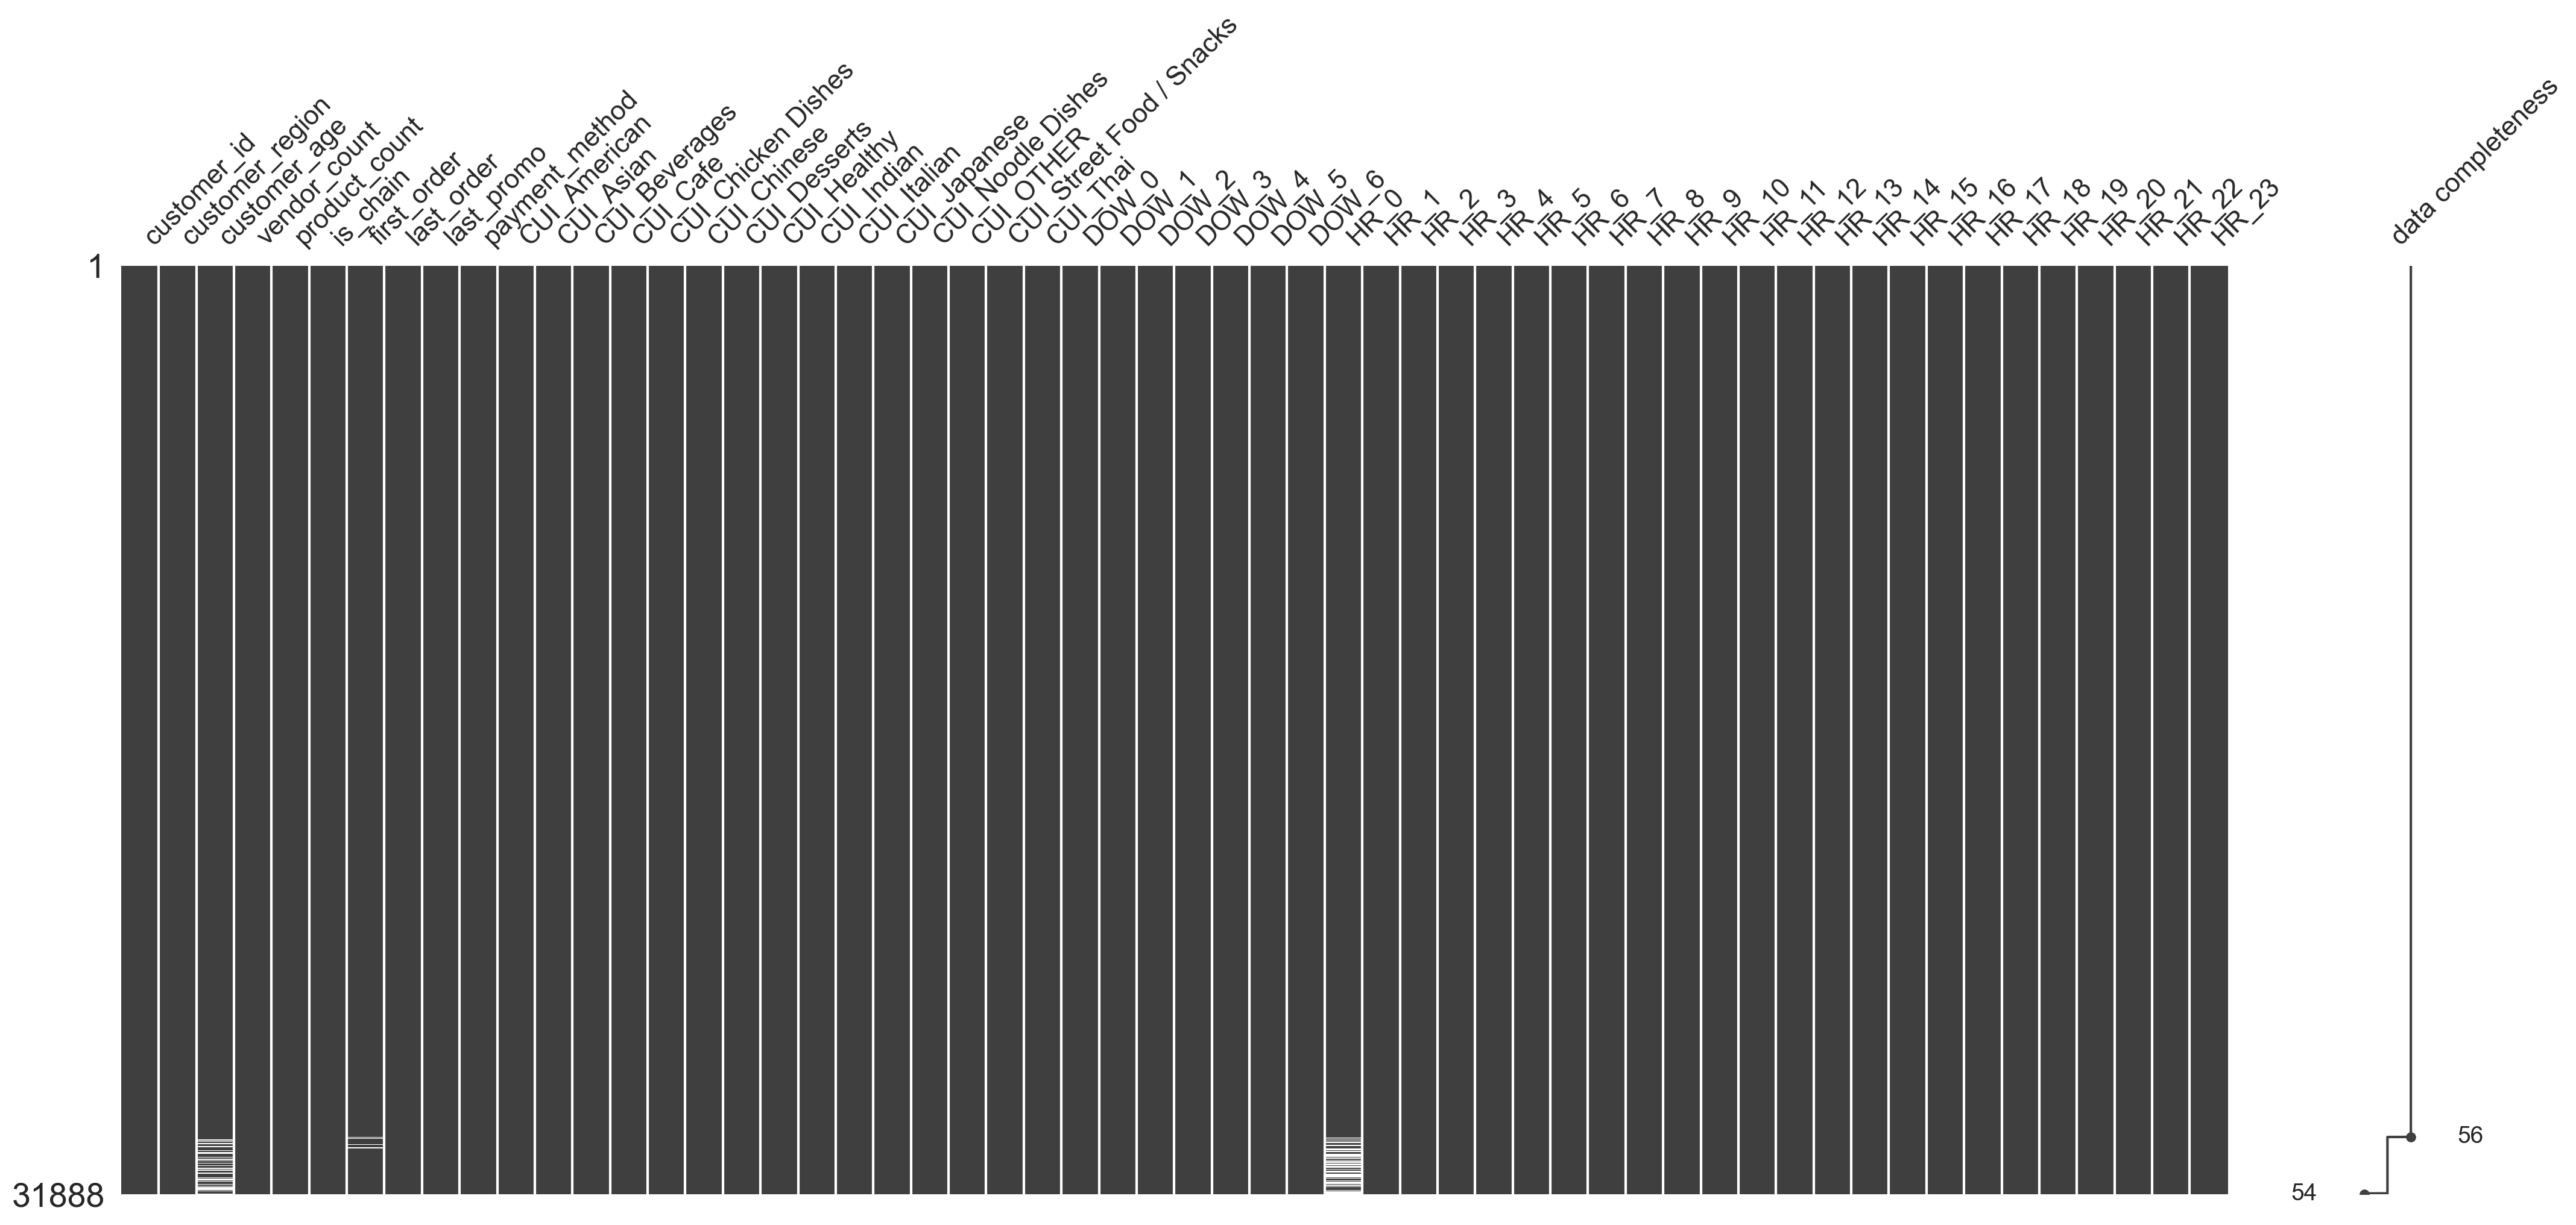

In [10]:
# Visualize the missing values in the dataset
msno.matrix(ABCDEats, labels=True, sort="descending");

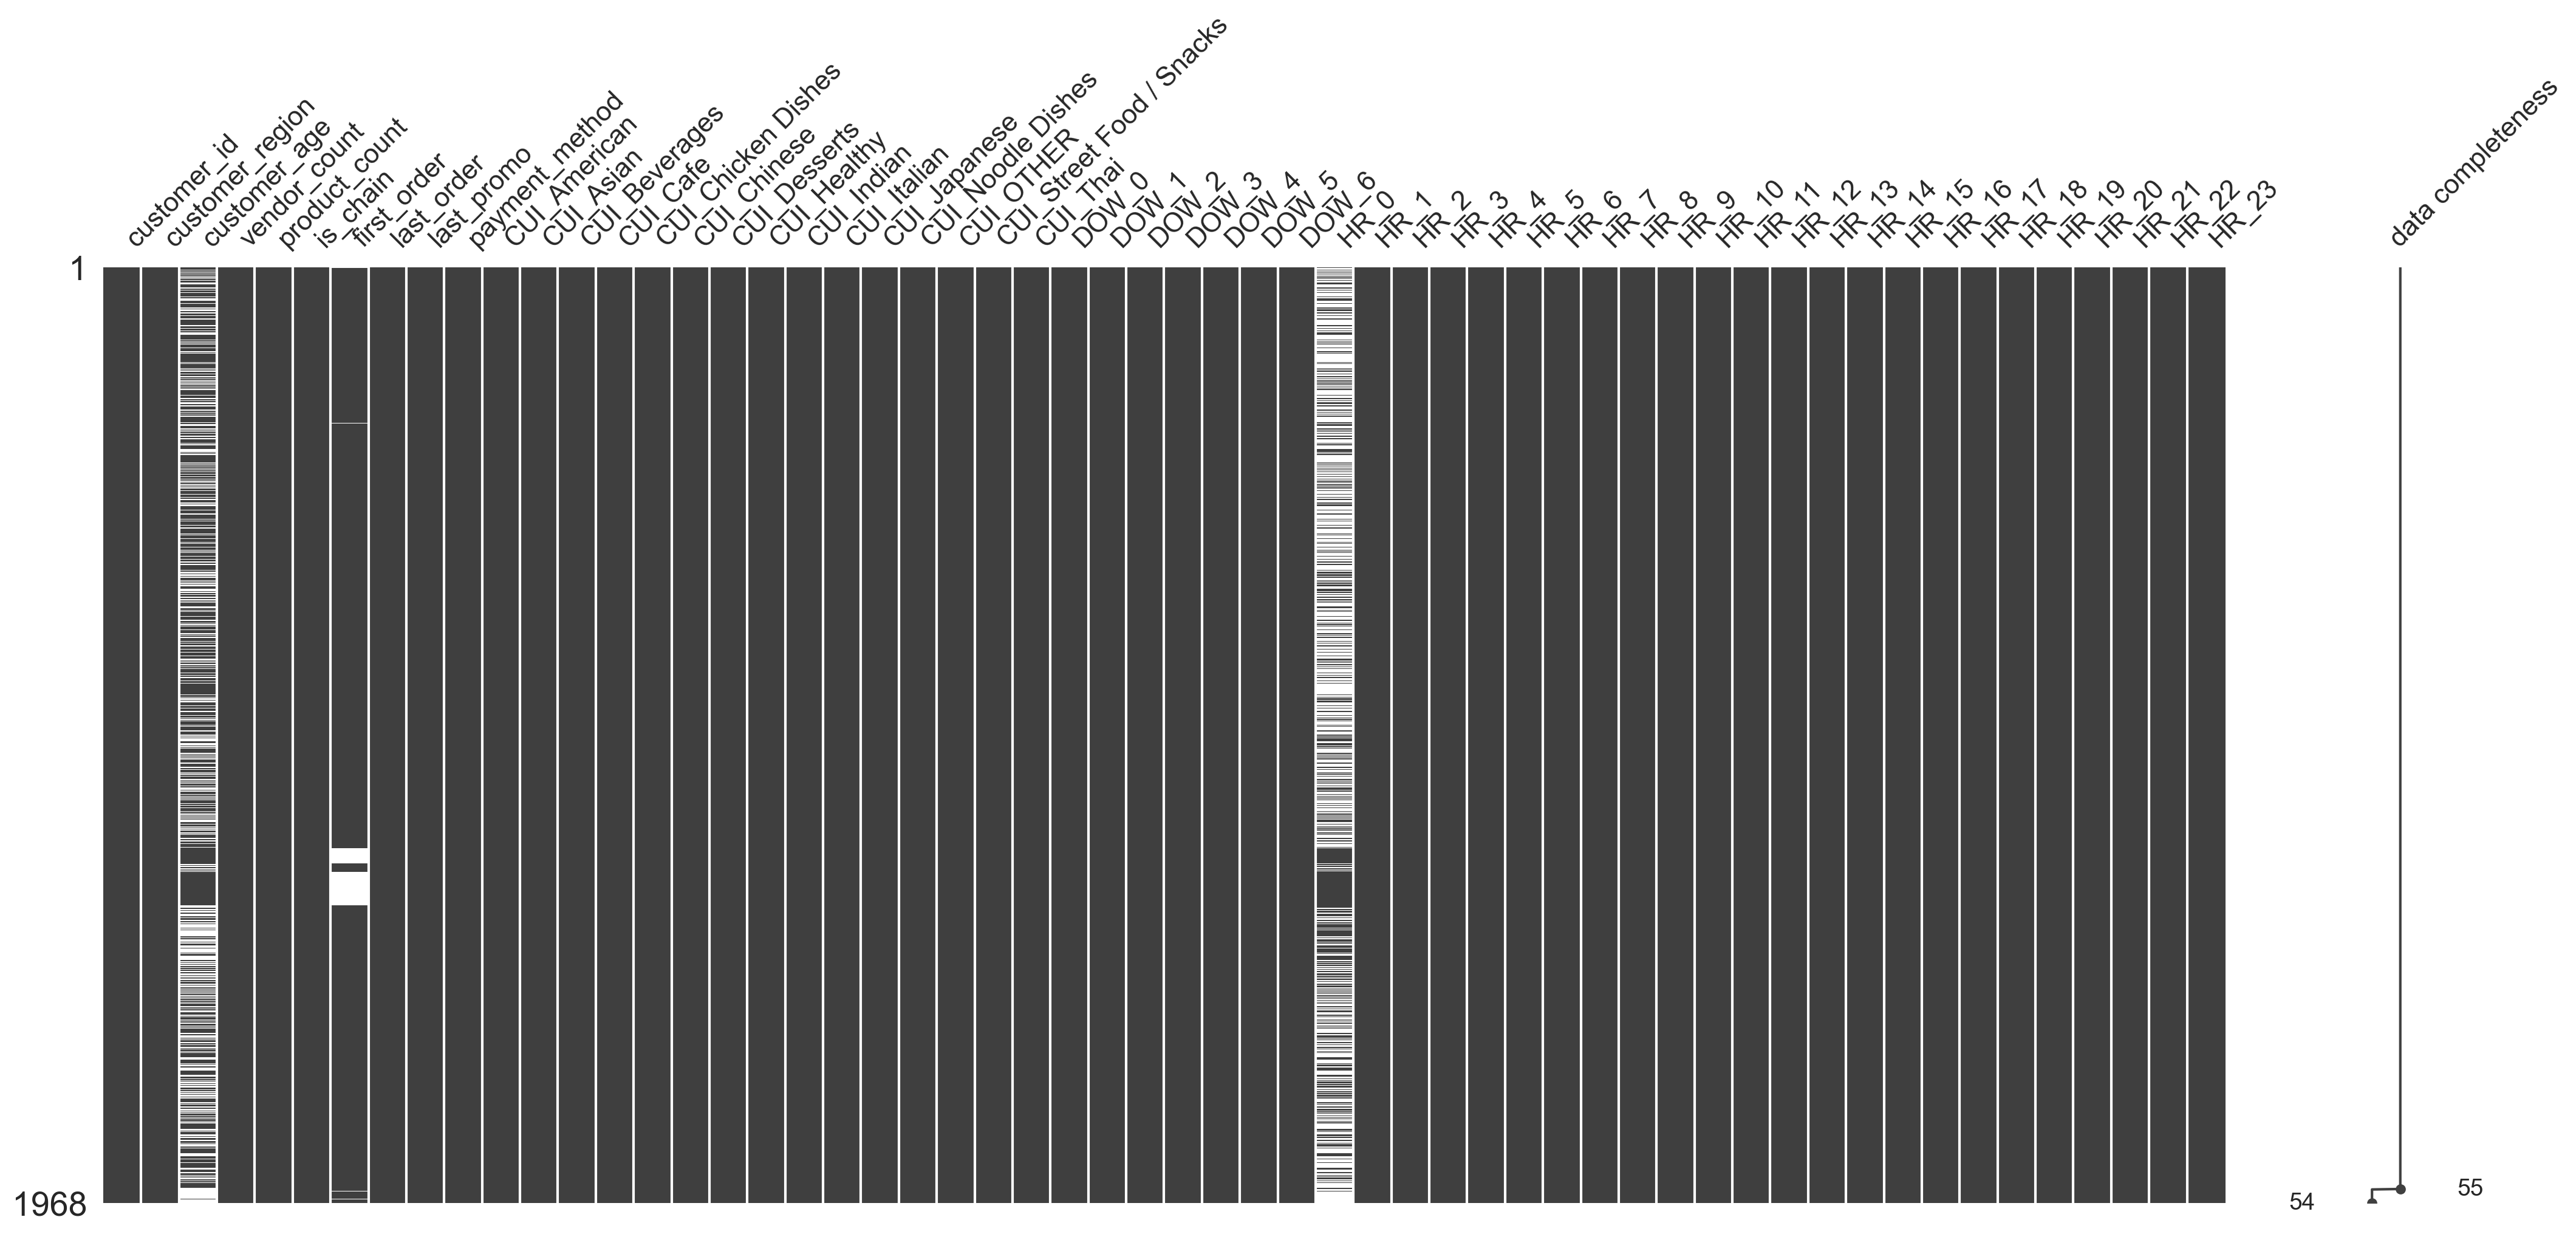

In [11]:
# Visualize the missing values only on the rows with missing values
msno.matrix(ABCDEats[ABCDEats.isnull().any(axis=1)], labels=True, sort="descending");

In [12]:
# Check for duplicates rows by costumer_id
ABCDEats.duplicated().sum()
# ABCDEats.duplicated('customer_id').sum() # it is the same

13

In [13]:
# Drop duplicates
ABCDEats.drop_duplicates(inplace=True)

---

In [14]:
# Check the data types
ABCDEats.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [15]:
# Descriptive statistics
round(ABCDEats.describe(include="all").T, 2) 

count unique         top   freq  mean   std   min  \
customer_id                 31875  31875  1b8f824d5e      1   NaN   NaN   NaN   
customer_region             31875      9        8670   9761   NaN   NaN   NaN   
customer_age             31148.00    NaN         NaN    NaN 27.51  7.16 15.00   
vendor_count             31875.00    NaN         NaN    NaN  3.10  2.77  0.00   
product_count            31875.00    NaN         NaN    NaN  5.67  6.96  0.00   
is_chain                 31875.00    NaN         NaN    NaN  2.82  3.98  0.00   
first_order              31769.00    NaN         NaN    NaN 28.47 24.10  0.00   
last_order               31875.00    NaN         NaN    NaN 63.67 23.23  0.00   
last_promo                  31875      4           -  16744   NaN   NaN   NaN   
payment_method              31875      3        CARD  20153   NaN   NaN   NaN   
CUI_American             31875.00    NaN         NaN    NaN  4.88 11.65  0.00   
CUI_Asian                31875.00    NaN         NaN    NaN  9.96 23.56  0.00   
CUI_Beverages            31875.00    NaN         NaN    NaN  2.30  8.48  0.00   
CUI_Cafe                 31875.00    NaN         NaN    NaN  0.80  6.43  0.00   
CUI_Chicken Dishes       31875.00    NaN         NaN    NaN  0.77  3.66  0.00   
CUI_Chinese              31875.00    NaN         NaN    NaN  1.43  8.19  0.00   
CUI_Desserts             31875.00    NaN         NaN    NaN  0.88  5.26  0.00   
CUI_Healthy              31875.00    NaN         NaN    NaN  0.95  5.83  0.00   
CUI_Indian               31875.00    NaN         NaN    NaN  1.63  7.44  0.00   
CUI_Italian              31875.00    NaN         NaN    NaN  3.23 11.25  0.00   
CUI_Japanese             31875.00    NaN         NaN    NaN  3.00 10.18  0.00   
CUI_Noodle Dishes        31875.00    NaN         NaN    NaN  0.71  4.54  0.00   
CUI_OTHER                31875.00    NaN         NaN    NaN  3.00  9.77  0.00   
CUI_Street Food / Snacks 31875.00    NaN         NaN    NaN  3.91 15.55  0.00   
CUI_Thai                 31875.00    NaN         NaN    NaN  0.84  4.43  0.00   
DOW_0                    31875.00    NaN         NaN    NaN  0.56  1.01  0.00   
DOW_1                    31875.00    NaN         NaN    NaN  0.57  1.04  0.00   
DOW_2                    31875.00    NaN         NaN    NaN  0.59  1.05  0.00   
DOW_3                    31875.00    NaN         NaN    NaN  0.62  1.07  0.00   
DOW_4                    31875.00    NaN         NaN    NaN  0.68  1.09  0.00   
DOW_5                    31875.00    NaN         NaN    NaN  0.65  1.07  0.00   
DOW_6                    31875.00    NaN         NaN    NaN  0.70  1.17  0.00   
HR_0                     30711.00    NaN         NaN    NaN  0.00  0.00  0.00   
HR_1                     31875.00    NaN         NaN    NaN  0.05  0.32  0.00   
HR_2                     31875.00    NaN         NaN    NaN  0.06  0.35  0.00   
HR_3                     31875.00    NaN         NaN    NaN  0.12  0.50  0.00   
HR_4                     31875.00    NaN         NaN    NaN  0.10  0.44  0.00   
HR_5                     31875.00    NaN         NaN    NaN  0.08  0.36  0.00   
HR_6                     31875.00    NaN         NaN    NaN  0.07  0.33  0.00   
HR_7                     31875.00    NaN         NaN    NaN  0.08  0.38  0.00   
HR_8                     31875.00    NaN         NaN    NaN  0.13  0.64  0.00   
HR_9                     31875.00    NaN         NaN    NaN  0.23  0.73  0.00   
HR_10                    31875.00    NaN         NaN    NaN  0.33  0.89  0.00   
HR_11                    31875.00    NaN         NaN    NaN  0.38  0.96  0.00   
HR_12                    31875.00    NaN         NaN    NaN  0.31  0.84  0.00   
HR_13                    31875.00    NaN         NaN    NaN  0.24  0.64  0.00   
HR_14                    31875.00    NaN         NaN    NaN  0.22  0.60  0.00   
HR_15                    31875.00    NaN         NaN    NaN  0.28  0.74  0.00   
HR_16                    31875.00    NaN         NaN    NaN

In [16]:
# Check the unique values of each column
for col in ABCDEats.columns[1:]:
    print(f'\033[1m{col}\033[0m[{ABCDEats[col].nunique()}]: {sorted(ABCDEats[col].unique())} \n')

customer_region[9]: ['-', '2360', '2440', '2490', '4140', '4660', '8370', '8550', '8670'] 

customer_age[66]: [15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 33.0, 38.0, nan, 27.0, 32.0, 34.0, 35.0, 36.0, 37.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0] 

vendor_count[37]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 40, 41] 

product_count[93]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 8

In [17]:
# With the unique values of each column, we can see that there are some columns with values represented by '-' 
# and some columns with values that are not in the domain of the column.

# Let's check the columns with values represented by '-' in the columns 'customer_region' and 'last_promo'
print(len(ABCDEats[ABCDEats['customer_region'] == '-'])) 
print(len(ABCDEats[ABCDEats['last_promo'] == '-'])) # last_promo '-' can be considered as don't have a promo

442
16744


In [18]:
# Check if first_order is before last_order
(ABCDEats['first_order'] > ABCDEats['last_order']).sum() # No rows with first_order > last_order 

0

---

## 📊 Data Visualization

In [19]:
# Create a directory to save the plots and reports of the EDA if it doesn't exist
if not os.path.join('..', '[DM]_Project_EDAOutputs_Group37'):
    os.makedirs(os.path.join('..', '[DM]_Project_EDAOutputs_Group37'))

In [20]:
numerical_cols = ABCDEats.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ABCDEats.select_dtypes(include=['object']).columns

print(f'Numerical columns: {len(numerical_cols)}, {numerical_cols} \n')
print(f'Categorical columns: {len(categorical_cols)}, {categorical_cols}')

Numerical columns: 52, Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object') 

Categorical columns: 4, Index(['customer_id', 'customer_region', 'last_promo', 'payment_method'], dtype='object')


In [21]:
print(list(ABCDEats[numerical_cols[:21]].columns))

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']


In [22]:
# # Pairwise Relationship of Numerical Variables and save the plot -> It takes a long time to run so we will save the plot in a .png file
# sns.pairplot(ABCDEats[numerical_cols[:21]], diag_kind='hist')
# plt.suptitle('Pairwise Relationship of Numerical Variables', fontweight='bold', fontsize=16)
# plt.savefig(os.path.join('..', '[DM]_Project_EDAOutputs_Group37', 'Pairwise_Relationship_of_Numerical_Variables.png'))
# plt.show()

## Inicial Analysis of the Data

In [23]:
# # Generate the profile report of the dataset -> It takes a long time to run so we will save the report in a .html file
# # Configuration of the Profile Report | Source: https://docs.profiling.ydata.ai/latest/advanced_settings/available_settings
# profile = ProfileReport(ABCDEats,
#                         title="Profile Report | ABDCEats Inc.",
#                         explorative=True,
#                         progress_bar=True,
#                         correlations={
#                             "auto": {"calculate": True, "warn_high_correlations": True},
#                             "pearson": {"calculate": True, "warn_high_correlations": True},
#                             "spearman": {"calculate": True, "warn_high_correlations": True},
#                             "kendall": {"calculate": True, "warn_high_correlations": True},
#                             "phi_k": {"calculate": True, "warn_high_correlations": True},
#                             "cramers": {"calculate": True, "warn_high_correlations": True}
#                         }
#                         )
# profile.to_file(os.path.join('..', '[DM]_Project_EDAOutputs_Group37', 'DM2425_Part1_37_ProfileReport.html'))

### Alerts by the Profile Report  🚨 [See the Report](../[DM]_Project_EDAOutputs_Group37/DM2425_Part1_37_ProfileReport.html)

---

### `Number of Orders`

> First of all, we detected that we don't have the number of orders placed by the customers. After some ***data understanding*** we found that we can calculate the total number of orders placed by each customer by summing the columns `DOW_0` to `DOW_6` or `HR_0` to `HR_23`, in theory.

In [24]:
# Total Orders per Customer
ABCDEats['order_count'] = ABCDEats.loc[:, 'DOW_0':'DOW_6'].sum(axis=1)

In [25]:
# Descriptive statistics of the column 'order_count'
round(ABCDEats['order_count'].describe(), 2)

count   31875.00
mean        4.37
std         5.08
min         0.00
25%         2.00
50%         3.00
75%         5.00
max        94.00
Name: order_count, dtype: float64

In [26]:
# Through these variables we can know what number of orders are placed in total by summing all the columns 'DOW_0' to 'DOW_6' or 'HR_0' to 'HR_23'
Total_Orders_DOW = ABCDEats.loc[:, 'DOW_0':'DOW_6'].sum().sum()
Total_Orders_DOW

139263

In [27]:
# Check if the sum of the columns 'HR_0' to 'HR_23' is equal to the total number of orders
Total_Orders_HR = ABCDEats.loc[:, 'HR_0':'HR_23'].sum().sum()
Total_Orders_HR

137711.0

In [28]:
# Difference between the sum of the columns 'HR_0' to 'HR_23' and the sum of the columns 'DOW_0' to 'DOW_6'
Total_Orders_HR - Total_Orders_DOW

-1552.0

In [29]:
# Check how many NA values are in the columns 'DOW_0' to 'DOW_6' and 'HR_0' to 'HR_23'
print(ABCDEats.loc[:, 'DOW_0':'DOW_6'].isnull().sum().sum())
print(ABCDEats.loc[:, 'HR_0':'HR_23'].isnull().sum().sum())

0
1164


> The sum of the columns **`HR_0`** to **`HR_23`** is not equal to the sum of the columns **`DOW_0`** to **`DOW_6`**. This is a problem of **data inconsistency**. 

- After some analysis, we can see that **`HR_0`** don't have any value greater than $0$, so probably the inconsistency is in that column.

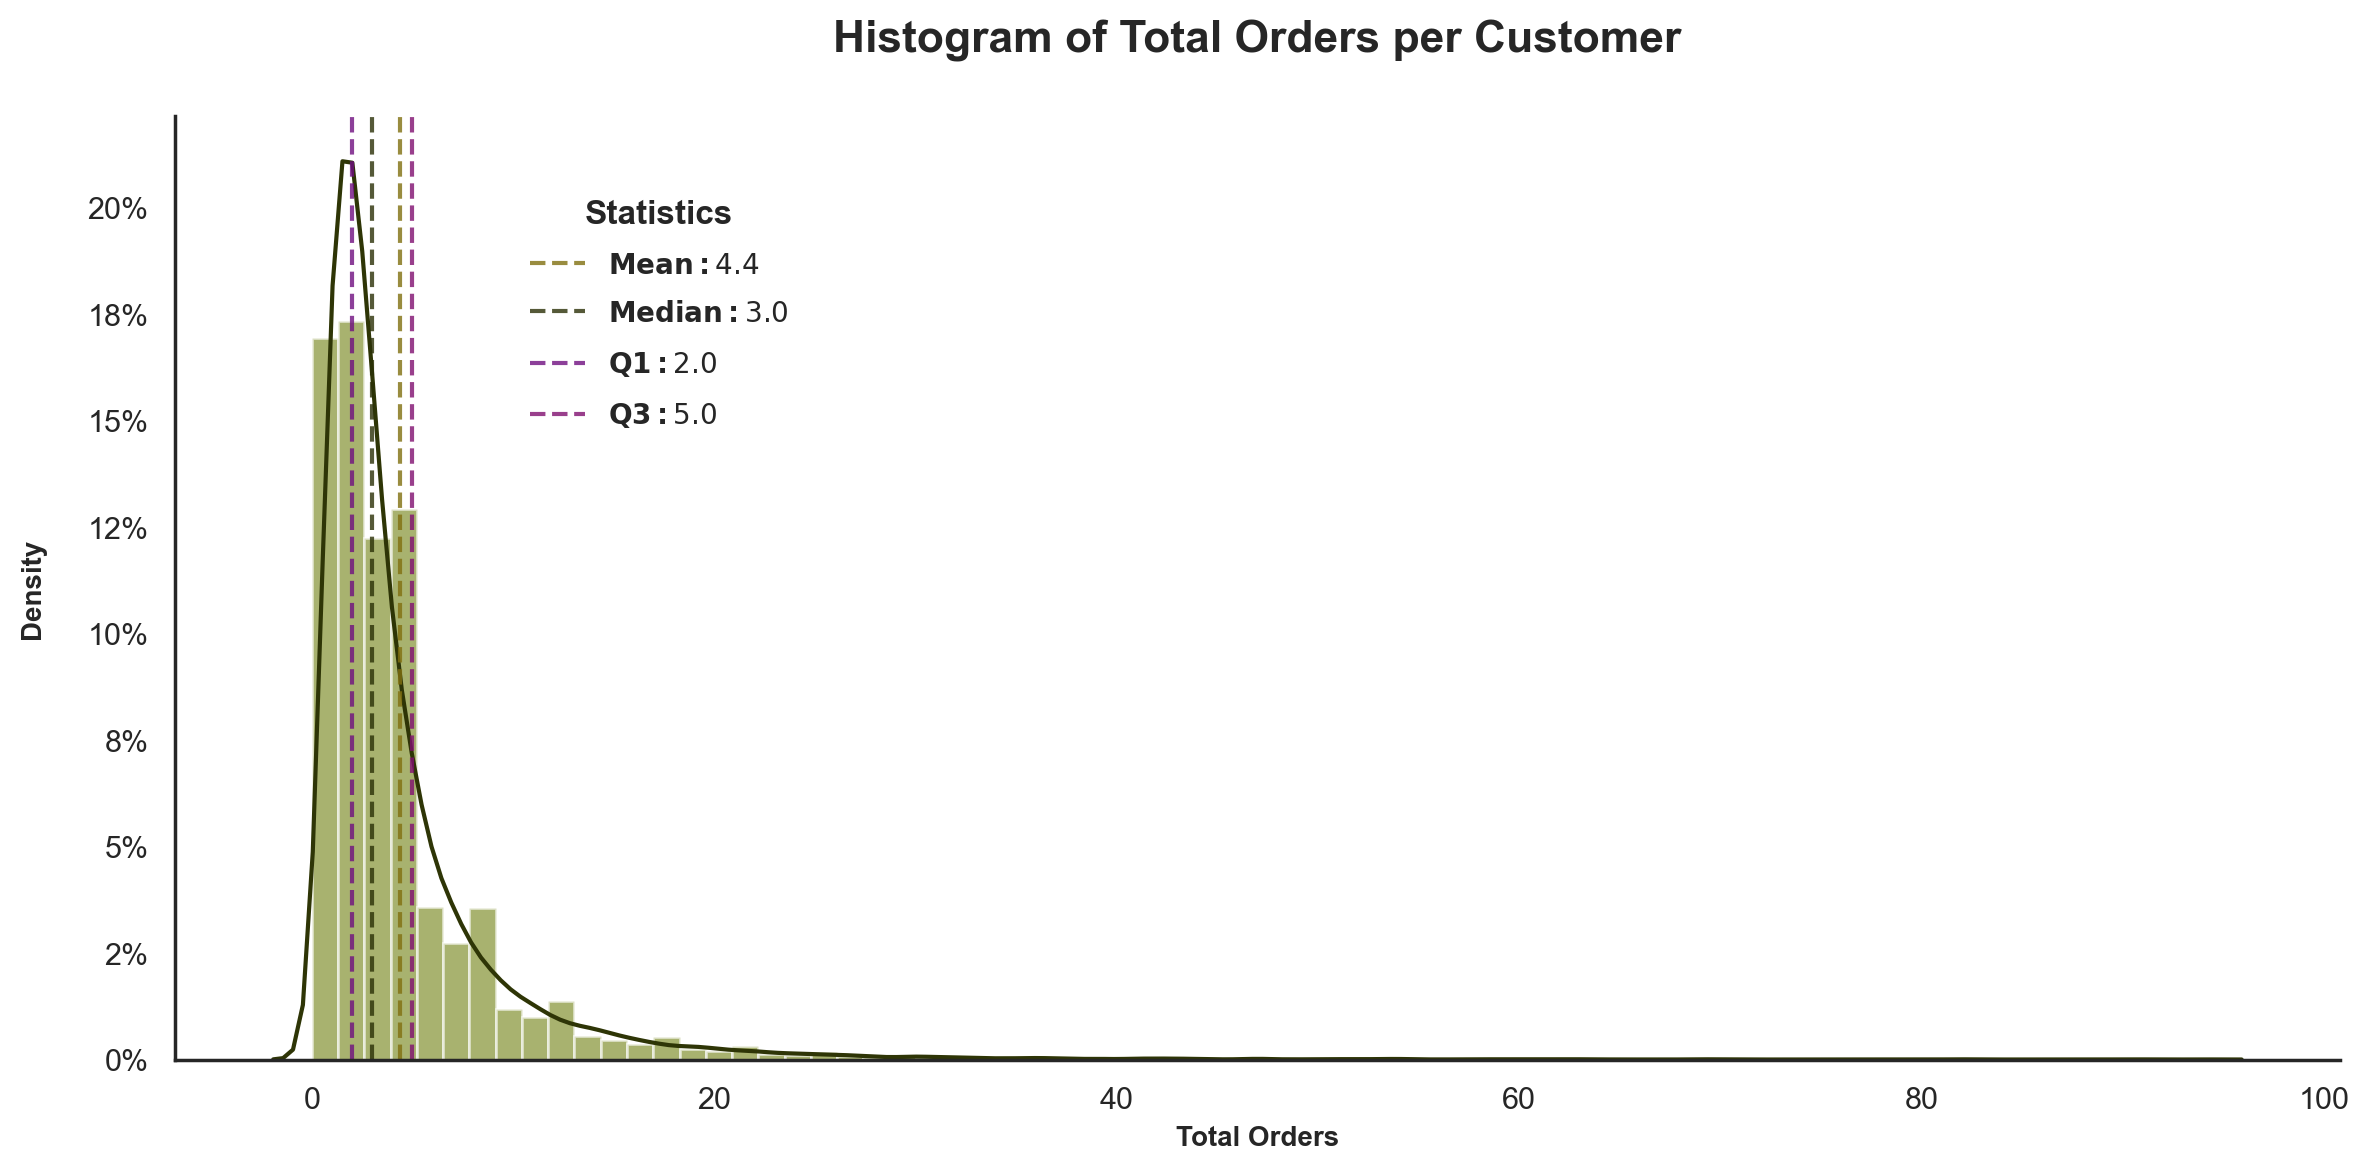

In [195]:
# Histogram of the column 'order_count'

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the histogram and the kernel density estimate
plt.hist(ABCDEats['order_count'], bins=len(ABCDEats['order_count'].unique()), color='#6f800f', alpha=0.6, density=True)
sns.kdeplot(ABCDEats['order_count'], color='#2E3506', lw=1.5)

# Add title and labels
plt.title('Histogram of Total Orders per Customer\n', fontweight='bold', fontsize=16)
plt.xlabel('Total Orders', fontweight='bold', fontsize=10)
plt.ylabel('Density\n', fontweight='bold', fontsize=10)

# Add mean, median and percentiles to the plot
mean_orders = ABCDEats['order_count'].mean()
median_orders = ABCDEats['order_count'].median()
q1_orders = ABCDEats['order_count'].quantile(0.25)
q3_orders = ABCDEats['order_count'].quantile(0.75)

plt.axvline(mean_orders, color='#806F0F', linestyle='--', linewidth=1.5, alpha=0.8, label=rf'$\mathbf{{Mean:}} {mean_orders:.1f}$')
plt.axvline(median_orders, color='#2A3006', linestyle='--', linewidth=1.5, alpha=0.8, label=rf'$\mathbf{{Median:}} {median_orders:.1f}$')
plt.axvline(q1_orders, color='#6F0F80', linestyle='--', linewidth=1.5, alpha=0.8, label=rf'$\mathbf{{Q1:}} {q1_orders:.1f}$')
plt.axvline(q3_orders, color='#800F6F', linestyle='--', linewidth=1.5, alpha=0.8, label=rf'$\mathbf{{Q3:}} {q3_orders:.1f}$')

# Add a legend
plt.legend(fontsize=10, title='Statistics', title_fontproperties={'weight':'bold', 'size':'12'},
              labelspacing=0.8, borderpad=0.8, frameon=False, bbox_to_anchor=(.3, 0.95))

# Format the y-axis as a percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Display the plot
plt.tight_layout()
plt.show()

In [31]:
# Verify anomalies in the column 'order_count'
print('Number of customers with 0 orders:', len(ABCDEats[ABCDEats['order_count'] == 0]),
      '(',round(len(ABCDEats[ABCDEats['order_count'] == 0])/len(ABCDEats)*100, 2), '%)')
ABCDEats[ABCDEats['order_count'] == 0]

Number of customers with 0 orders: 138 ( 0.43 %)


customer_id customer_region  customer_age  vendor_count  product_count  \
1449   4903041977            8670         22.00             0              0   
1476   c94b288475            8670         26.00             0              0   
1488   f687717dc1            8670         21.00             0              0   
2486   c6cf0b76fb            8670         38.00             0              0   
3391   1b7c34738e            8670         24.00             0              0   
...           ...             ...           ...           ...            ...   
31377  177ede2420            8670         30.00             0              0   
31553  0039059c9c            8670         22.00             0              0   
31667  0e60632fe2            8670         23.00             0              0   
31680  28ed1f1e3f            8670         20.00             0              0   
31695  4c06e104de            8670         25.00             0              0   

       is_chain  first_order  last_order last_promo payment_method  \
1449          1         1.00           1   DELIVERY           DIGI   
1476          0         1.00           1   DELIVERY           CASH   
1488          1         1.00           1   DELIVERY           DIGI   
2486          0         2.00           2   DELIVERY           CASH   
3391          0         3.00           3          -           CASH   
...         ...          ...         ...        ...            ...   
31377         1        86.00          86          -           DIGI   
31553         1        88.00          88   DISCOUNT           CARD   
31667         0        89.00          89   DISCOUNT           CARD   
31680         0        89.00          89   DELIVERY           DIGI   
31695         1        89.00          89          -           CASH   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
1449           0.00       0.00           0.00      0.00                0.00   
1476           0.00       0.00           0.00      0.00                0.00   
1488           0.00       0.00           0.00      0.00                0.00   
2486           0.00       0.00           0.00      0.00                0.00   
3391           0.00       0.00           0.00      0.00                0.00   
...             ...        ...            ...       ...                 ...   
31377          0.00       0.00           0.00      0.00                0.00   
31553          0.00       0.00           0.00      0.00                0.00   
31667          0.00       0.00           0.00      0.00                0.00   
31680          0.00       0.00           0.00      0.00                0.00   
31695          0.00       0.00           0.00      0.00                0.00   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
1449          0.00          0.00         0.00        0.00         0.00   
1476          0.00          0.00         0.00        0.00         0.00   
1488          0.00          0.00         0.00        0.00         0.00   
2486          0.00          0.00         0.00        0.00         0.00   
3391          0.00          0.00         0.00        0.00         0.00   
...            ...           ...          ...         ...          ...   
31377         0.00          0.00         0.00        0.00         0.00   
31553         0.00          0.00         0.00        0.00         0.00   
31667         0.00          0.00         0.00        0.00         0.00   
31680         0.00          0.00         0.00        0.00         0.00   
31695         0.00          0.00         0.00        0.00         0.00   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
1449           0.00               0.00       0.00                      0.00   
1476           0.00               0.00       0.00                      0.00   
1488           0.00               0.00       0.00                      0.00   
2486           0.00               0.00       0.00 

> There are **138 customers** who have not placed any orders. This may be due to the fact that they have registered on the platform but have not yet placed any orders. But when we look at the rest of the columns, we see that they have placed orders. This is a **data inconsistency**.

---

#### `customer_region`

In [32]:
# Unique values of the column `customer_region`
print(ABCDEats['customer_region'].unique())

['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']


In [33]:
# Absolute and Relative Frequency Table of the column `customer_region`
customer_region_n_freq = ABCDEats['customer_region'].value_counts().reset_index()
customer_region_n_freq.columns = ['customer_region', 'n']
customer_region_n_freq['%'] = round(customer_region_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
customer_region_n_freq.set_index('customer_region', inplace=True)
pd.DataFrame(customer_region_n_freq.sort_values(by='n', ascending=False))

n     %
customer_region            
8670             9761 30.62
4660             9550 29.96
2360             8829 27.70
2440             1483  4.65
4140              857  2.69
8370              495  1.55
2490              445  1.40
-                 442  1.39
8550               13  0.04

> The column `customer_region` has a value represented by `-` which is a missing value. We can replace that value with some technique like imputation or treat it as a 'NaN' value.

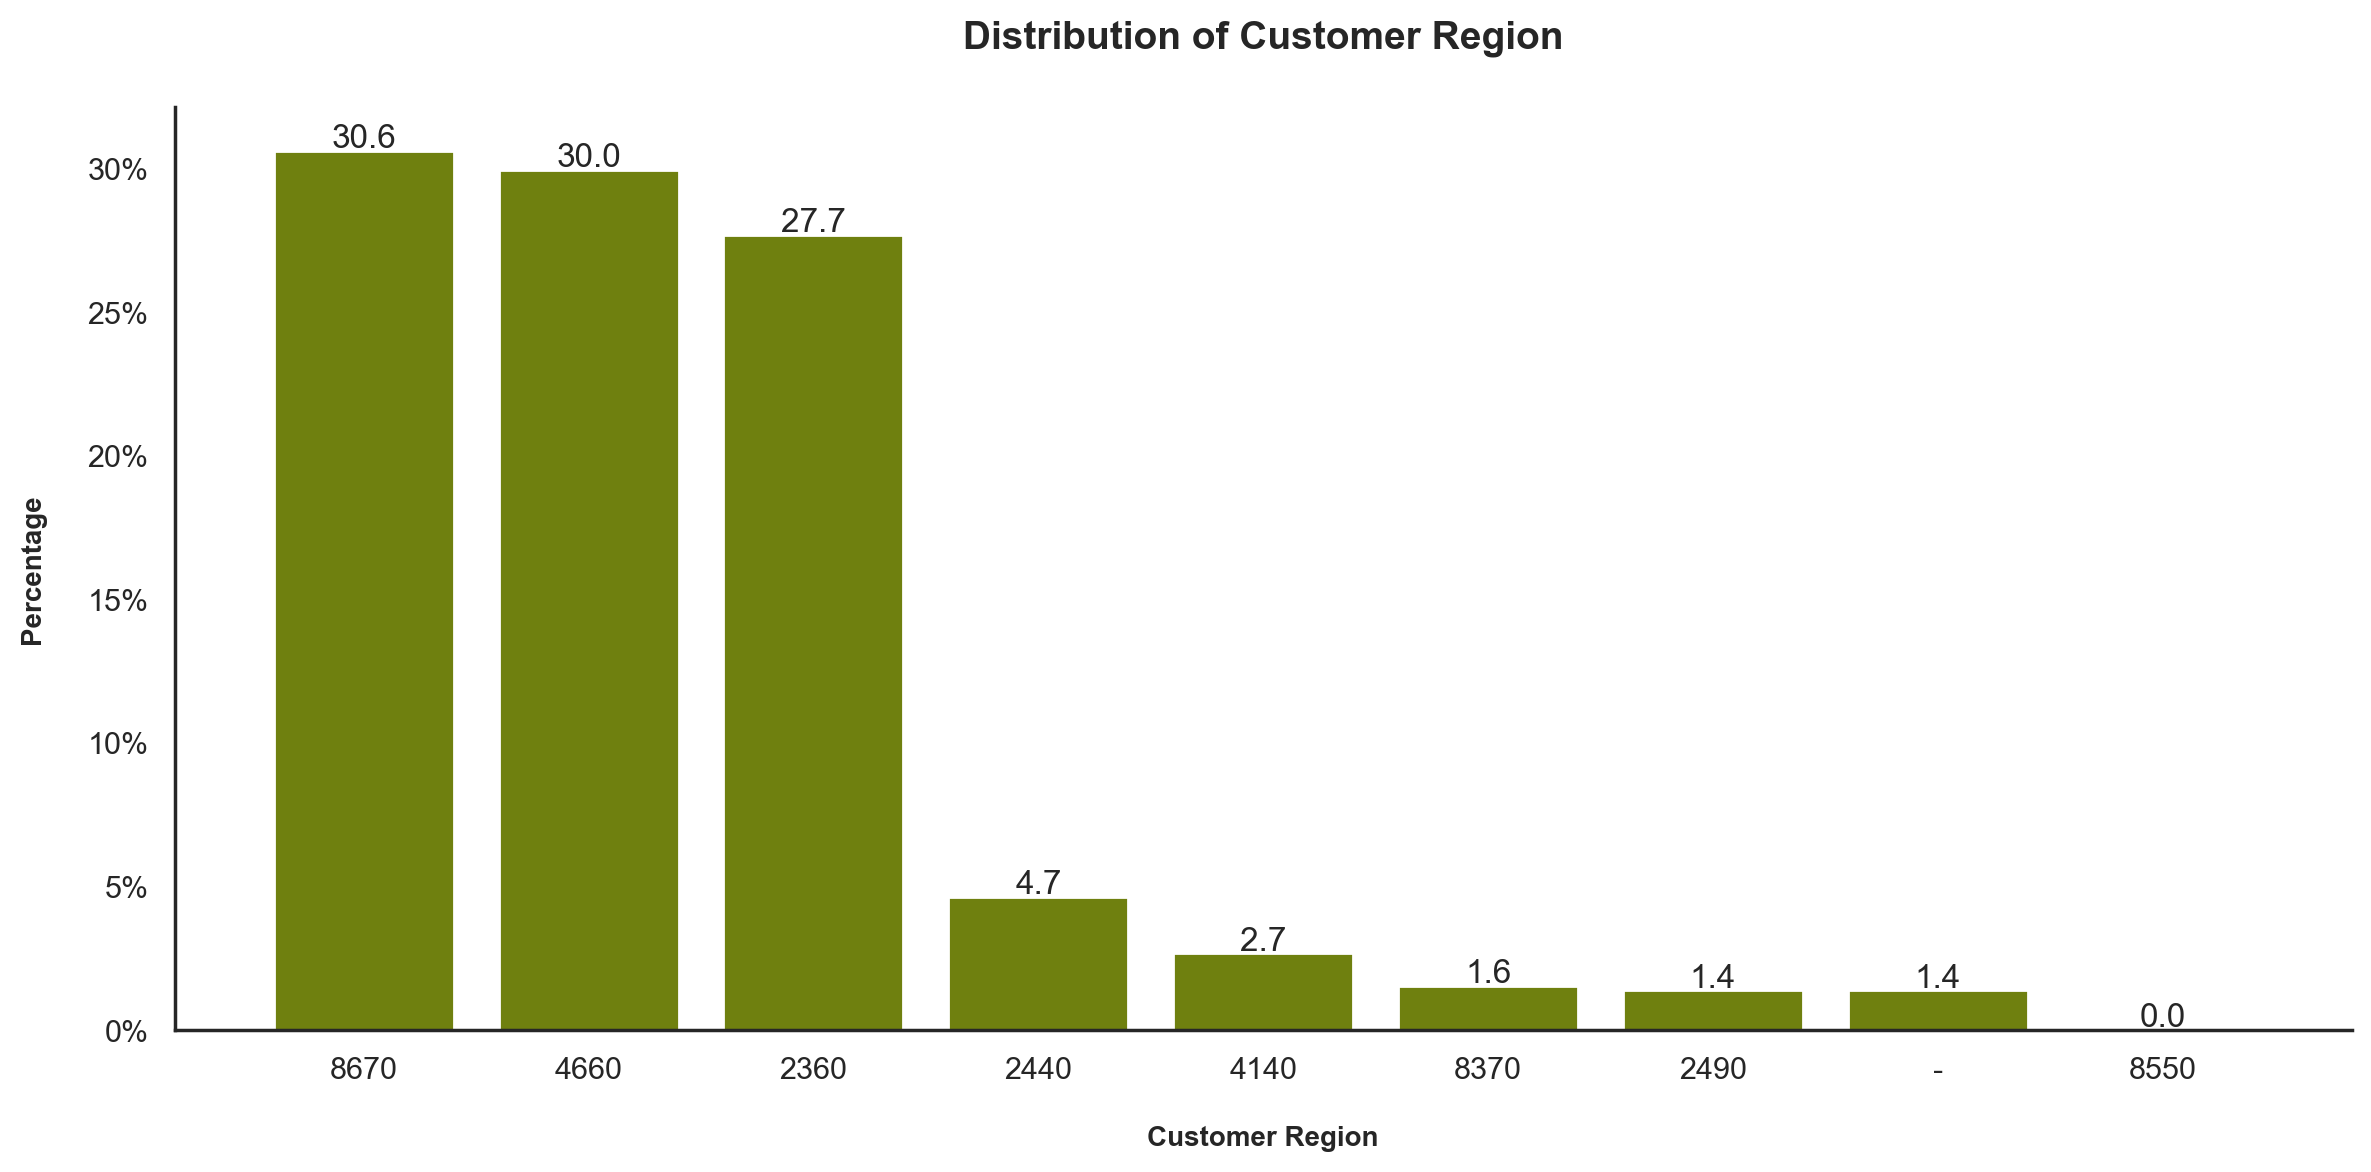

In [34]:
# Barplot representing the distribution of the 'customer_region'
plt.figure(figsize=(12, 6))
plt.bar(ABCDEats['customer_region'].value_counts(normalize=True).index,
        ABCDEats['customer_region'].value_counts(normalize=True),
        color='#6f800f')
plt.title('Distribution of Customer Region\n', fontsize=14, fontweight='bold')
plt.xlabel('\nCustomer Region', fontsize=10, fontweight='bold')
plt.ylabel('Percentage\n', fontsize=10, fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Display the percentage on the top of each bar
for i in range(len(ABCDEats['customer_region'].value_counts(normalize=True))):
    value = ABCDEats['customer_region'].value_counts(normalize=True).iloc[i]
    plt.text(i, value+0.001, f'{value*100:.1f}', ha='center', fontsize=12)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

---


#### `customer_age`

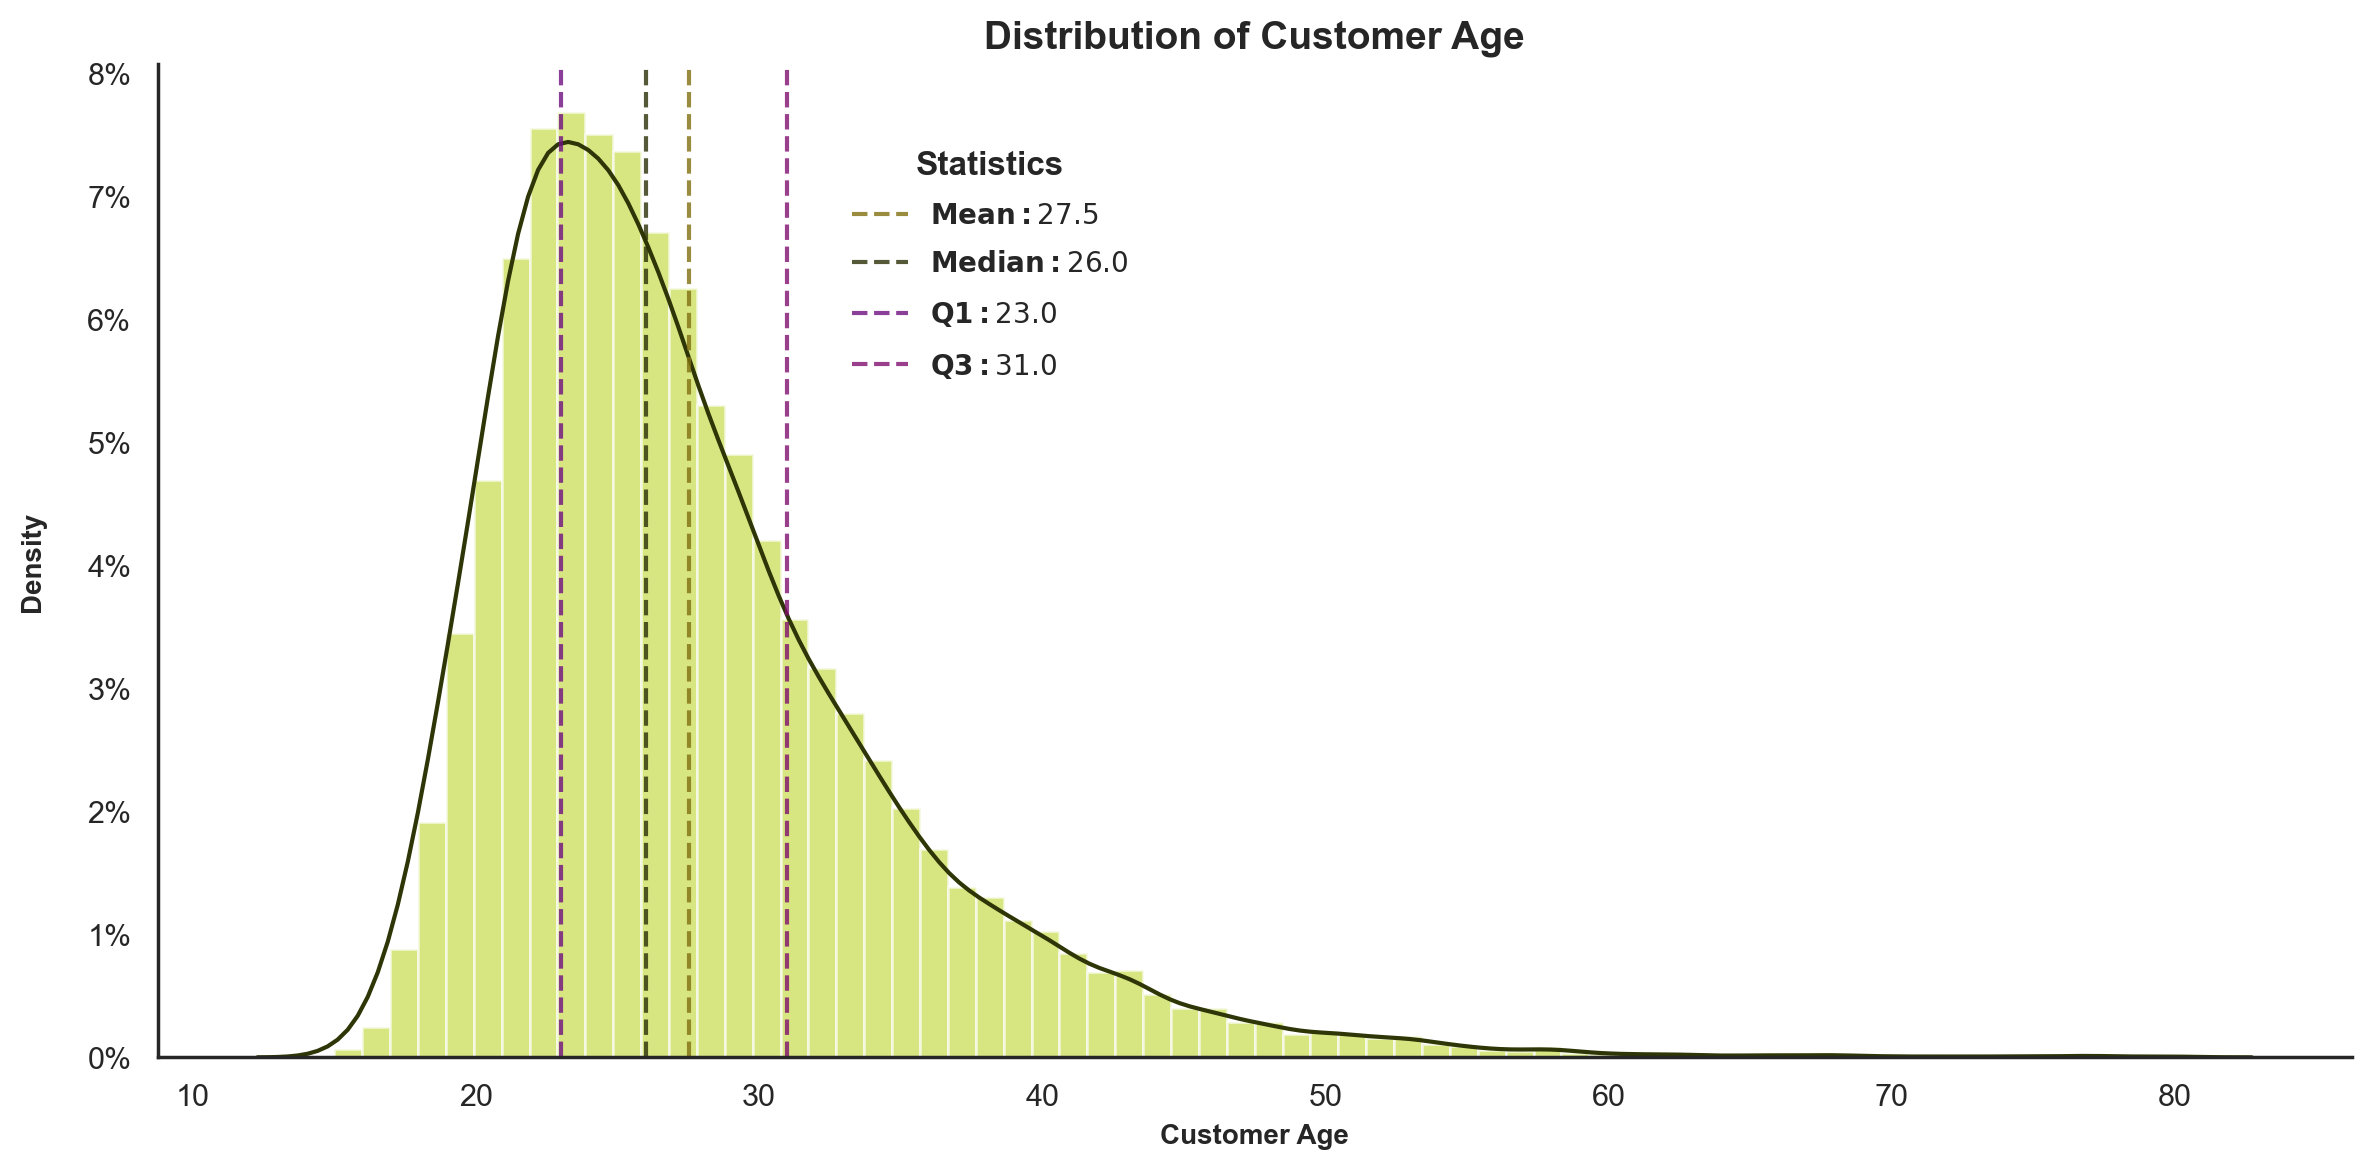

In [159]:
# Histogram of the column 'customer_age'
plt.figure(figsize=(12, 6))
plt.hist(ABCDEats['customer_age'], bins=ABCDEats['customer_age'].nunique(), color='#bEd62f', alpha=0.6, density=True)
sns.kdeplot(ABCDEats['customer_age'], color='#2E3506', lw=1.5)
plt.title('Distribution of Customer Age', fontsize=14, fontweight='bold')
plt.xlabel('Customer Age', fontsize=10, fontweight='bold')
plt.ylabel('Density\n', fontsize=10, fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add mean, median and percentiles to the plot
mean_age = ABCDEats['customer_age'].mean()
median_age = ABCDEats['customer_age'].median()
q1_age = ABCDEats['customer_age'].quantile(0.25)
q3_age = ABCDEats['customer_age'].quantile(0.75)

plt.axvline(mean_age, color='#806F0F', linestyle='--', linewidth=1.5, alpha=0.8, label=rf'$\mathbf{{Mean:}} {mean_age:.1f}$')
plt.axvline(median_age, color='#2A3006', linestyle='--', linewidth=1.5, alpha=0.8, label=rf'$\mathbf{{Median:}} {median_age:.1f}$')
plt.axvline(q1_age, color='#6F0F80', linestyle='--', linewidth=1.5, alpha=0.8, label=rf'$\mathbf{{Q1:}} {q1_age:.1f}$')
plt.axvline(q3_age, color='#800F6F', linestyle='--', linewidth=1.5, alpha=0.8, label=rf'$\mathbf{{Q3:}} {q3_age:.1f}$')

plt.legend(fontsize=10, title='Statistics', title_fontproperties={'weight':'bold', 'size':'12'},
           labelspacing=0.8, borderpad=0.8, frameon=False, bbox_to_anchor=(.3, 0.95))

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()



> We can observe that the most common clients tend to be in their 20s to 30s.

This may be attributed to higher digital literacy levels in this age group, as well as the possibility that these individuals are at the beginning of their professional lives. As a result, they might experience a more stressful lifestyle, leaving them with less time to cook at home.

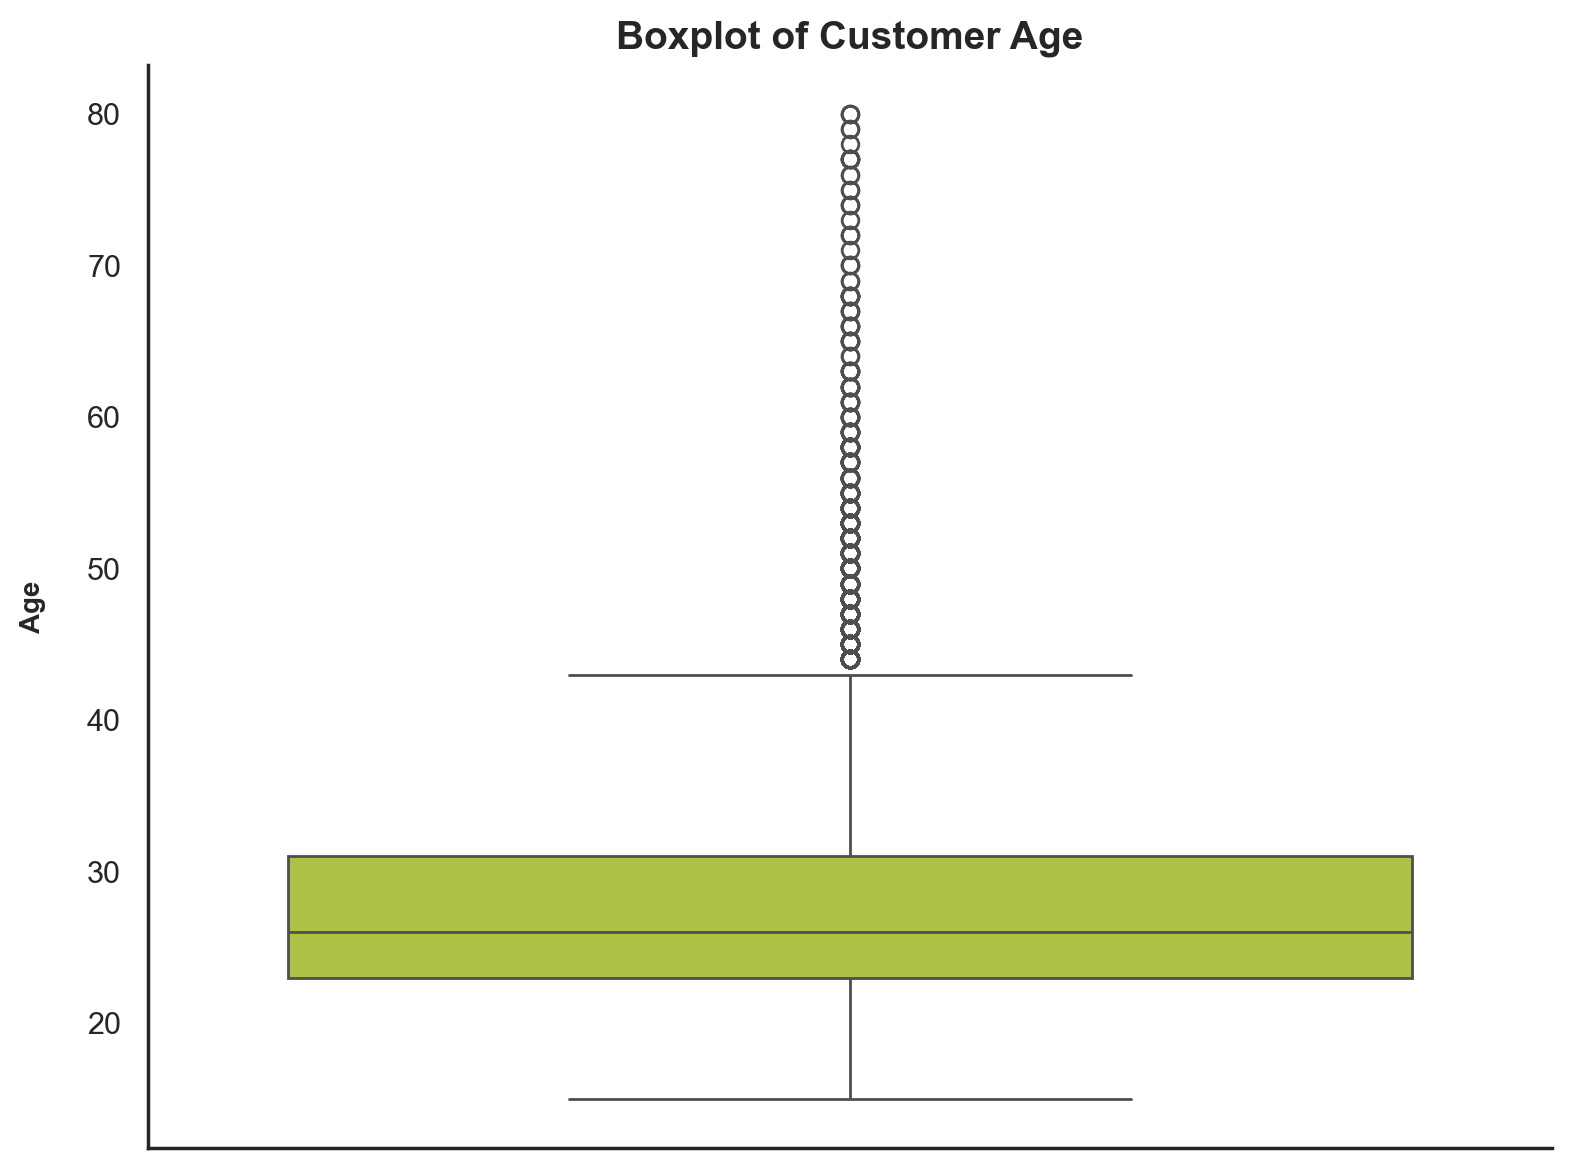

In [36]:
# Boxplot of the column 'customer_age'
plt.figure(figsize=(8, 6))
sns.boxplot(data=ABCDEats['customer_age'], color='#bEd62f')
plt.title('Boxplot of Customer Age', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Age\n', fontsize=10, fontweight='bold')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

---

#### `vendor_count`

In [37]:
# Unique values of the column 'vendor_count'
print(sorted(map(int,ABCDEats['vendor_count'].unique())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 40, 41]


In [38]:
# Absolute and Relative Frequency Table of the column 'vendor_count'
vendor_count_n_freq = ABCDEats['vendor_count'].value_counts().reset_index()
vendor_count_n_freq.columns = ['vendor_count', 'n']
vendor_count_n_freq['%'] = round(vendor_count_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
vendor_count_n_freq.set_index('vendor_count', inplace=True)
pd.DataFrame(vendor_count_n_freq.sort_values(by='vendor_count', ascending=True))

n     %
vendor_count            
0              138  0.43
1             9059 28.42
2             8547 26.81
3             5173 16.23
4             2984  9.36
5             1875  5.88
6             1166  3.66
7              816  2.56
8              594  1.86
9              396  1.24
10             285  0.89
11             219  0.69
12             146  0.46
13             108  0.34
14             101  0.32
15              62  0.19
16              41  0.13
17              34  0.11
18              26  0.08
19              20  0.06
20              22  0.07
21               9  0.03
22               7  0.02
23              12  0.04
24               6  0.02
25               6  0.02
26               2  0.01
27               5  0.02
28               3  0.01
29               2  0.01
30               3  0.01
31               1  0.00
32               2  0.01
34               2  0.01
35               1  0.00
40               1  0.00
41               1  0.00

In [39]:
# Absolute and Relative Frequency Table of the column 'vendor_count' with cumulative percentage [Just 0 to 10 vendors]
vendor_count_n_freq['%_cumulative'] = round(vendor_count_n_freq.sort_values(by='vendor_count', ascending=True)['%'].cumsum(), 2)
pd.DataFrame(vendor_count_n_freq[vendor_count_n_freq.index <= 10]).sort_values(by='vendor_count', ascending=True)

n     %  %_cumulative
vendor_count                          
0              138  0.43          0.43
1             9059 28.42         28.85
2             8547 26.81         55.66
3             5173 16.23         71.89
4             2984  9.36         81.25
5             1875  5.88         87.13
6             1166  3.66         90.79
7              816  2.56         93.35
8              594  1.86         95.21
9              396  1.24         96.45
10             285  0.89         97.34

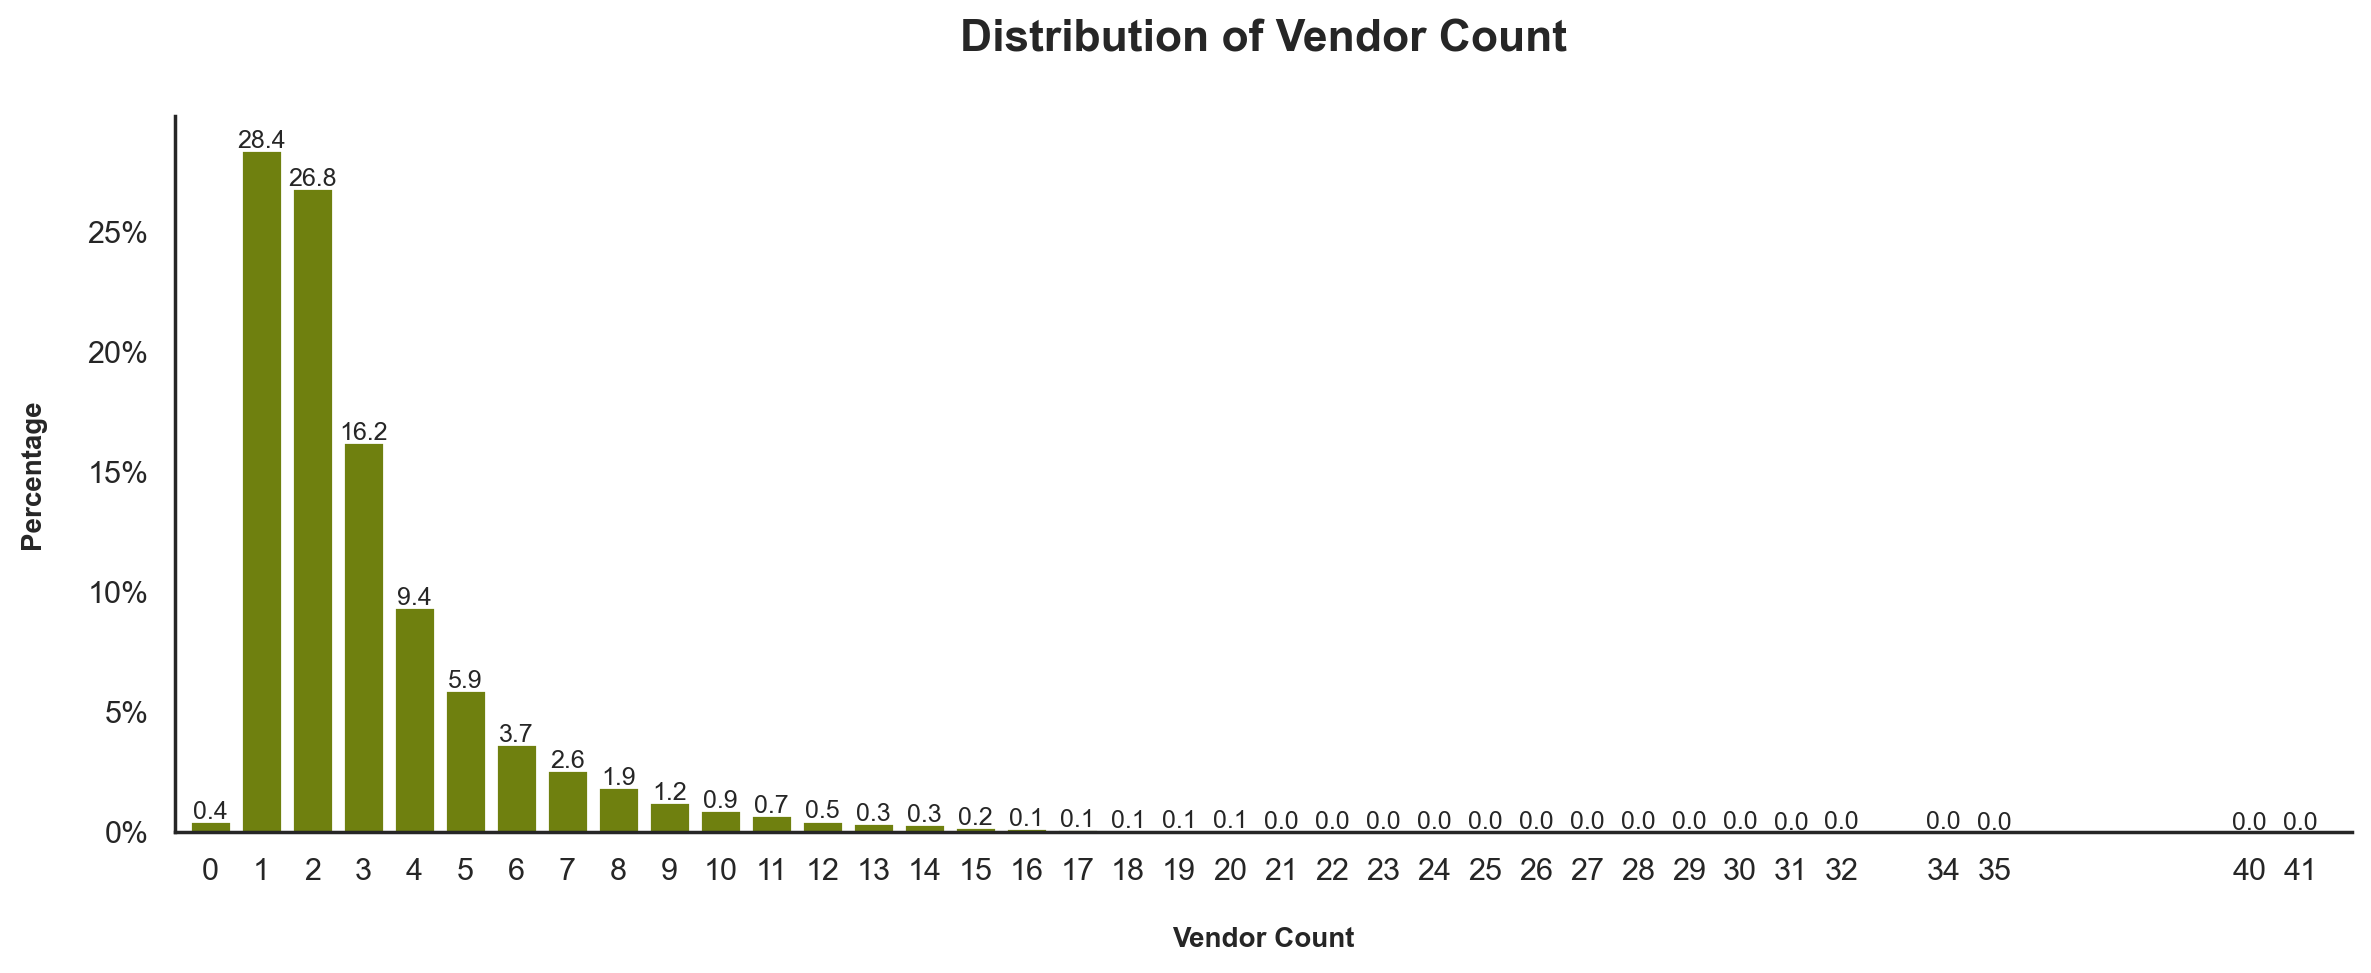

In [40]:
# Barplot representing the distribution of the vendor count
plt.figure(figsize=(12, 5))
plt.bar(ABCDEats['vendor_count'].value_counts(normalize=True).index, #.head(10)
        ABCDEats['vendor_count'].value_counts(normalize=True),       #.head(10)
        color='#6f800f')

plt.title('Distribution of Vendor Count\n', fontsize=16, fontweight='bold')
# plt.title('Distribution of Top 10 Vendor Counts\n', fontsize=16, fontweight='bold')
plt.xlabel('\nVendor Count', fontsize=10, fontweight='bold')
plt.ylabel('Percentage\n', fontsize=10, fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xlim(-.7, ABCDEats['vendor_count'].max()+1)
plt.xticks(sorted(map(int,ABCDEats['vendor_count'].unique())))

# Display the percentage on the top of each bar
for i in sorted(map(int,ABCDEats['vendor_count'].unique())):
    value = vendor_count_n_freq.sort_values(by='vendor_count', ascending=True).loc[i, '%']
    plt.text(i, value/100+0.001, f'{round(value,1)}', ha='center', fontsize=9)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

> To further understand the popularity of these vendors, this analysis can be complemented with information such as promos given, special campaigns, time to deliver, food quality and other customer attraction factors.

---

#### `product_count`

In [41]:
# Unique values of the column 'product_count'
print(ABCDEats['product_count'].nunique(), sorted(map(int,ABCDEats['product_count'].unique())))

93 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 87, 88, 89, 91, 94, 95, 97, 109, 110, 117, 269]


In [42]:
# Absolute and Relative Frequency Table of the column 'product_count'
product_count_n_freq = ABCDEats['product_count'].value_counts().reset_index()
product_count_n_freq.columns = ['product_count', 'n']
product_count_n_freq['%'] = round(product_count_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
product_count_n_freq.set_index('product_count', inplace=True)
pd.DataFrame(product_count_n_freq.sort_values(by='n', ascending=False))

n     %
product_count            
2              6282 19.71
3              4970 15.59
1              4690 14.71
4              3404 10.68
5              2382  7.47
...             ...   ...
88                1  0.00
94                1  0.00
82                1  0.00
76                1  0.00
68                1  0.00

[93 rows x 2 columns]

In [43]:
# Absolute and Relative Frequency Table of the column 'product_count' with cumulative percentage
product_count_n_freq['%_cumulative'] = round(product_count_n_freq.sort_values(by='n', ascending=False)['%'].cumsum(), 2)
pd.DataFrame(product_count_n_freq[product_count_n_freq.index <= 10]).sort_values(by='n', ascending=False)

n     %  %_cumulative
product_count                          
2              6282 19.71         19.71
3              4970 15.59         35.30
1              4690 14.71         50.01
4              3404 10.68         60.69
5              2382  7.47         68.16
6              1852  5.81         73.97
7              1359  4.26         78.23
8              1086  3.41         81.64
9               923  2.90         84.54
10              647  2.03         86.57
0               156  0.49         95.51

In [44]:
# Cumulative percentage of the top 10 most common product counts
product_count_n_freq[product_count_n_freq.index <= 10]['%'].sum()

87.06

In [45]:
# Cumulative percentage of the top 20 most common product counts
product_count_n_freq[product_count_n_freq.index <= 20]['%'].sum()

96.38000000000001

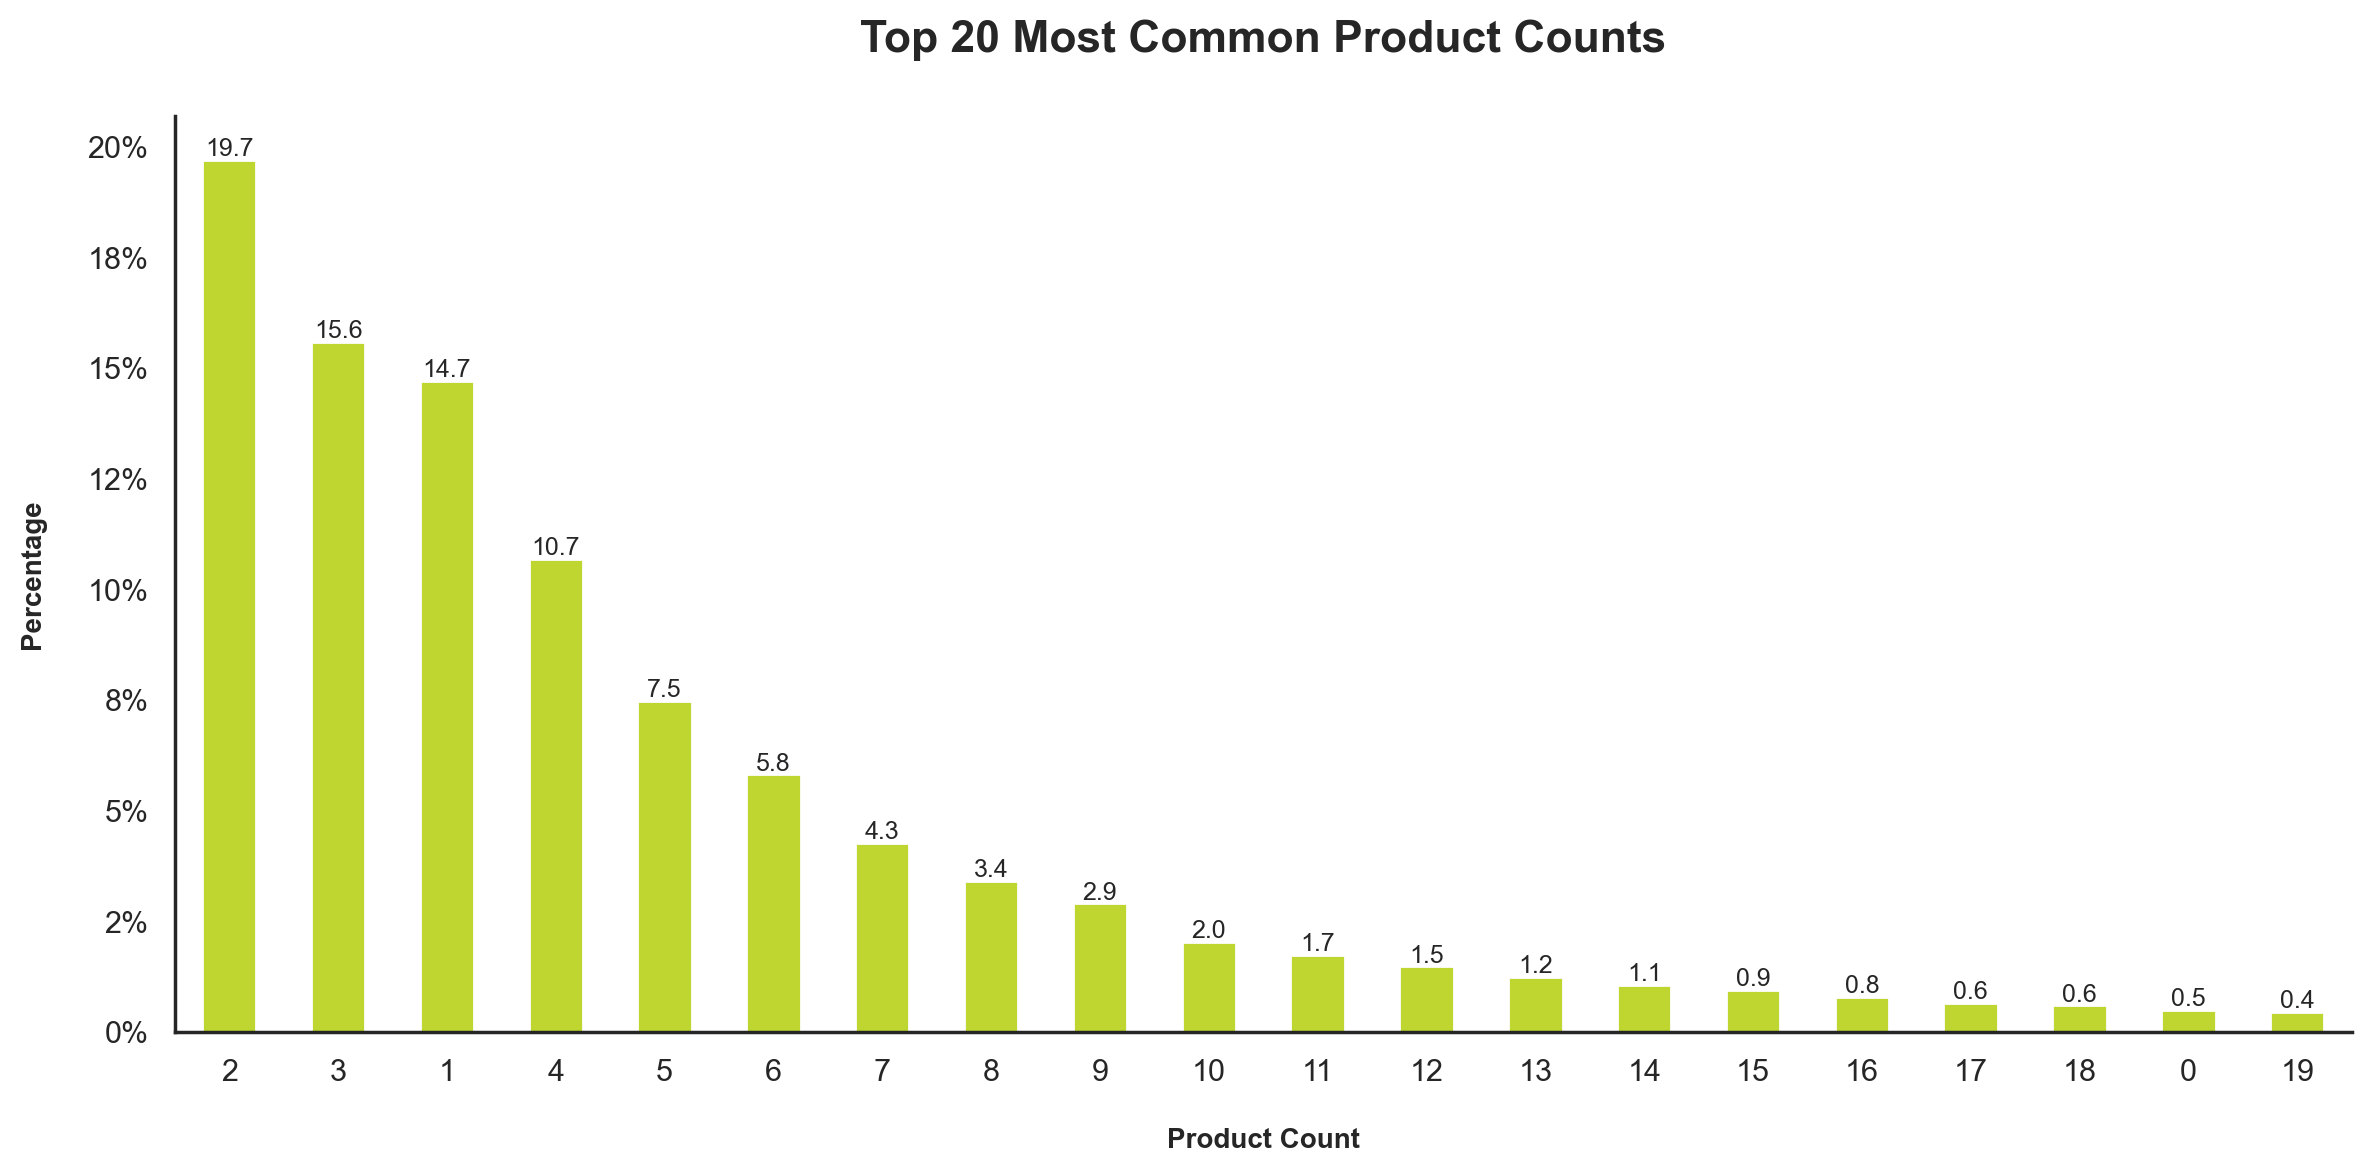

In [46]:
# The top 20 most common vendor counts
top_20_product_count = ABCDEats['product_count'].value_counts(normalize=True).head(20)

# Plot the top 20 most common vendor counts
plt.figure(figsize=(12, 6))
top_20_product_count.plot(kind='bar', color='#bEd62f')
plt.title('Top 20 Most Common Product Counts\n', fontsize=16, fontweight='bold')
plt.xlabel('\nProduct Count', fontsize=10, fontweight='bold')
plt.ylabel('Percentage\n', fontsize=10, fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.xticks(rotation=0)

# Display the percentage on the top of each bar
for i in range(len(top_20_product_count)):
    value = top_20_product_count.iloc[i]*100
    plt.text(i, value/100+.001, f'{value:.1f}', ha='center', fontsize=9)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

---

#### `is_chain`

In [47]:
# Unique values of the column 'is_chain'
print(ABCDEats['is_chain'].unique())

[ 1  2  0  3  5  4  7 12  6 23  8 11 20 14  9 10 16 15 13 25 17 27 30 32
 24 18 26 28 22 40 31 39 21 37 19 33 65 38 29 45 47 73 81 56 35 46 67 44
 61 34 36 49 83 75 43 42 48 63 54 80]


In [48]:
# Absolute and Relative Frequency Table of the column 'is_chain'
is_chain_n_freq = ABCDEats['is_chain'].value_counts().reset_index()
is_chain_n_freq.columns = ['is_chain', 'n']
is_chain_n_freq['%'] = round(is_chain_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
is_chain_n_freq.set_index('is_chain', inplace=True)
pd.DataFrame(is_chain_n_freq.sort_values(by='n', ascending=False))

n     %
is_chain            
1         8543 26.80
0         6099 19.13
2         5892 18.48
3         3696 11.60
4         2165  6.79
5         1380  4.33
6          946  2.97
7          679  2.13
8          500  1.57
9          373  1.17
10         291  0.91
11         248  0.78
12         169  0.53
13         152  0.48
14         138  0.43
15          89  0.28
16          68  0.21
18          65  0.20
17          55  0.17
19          35  0.11
20          34  0.11
21          29  0.09
22          26  0.08
24          23  0.07
23          20  0.06
26          20  0.06
27          16  0.05
25          14  0.04
28          13  0.04
29          10  0.03
30           9  0.03
31           9  0.03
32           8  0.03
34           6  0.02
33           6  0.02
36           5  0.02
43           5  0.02
40           5  0.02
37           4  0.01
35           4  0.01
45           4  0.01
48           2  0.01
39           2  0.01
42           2  0.01
65           1  0.00
38           1  0.00
67           1  0.00
47           1  0.00
73           1  0.00
81           1  0.00
56           1  0.00
54           1  0.00
44           1  0.00
61           1  0.00
46           1  0.00
49           1  0.00
83           1  0.00
63           1  0.00
75           1  0.00
80           1  0.00

In [49]:
# Absolute and Relative Frequency Table of the column 'is_chain' with cumulative percentage
is_chain_n_freq['%_cumulative'] = round(is_chain_n_freq.sort_values(by='n', ascending=False)['%'].cumsum(), 2)
pd.DataFrame(is_chain_n_freq).sort_values(by='n', ascending=False)

n     %  %_cumulative
is_chain                          
1         8543 26.80         26.80
0         6099 19.13         45.93
2         5892 18.48         64.41
3         3696 11.60         76.01
4         2165  6.79         82.80
5         1380  4.33         87.13
6          946  2.97         90.10
7          679  2.13         92.23
8          500  1.57         93.80
9          373  1.17         94.97
10         291  0.91         95.88
11         248  0.78         96.66
12         169  0.53         97.19
13         152  0.48         97.67
14         138  0.43         98.10
15          89  0.28         98.38
16          68  0.21         98.59
18          65  0.20         98.79
17          55  0.17         98.96
19          35  0.11         99.07
20          34  0.11         99.18
21          29  0.09         99.27
22          26  0.08         99.35
24          23  0.07         99.42
23          20  0.06         99.48
26          20  0.06         99.54
27          16  0.05         99.59
25          14  0.04         99.63
28          13  0.04         99.67
29          10  0.03         99.70
30           9  0.03         99.73
31           9  0.03         99.76
32           8  0.03         99.79
34           6  0.02         99.81
33           6  0.02         99.83
36           5  0.02         99.85
43           5  0.02         99.87
40           5  0.02         99.89
37           4  0.01         99.90
35           4  0.01         99.91
45           4  0.01         99.92
48           2  0.01         99.93
39           2  0.01         99.94
42           2  0.01         99.95
65           1  0.00         99.95
38           1  0.00         99.95
67           1  0.00         99.95
47           1  0.00         99.95
73           1  0.00         99.95
81           1  0.00         99.95
56           1  0.00         99.95
54           1  0.00         99.95
44           1  0.00         99.95
61           1  0.00         99.95
46           1  0.00         99.95
49           1  0.00         99.95
83           1  0.00         99.95
63           1  0.00         99.95
75           1  0.00         99.95
80           1  0.00         99.95

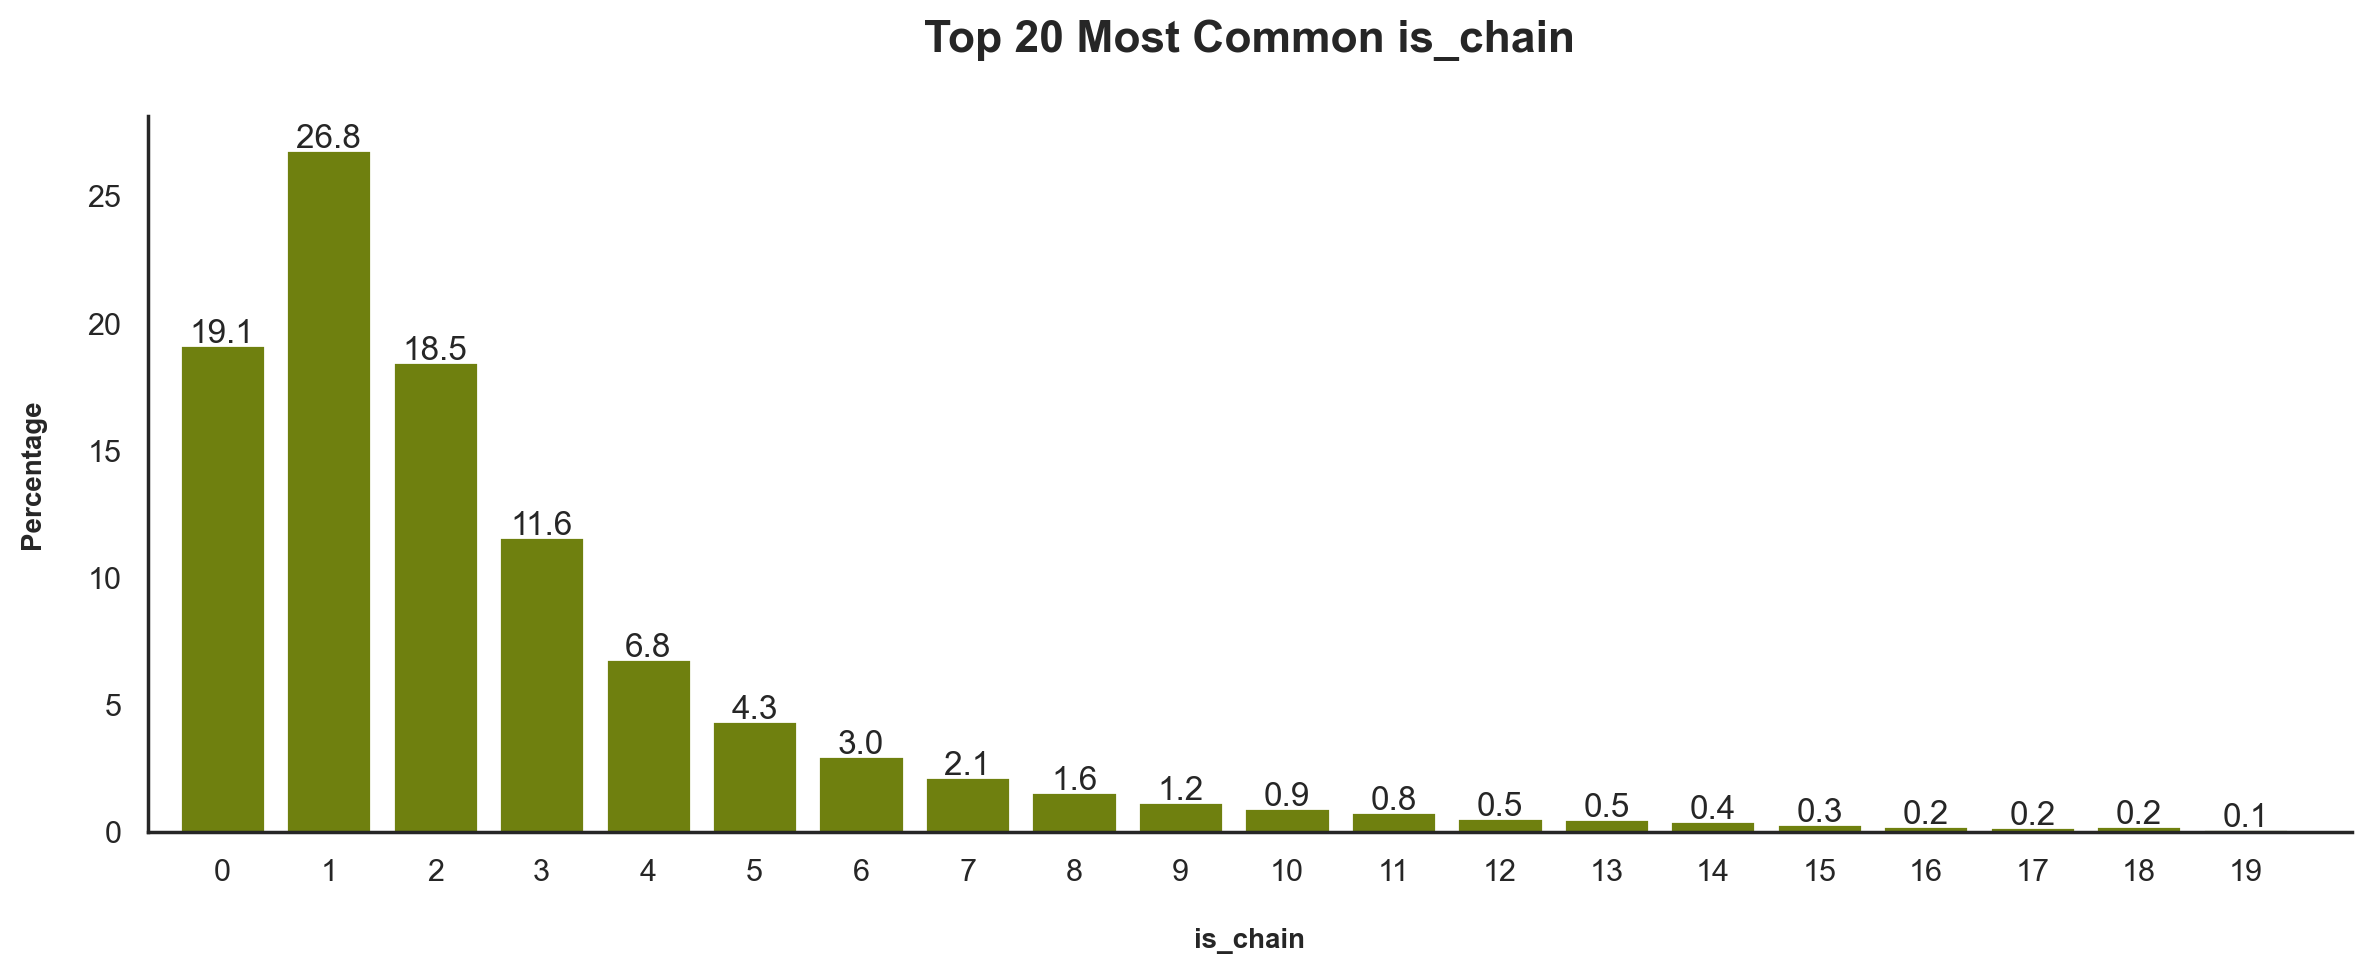

In [50]:
# Barplot representing the distribution of the 'is_chain' [Top 20]
plt.figure(figsize=(12, 5))
plt.bar(is_chain_n_freq[:20].index,
        is_chain_n_freq[:20]['%'],
        color='#6f800f')
plt.title('Top 20 Most Common is_chain\n', fontsize=16, fontweight='bold')
plt.xlabel('\nis_chain', fontsize=10, fontweight='bold')
plt.ylabel('Percentage\n', fontsize=10, fontweight='bold')
plt.xticks(is_chain_n_freq[:20].index)
plt.xlim(-.7, 20)

# Display the percentage on the top of each bar
for i in is_chain_n_freq[:20].index:
    value = is_chain_n_freq.loc[i, '%']
    plt.text(i, value+0.1, f'{value:.1f}', ha='center', fontsize=12)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [51]:
# # Boxplot of the column 'is_chain'
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=ABCDEats['is_chain'], color='#bEd62f')
# plt.title('Boxplot of is_chain', fontsize=14, fontweight='bold')
# plt.xlabel('')
# plt.ylabel('is_chain\n', fontsize=10, fontweight='bold')
# sns.despine(top=True, right=True)
# plt.tight_layout()
# plt.show()

In [52]:
# Calculate the percentage of orders in chain restaurants per customer
chain_restaurants = ABCDEats[['customer_id','is_chain', 'order_count']].copy()
chain_restaurants['%'] = chain_restaurants['is_chain'] / chain_restaurants['order_count'] * 100
chain_restaurants

customer_id  is_chain  order_count      %
0      1b8f824d5e         1            2  50.00
1      5d272b9dcb         2            2 100.00
2      f6d1b2ba63         2            2 100.00
3      180c632ed8         1            2  50.00
4      4eb37a6705         0            2   0.00
...           ...       ...          ...    ...
31883  f4e366c281         1            1 100.00
31884  f6b6709018         0            1   0.00
31885  f74ad8ce3f         1            1 100.00
31886  f7b19c0241         0            1   0.00
31887  fd40d3b0e0         0            1   0.00

[31875 rows x 4 columns]

<div class="alert alert-block alert-warning" style="font-size: 50px; font-weight: bold;">
    O QUE FAZER COM ISTO? [Não percebi bem o que é esta percentagem] 
</div>

In [60]:
# Analyze the variable 'is_chain' in relation to the 'customer_region'
is_chain_region = ABCDEats.groupby(['customer_region', 'is_chain']).size().unstack()

# Calculate the percentage of chain restaurants per region
is_chain_region_p = is_chain_region.div(is_chain_region.sum(axis=1), axis=0) * 100
is_chain_region_p

is_chain           0     1     2     3     4    5    6    7    8    9    10  \
customer_region                                                               
-               22.85 35.29 19.00  8.14  4.75 4.07 2.49 0.45 0.68 0.90  NaN   
2360             3.91 20.99 20.25 15.55  9.43 6.57 4.59 3.47 2.51 2.08 1.80   
2440             4.18 22.39 18.54 15.64  9.91 7.22 4.59 3.57 2.97 1.82 1.69   
2490             4.04 23.15 24.94  9.66 11.01 5.17 4.04 3.60 3.15 1.80 1.12   
4140            60.68 20.19  9.33  3.85  2.22 1.05 0.58 0.47 0.35 0.12 0.35   
4660            27.39 26.42 16.18  9.29  6.03 3.73 2.75 1.84 1.46 1.04 0.77   
8370            36.97 35.15 17.17  5.45  1.62 1.01 1.01 0.40 0.61 0.20 0.40   
8550            38.46 30.77  7.69 15.38   NaN  NaN  NaN  NaN  NaN 7.69  NaN   
8670            23.04 33.04 19.70 10.89  5.25 2.89 1.75 1.23 0.74 0.49 0.24   

is_chain          11   12   13   14   15   16   17   18   19   20   21   22  \
customer_region                                                               
-               0.68 0.23  NaN 0.23  NaN  NaN 0.23  NaN  NaN  NaN  NaN  NaN   
2360            1.51 1.13 1.00 0.86 0.61 0.45 0.37 0.50 0.26 0.15 0.19 0.19   
2440            1.42 0.67 1.15 0.81 0.27 0.54 0.34 0.40 0.20 0.40 0.20 0.20   
2490            1.57 0.90 0.67 2.92 0.45  NaN 0.22  NaN  NaN 0.45 0.22  NaN   
4140            0.47 0.23  NaN  NaN  NaN  NaN 0.12  NaN  NaN  NaN  NaN  NaN   
4660            0.63 0.44 0.37 0.30 0.24 0.16 0.10 0.13 0.08 0.13 0.08 0.05   
8370             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8550             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8670            0.20 0.10 0.09 0.07 0.06 0.05 0.04 0.03 0.01 0.01  NaN 0.01   

is_chain          23   24   25   26   27   28   29   30   31   32   33   34  \
customer_region                                                               
-                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2360            0.17 0.16 0.10 0.16 0.10 0.11 0.09 0.06 0.05 0.07 0.05 0.03   
2440            0.13 0.20 0.07 0.13  NaN  NaN 0.07  NaN 0.07  NaN  NaN 0.07   
2490             NaN  NaN 0.22  NaN 0.45 0.22  NaN  NaN  NaN  NaN  NaN  NaN   
4140             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4660            0.03 0.05 0.03 0.03 0.04 0.02 0.01 0.03 0.03 0.01 0.02 0.02   
8370             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8550             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8670             NaN 0.01  NaN 0.01 0.01  NaN  NaN 0.01 0.01 0.01  NaN  NaN   

is_chain          35   36   37   38   39   40   42   43   44   45   46   47  \
customer_region                                                               
-                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2360            0.02 0.06 0.05 0.01 0.02 0.06 0.02 0.03 0.01 0.02 0.01 0.01   
2440             NaN  NaN  NaN  NaN  NaN  NaN  NaN 0.07  NaN 0.07  NaN  NaN   
2490             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4140             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4660            0.02  NaN  NaN  NaN  NaN  NaN  NaN 0.01  NaN 0.01  NaN  NaN   
8370             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8550             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
8670             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

is_chain          48   49   54   56   61   63   65   67   73   75   80   81  \
customer_region                                                               
-                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2360            0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01   
2440             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2490             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4140             NaN  NaN  NaN  NaN  NaN  NaN 

In [59]:
# Just to check if the sum of the percentage of chain restaurants per region is equal to 100%
# is_chain_region_p.sum(axis=1) # Right

---

#### `first_order` & `last_order`

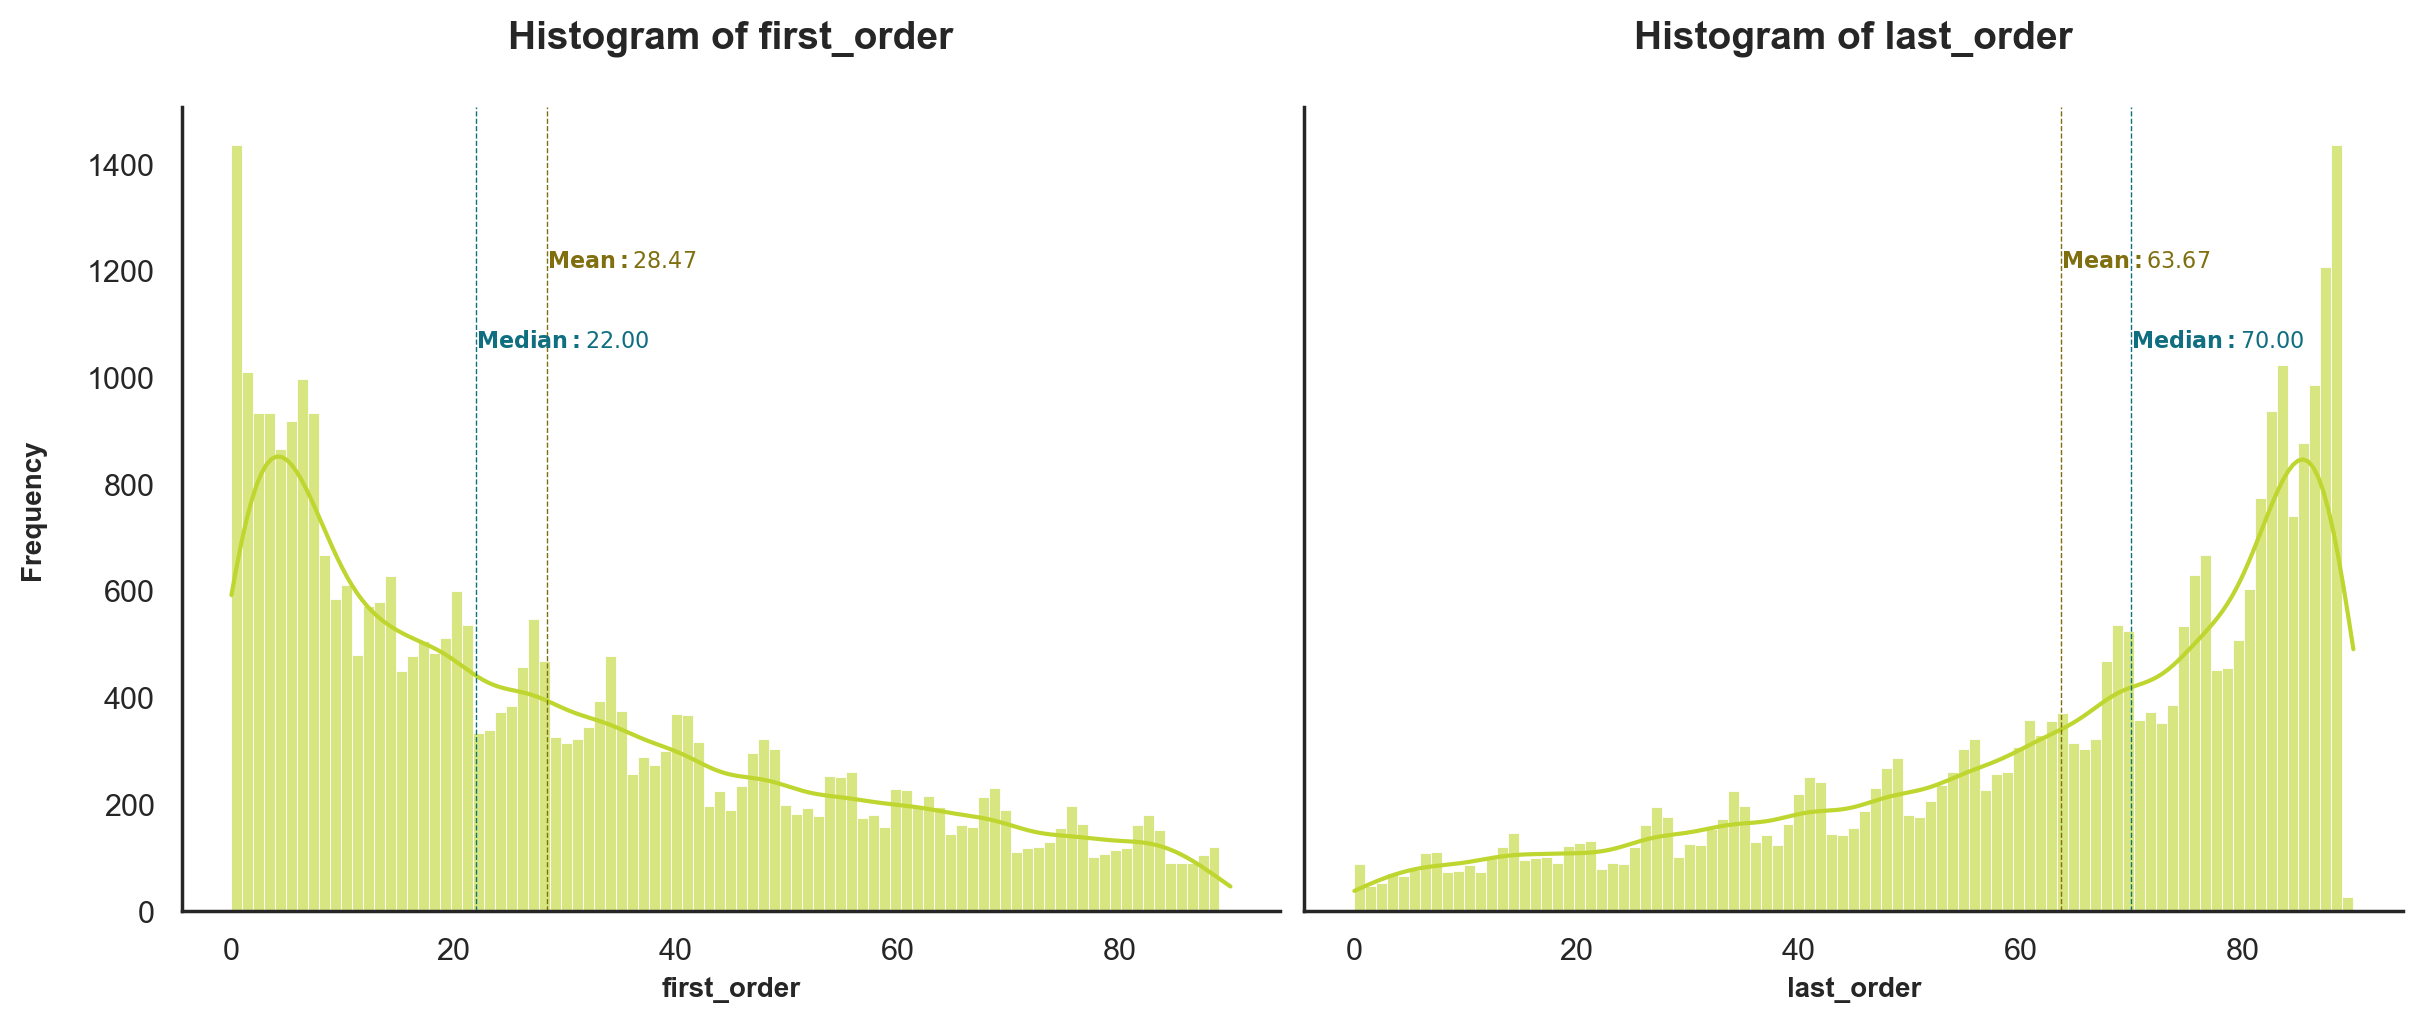

In [154]:
# Histogram of the column 'first_order' and 'last_order'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), constrained_layout=True)

sns.set_theme(style='white')
for i, col in enumerate(['first_order', 'last_order']):
    sns.histplot(data=ABCDEats, x=col, bins=ABCDEats[col].nunique(), 
                 kde=True, color='#bEd62f', alpha=0.6, ax=axes[i])
    
    axes[i].set_title(f'Histogram of {col}\n', fontweight='bold', fontsize=14)
    axes[i].set_xlabel(f'{col}', fontweight='bold', fontsize=10)
    
    if i == 0:
        axes[i].set_ylabel('Frequency\n', fontweight='bold', fontsize=10)
    
    if i == 1:
        axes[i].yaxis.set_visible(False)
    
    # Calculate mean and median
    mean_val = ABCDEats[col].mean()
    median_val = ABCDEats[col].median()
    
    # Plot mean line
    axes[i].axvline(mean_val, color='#806F0F', linestyle='dashed', linewidth=.5)
    axes[i].text(mean_val, axes[i].get_ylim()[1] * 0.8, rf'$\mathbf{{Mean:}} {mean_val:.2f}$', color='#806F0F', fontsize=8)
    
    # Plot median line
    axes[i].axvline(median_val, color='#0F6F80', linestyle='dashed', linewidth=.5)
    axes[i].text(median_val, axes[i].get_ylim()[1] * 0.7, rf'$\mathbf{{Median:}} {median_val:.2f}$', color='#0F6F80', fontsize=8)
    
sns.despine(top=True, right=True)
plt.show()

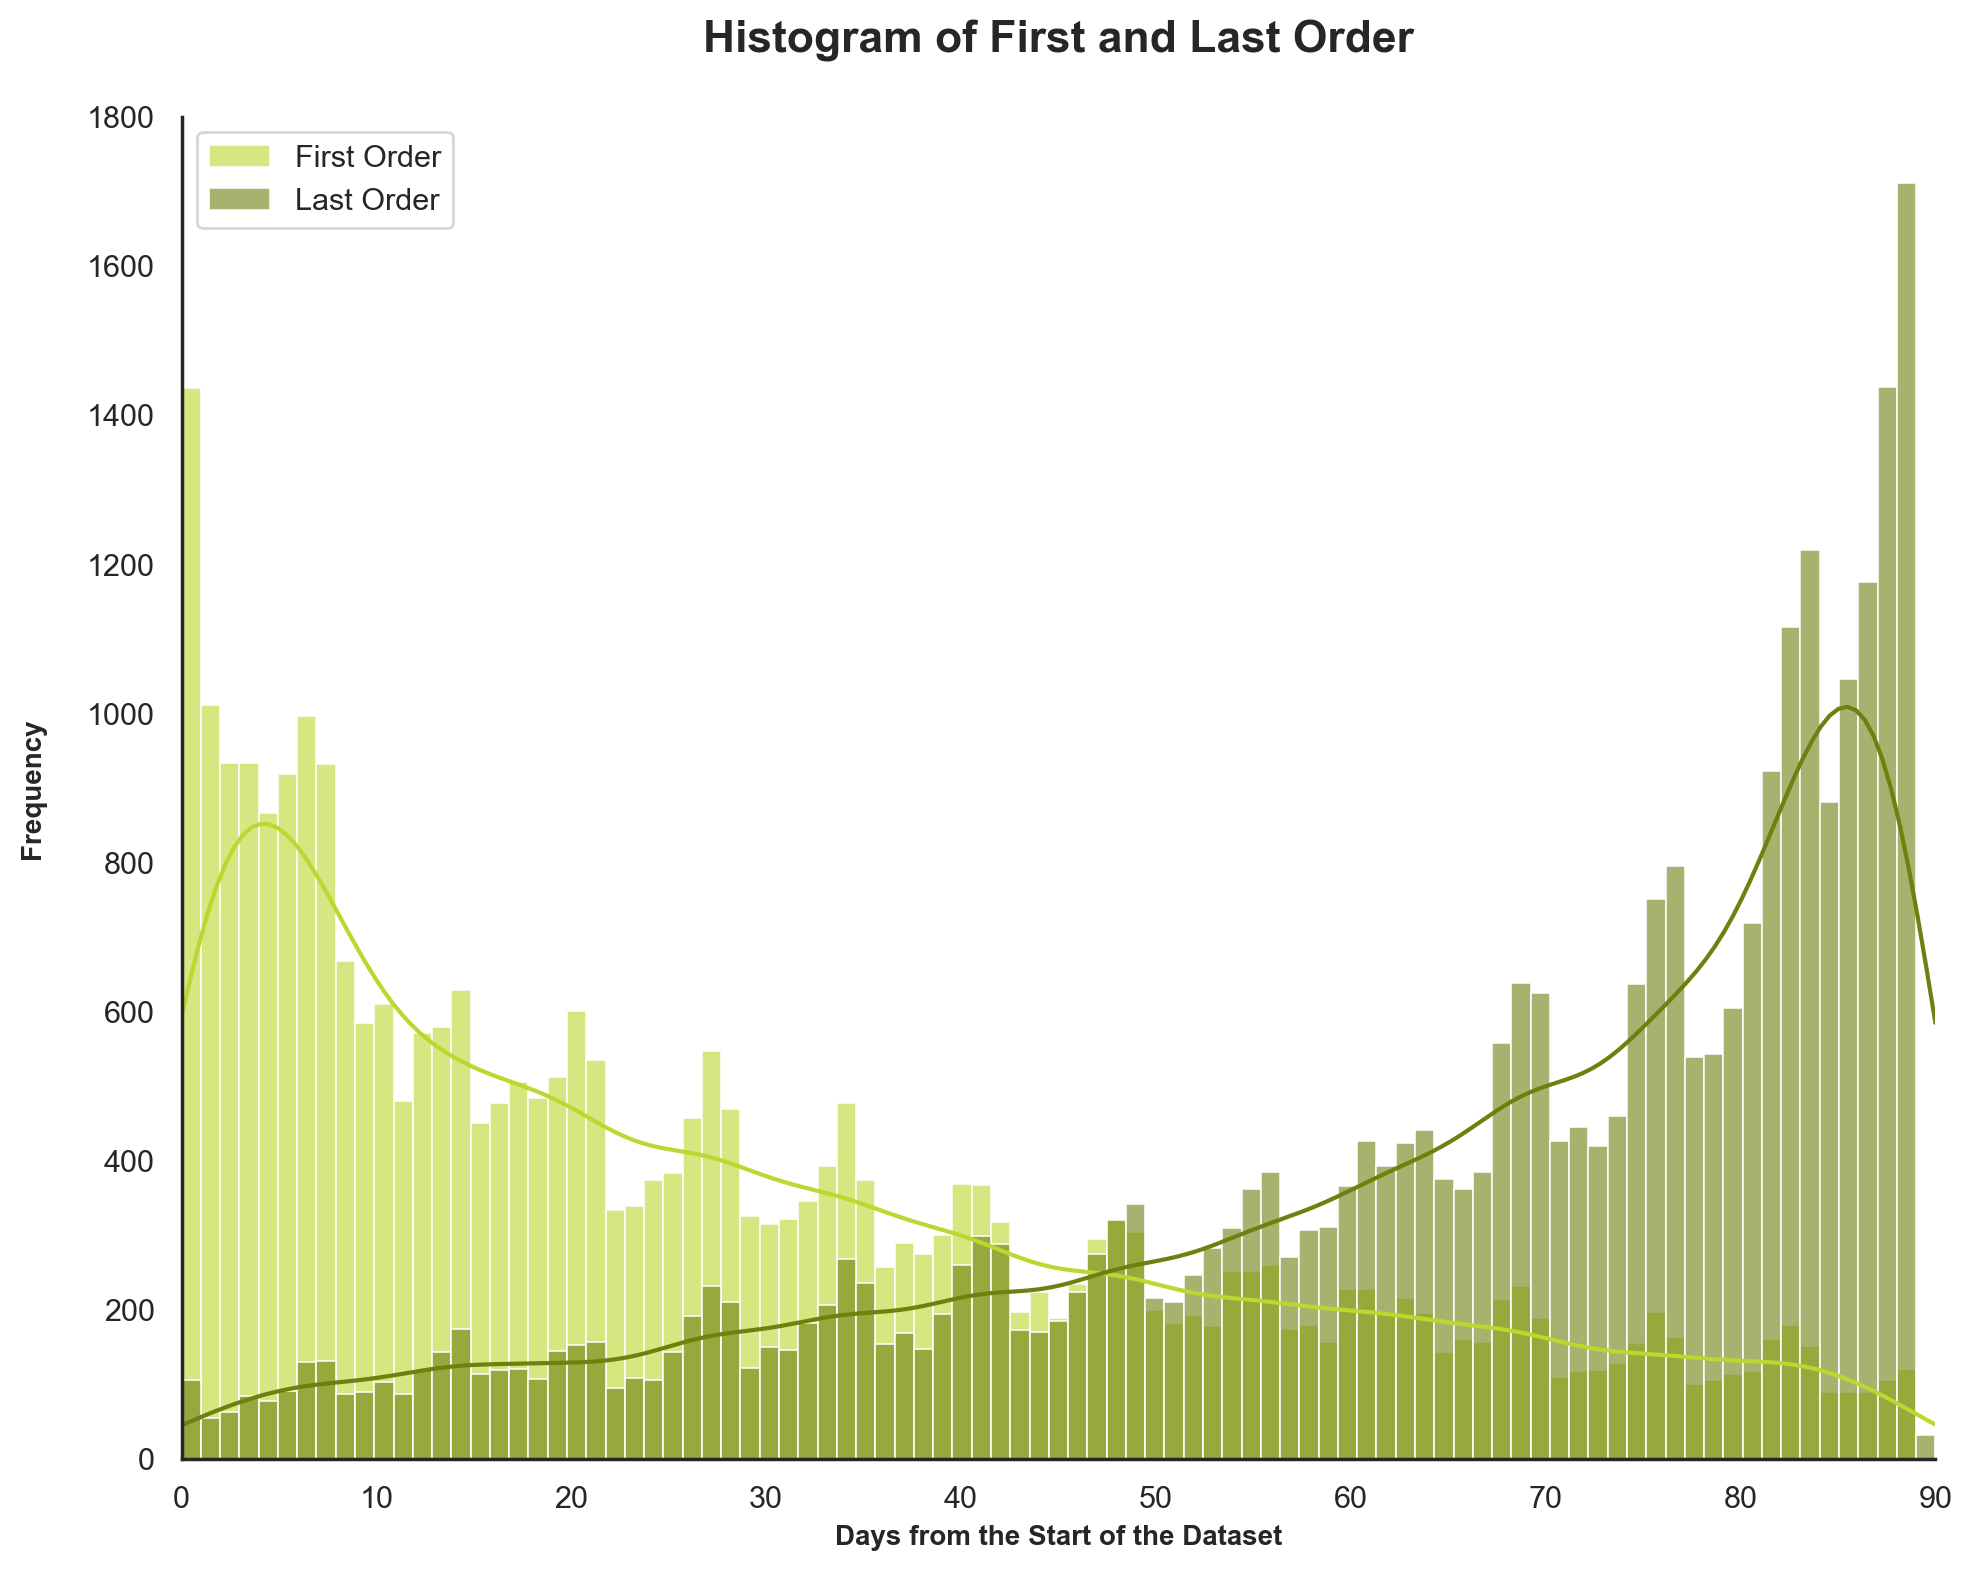

In [132]:
# Histogram of the column 'first_order' and 'last_order' at the same plot
plt.figure(figsize=(10, 8))
sns.histplot(ABCDEats['first_order'], bins=ABCDEats['first_order'].nunique(), color='#bEd62f', alpha=0.6, label='First Order', kde=True)
sns.histplot(ABCDEats['last_order'], bins=ABCDEats['last_order'].nunique(), color='#6f800f', alpha=0.6, label='Last Order', kde=True)
plt.title('Histogram of First and Last Order\n', fontweight='bold', fontsize=16)
plt.xlabel('Days from the Start of the Dataset', fontweight='bold', fontsize=10)
plt.ylabel('Frequency\n', fontweight='bold', fontsize=10)   
plt.xlim(0, 90)
plt.ylim(0, 1800)
plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

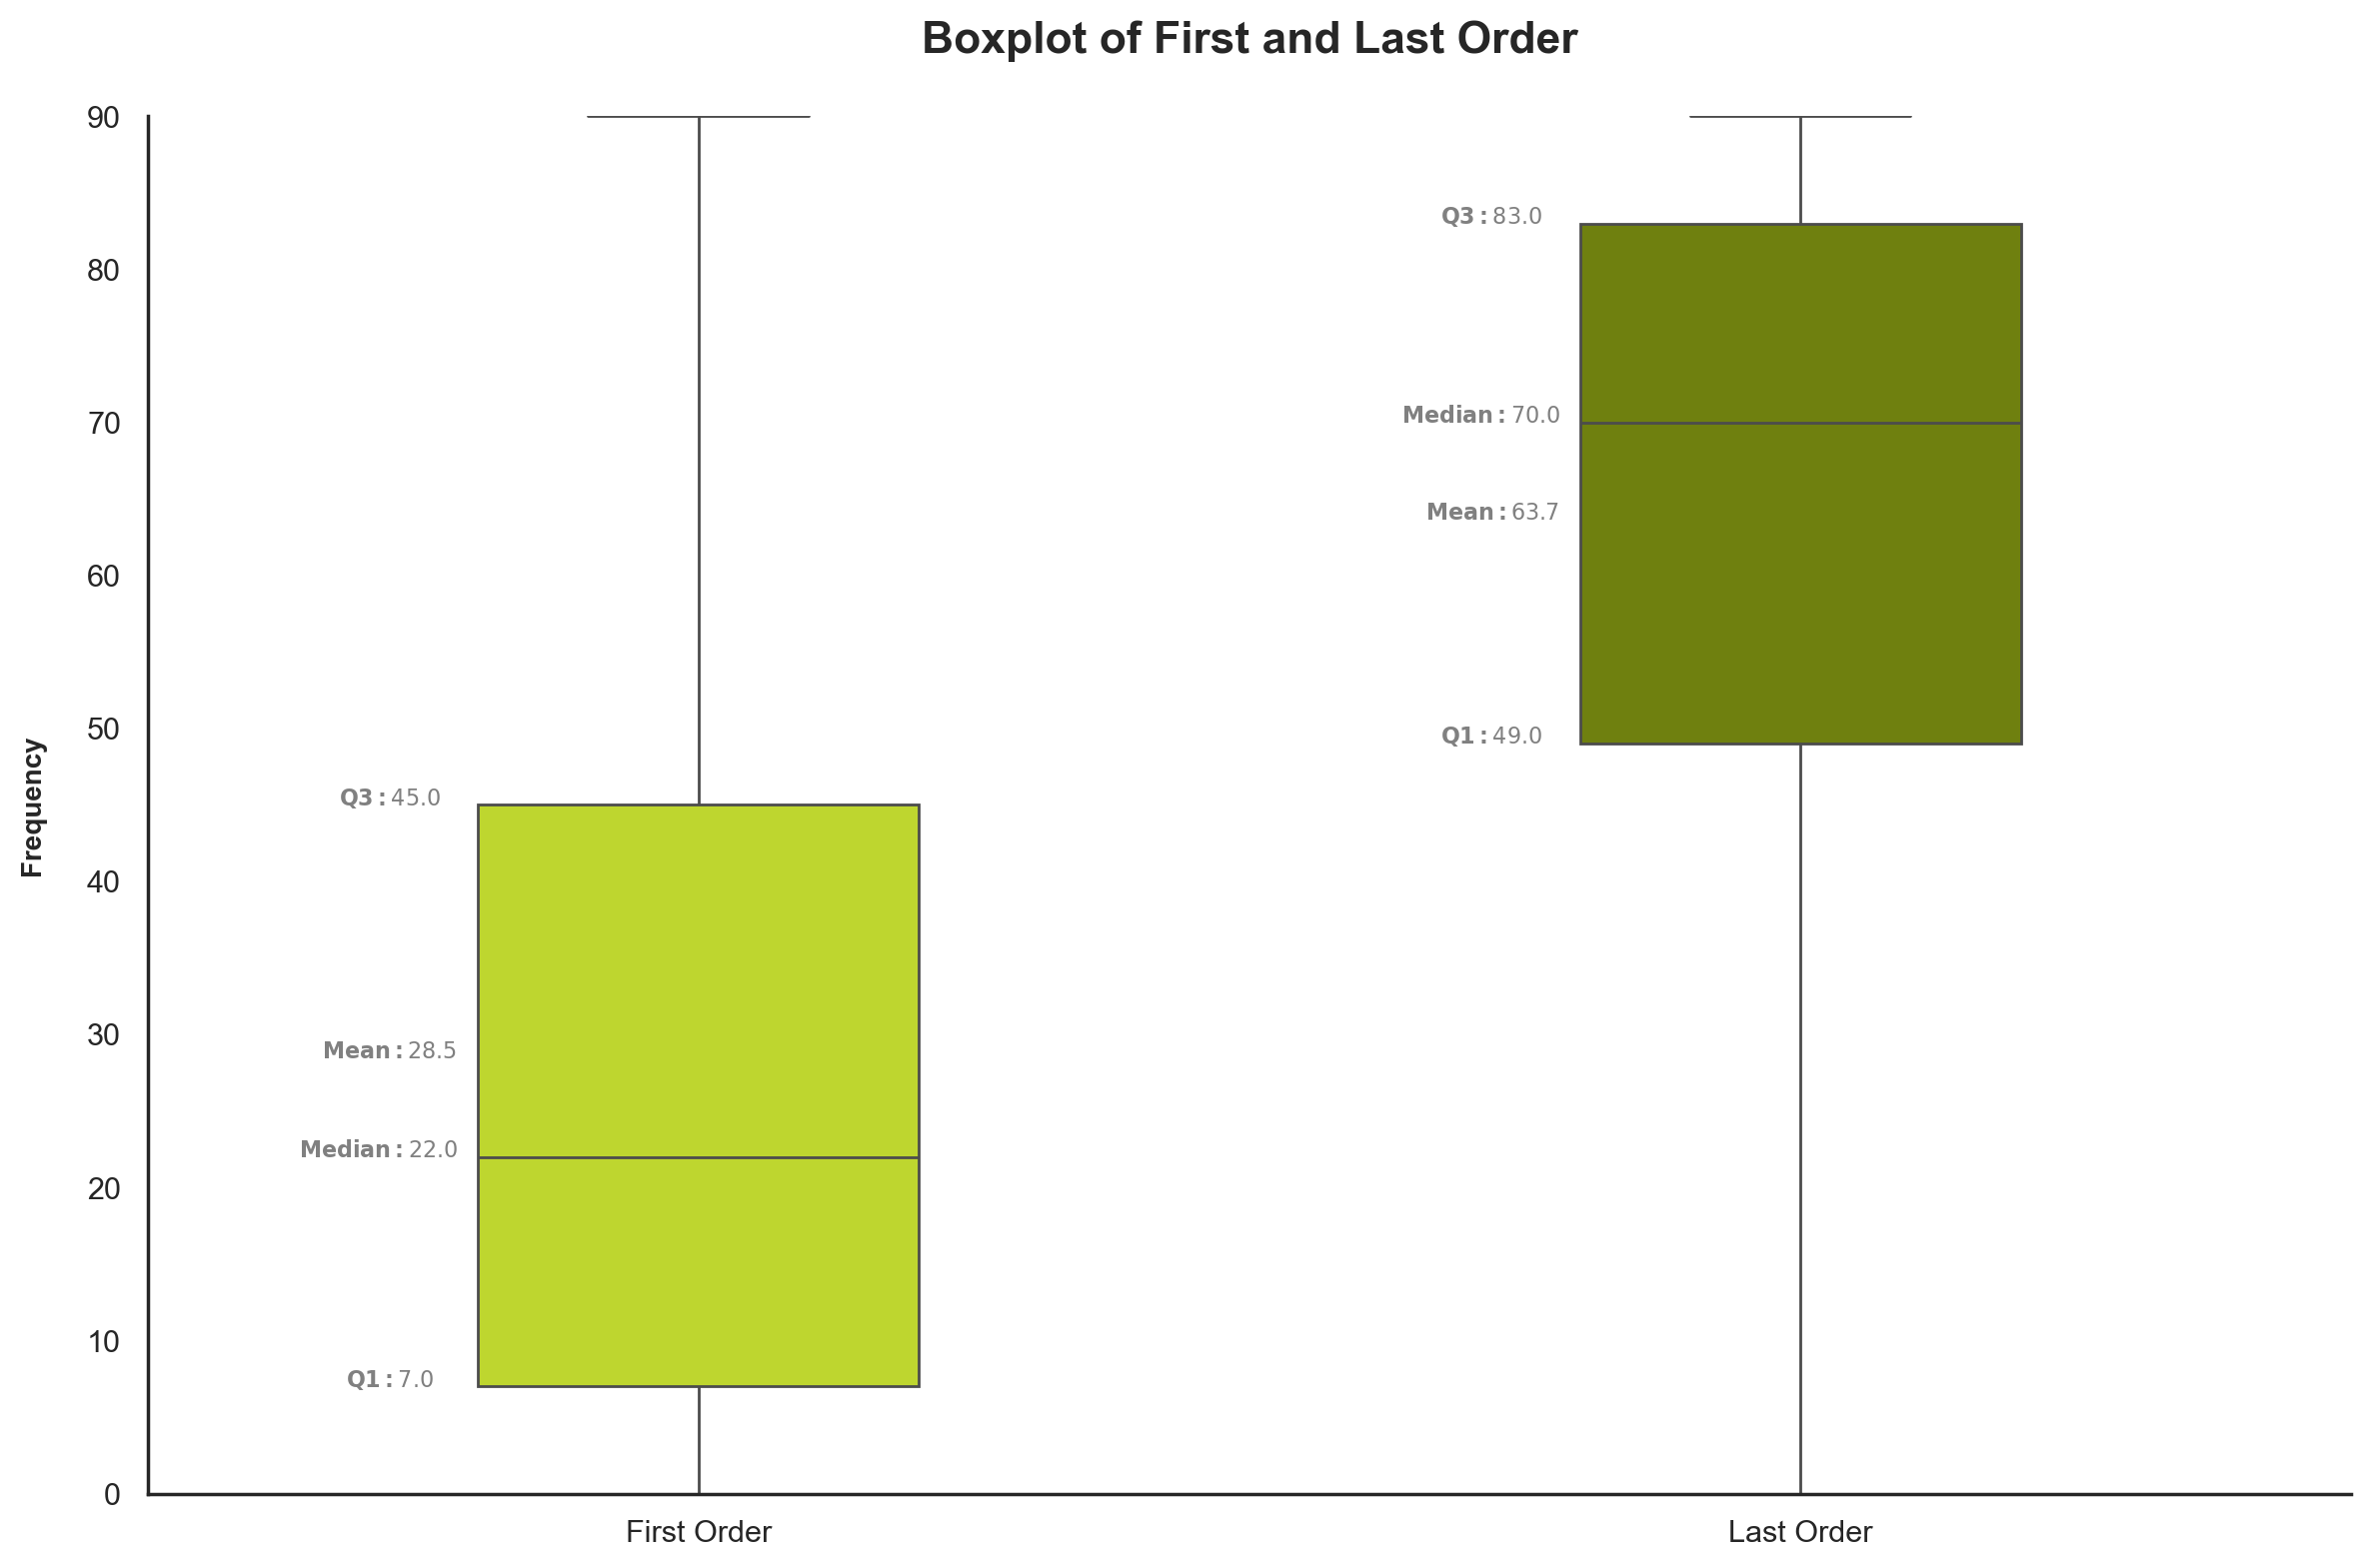

In [151]:
# Boxplot of the columns 'first_order' and 'last_order'
plt.figure(figsize=(12, 8))
sns.boxplot(data=ABCDEats[['first_order']], color='#bEd62f', width=0.4, boxprops={'facecolor':'#bEd62f'})
sns.boxplot(data=ABCDEats[['last_order']], color='#6f800f', width=0.4, boxprops={'facecolor':'#6f800f'}, positions=[1])
plt.title('Boxplot of First and Last Order\n', fontweight='bold', fontsize=16)
# plt.xlabel('\nDays from the Start of the Dataset', fontweight='bold', fontsize=10)
plt.ylabel('Frequency\n', fontweight='bold', fontsize=10)
plt.xticks([0, 1], ['First Order', 'Last Order'])
plt.ylim(0, 90)

# Add mean, median and percentiles to the plot
for i, col in enumerate(['first_order', 'last_order']):
    mean_val = ABCDEats[col].mean()
    median_val = ABCDEats[col].median()
    q1_val = ABCDEats[col].quantile(0.25)
    q3_val = ABCDEats[col].quantile(0.75)
    
    plt.text(i-0.28, mean_val, rf'$\mathbf{{Mean:}} {mean_val:.1f}$', color='grey', fontsize=8, ha='center')
    plt.text(i-0.29, median_val, rf'$\mathbf{{Median:}} {median_val:.1f}$', color='grey', fontsize=8, ha='center')
    plt.text(i-0.28, q1_val, rf'$\mathbf{{Q1:}} {q1_val:.1f}$', color='grey', fontsize=8, ha='center')
    plt.text(i-0.28, q3_val, rf'$\mathbf{{Q3:}} {q3_val:.1f}$', color='grey', fontsize=8, ha='center')
    
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [160]:
# Calculate the difference between the 'first_order' and 'last_order'
ABCDEats['days_between_orders'] = ABCDEats['last_order'] - ABCDEats['first_order']

# Descriptive statistics of the column 'days_between_orders'
round(ABCDEats['days_between_orders'].describe(), 2)

count   31769.00
mean       35.41
std        29.42
min         0.00
25%         3.00
50%        34.00
75%        62.00
max        90.00
Name: days_between_orders, dtype: float64

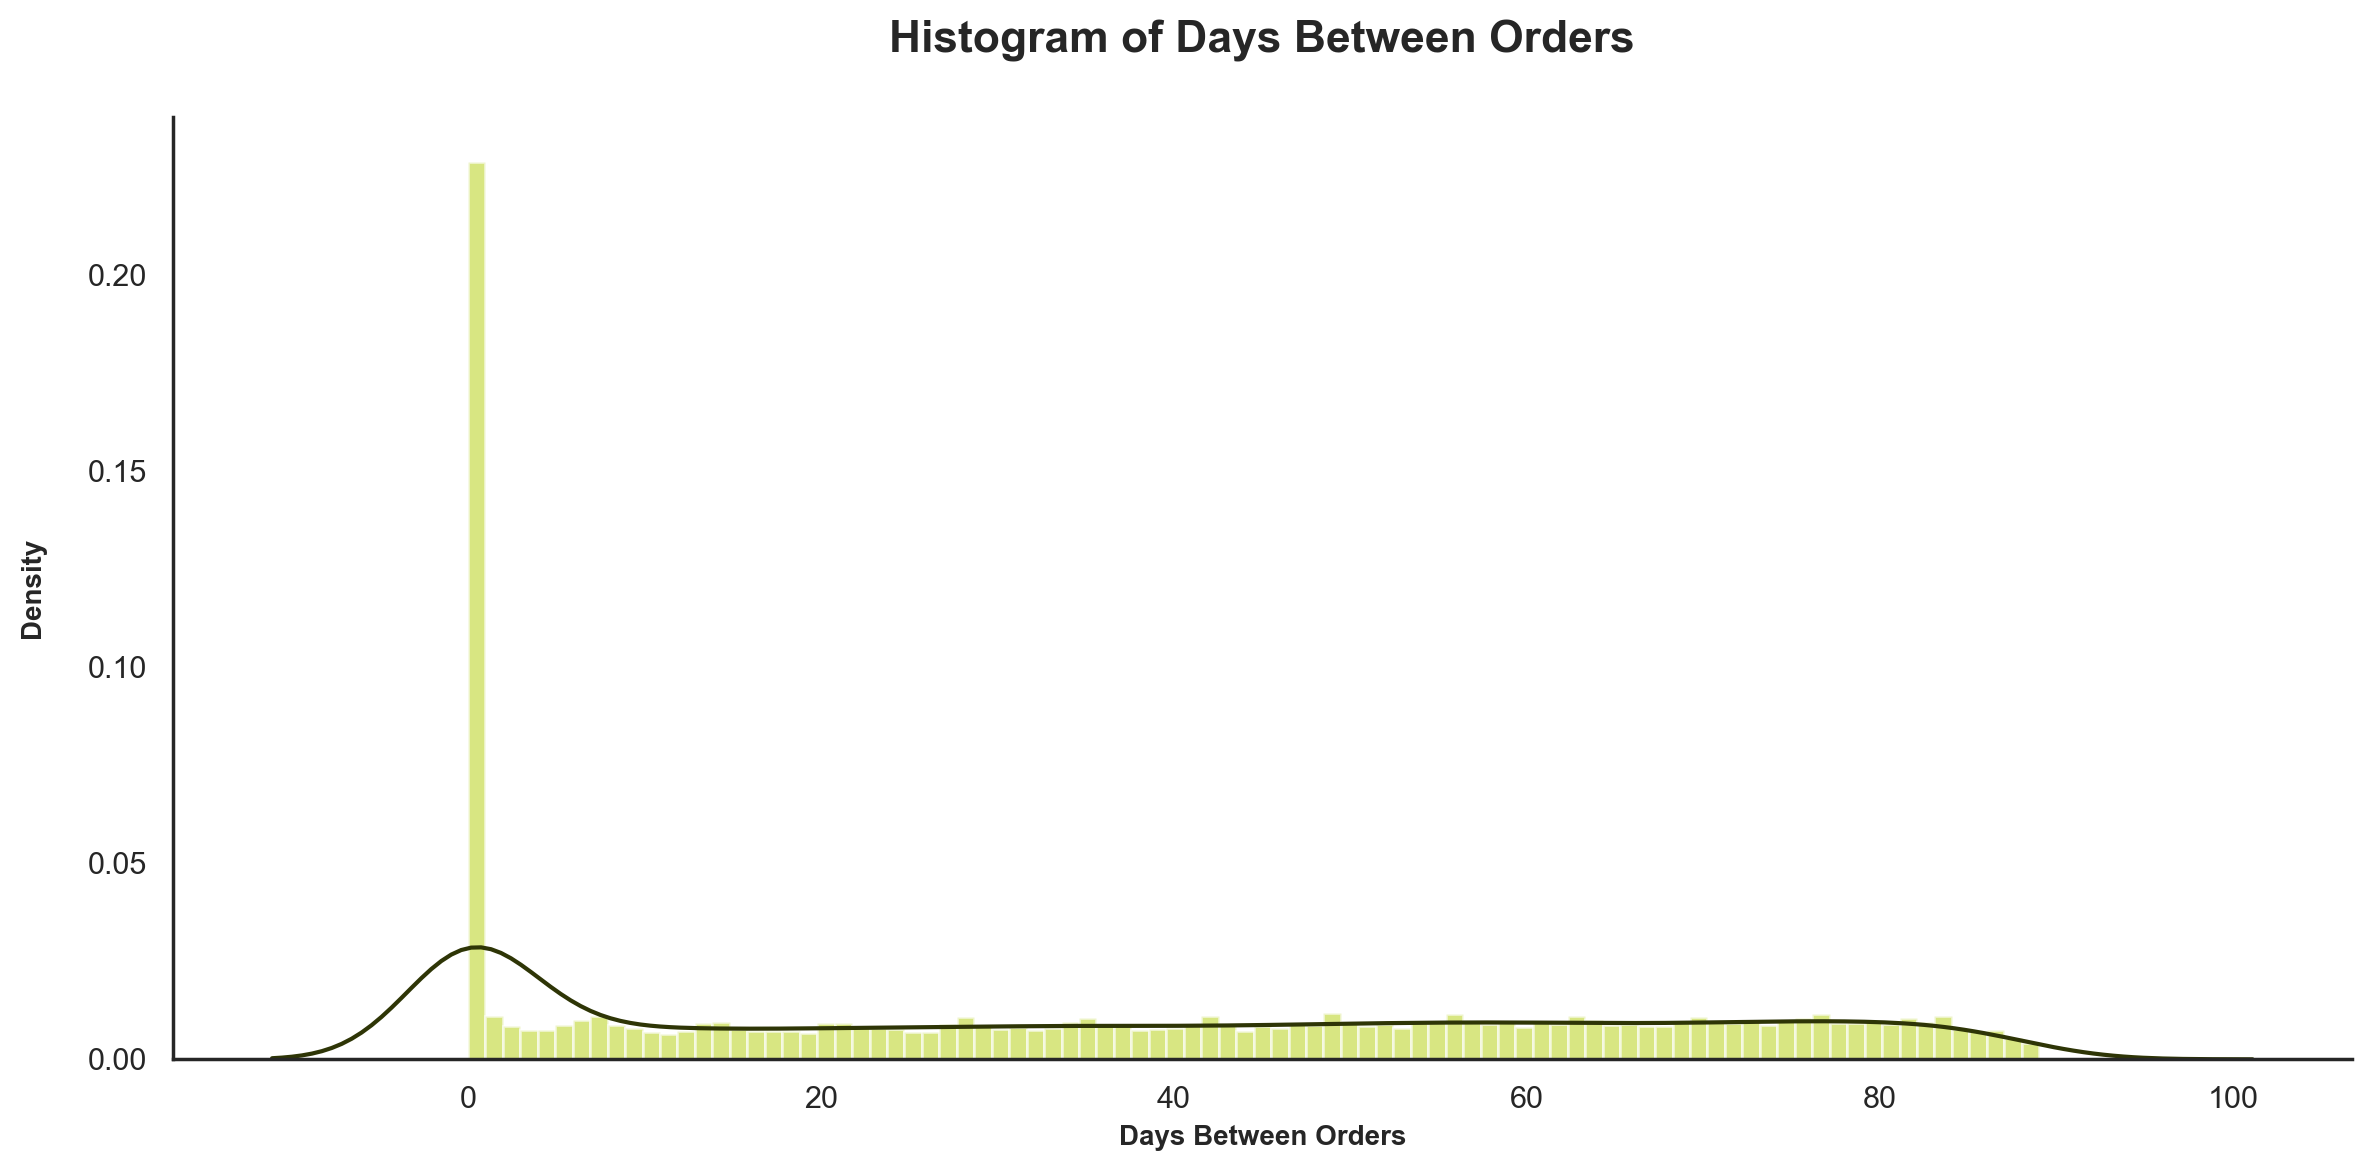

In [166]:
# Histogram of the column 'days_between_orders'
plt.figure(figsize=(12, 6))
plt.hist(ABCDEats['days_between_orders'], # [ABCDEats['days_between_orders'] > 0], 
         bins=ABCDEats['days_between_orders'].nunique(), color='#bEd62f', alpha=0.6, density=True)
sns.kdeplot(ABCDEats['days_between_orders'], color='#2E3506', lw=1.5)
plt.title('Histogram of Days Between Orders\n', fontweight='bold', fontsize=16)
plt.xlabel('Days Between Orders', fontweight='bold', fontsize=10)
plt.ylabel('Density\n', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

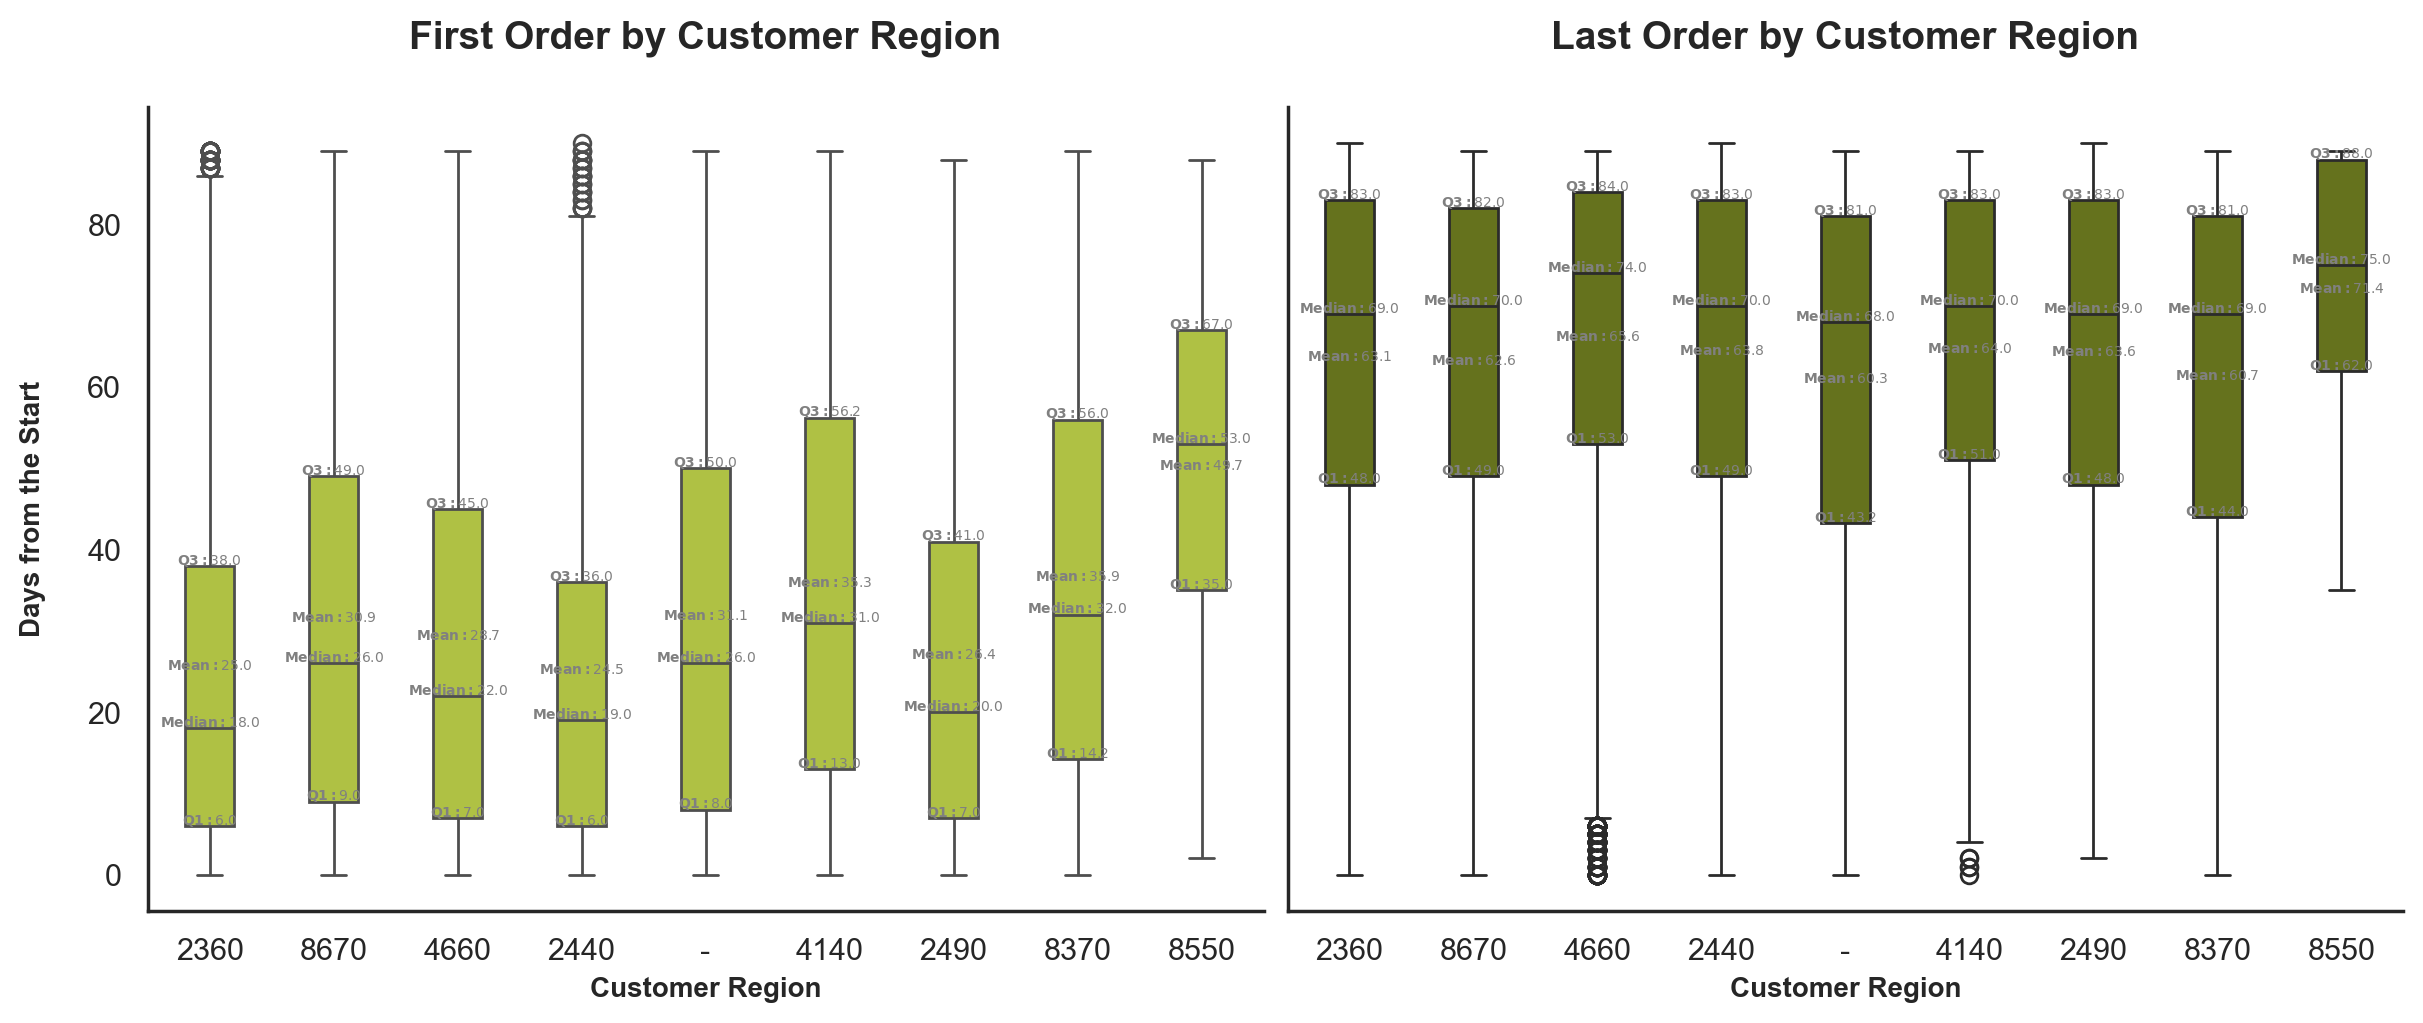

In [182]:
# Create subplots for side-by-side boxplots of first_order and last_order by customer_region
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), constrained_layout=True)

# Boxplot of 'first_order' by 'customer_region'
sns.boxplot(data=ABCDEats, x='customer_region', y='first_order', color='#bEd62f', width=0.4, ax=axes[0])
axes[0].set_title('First Order by Customer Region\n', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Customer Region', fontweight='bold', fontsize=10)
axes[0].set_ylabel('Days from the Start\n', fontweight='bold', fontsize=10)

# Boxplot of 'last_order' by 'customer_region'
sns.boxplot(data=ABCDEats, x='customer_region', y='last_order', color='#6f800f', width=0.4, ax=axes[1])
axes[1].set_title('Last Order by Customer Region\n', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Customer Region', fontweight='bold', fontsize=10)
axes[1].set_ylabel('')  # Remove y-axis label to avoid repetition
axes[1].yaxis.set_visible(False)  # Hide y-axis on the second plot for clarity

# Calculate and annotate statistics (mean, median, Q1, Q3) on each plot
for i, col in enumerate(['first_order', 'last_order']):
    for region in ABCDEats['customer_region'].unique():
        region_data = ABCDEats[ABCDEats['customer_region'] == region][col]
        
        # Calculate statistics
        mean_val = region_data.mean()
        median_val = region_data.median()
        q1_val = region_data.quantile(0.25)
        q3_val = region_data.quantile(0.75)

        # Position text annotations at appropriate spots
        axes[i].text(x=region, y=mean_val+.2, s=rf'$\mathbf{{Mean:}} {mean_val:.1f}$', color='grey', fontsize=5, ha='center')
        axes[i].text(x=region, y=median_val+.2, s=rf'$\mathbf{{Median:}} {median_val:.1f}$', color='grey', fontsize=5, ha='center')
        axes[i].text(x=region, y=q1_val+.2, s=rf'$\mathbf{{Q1:}} {q1_val:.1f}$', color='grey', fontsize=5, ha='center')
        axes[i].text(x=region, y=q3_val+.2, s=rf'$\mathbf{{Q3:}} {q3_val:.1f}$', color='grey', fontsize=5, ha='center')

sns.despine(top=True, right=True)
plt.show()

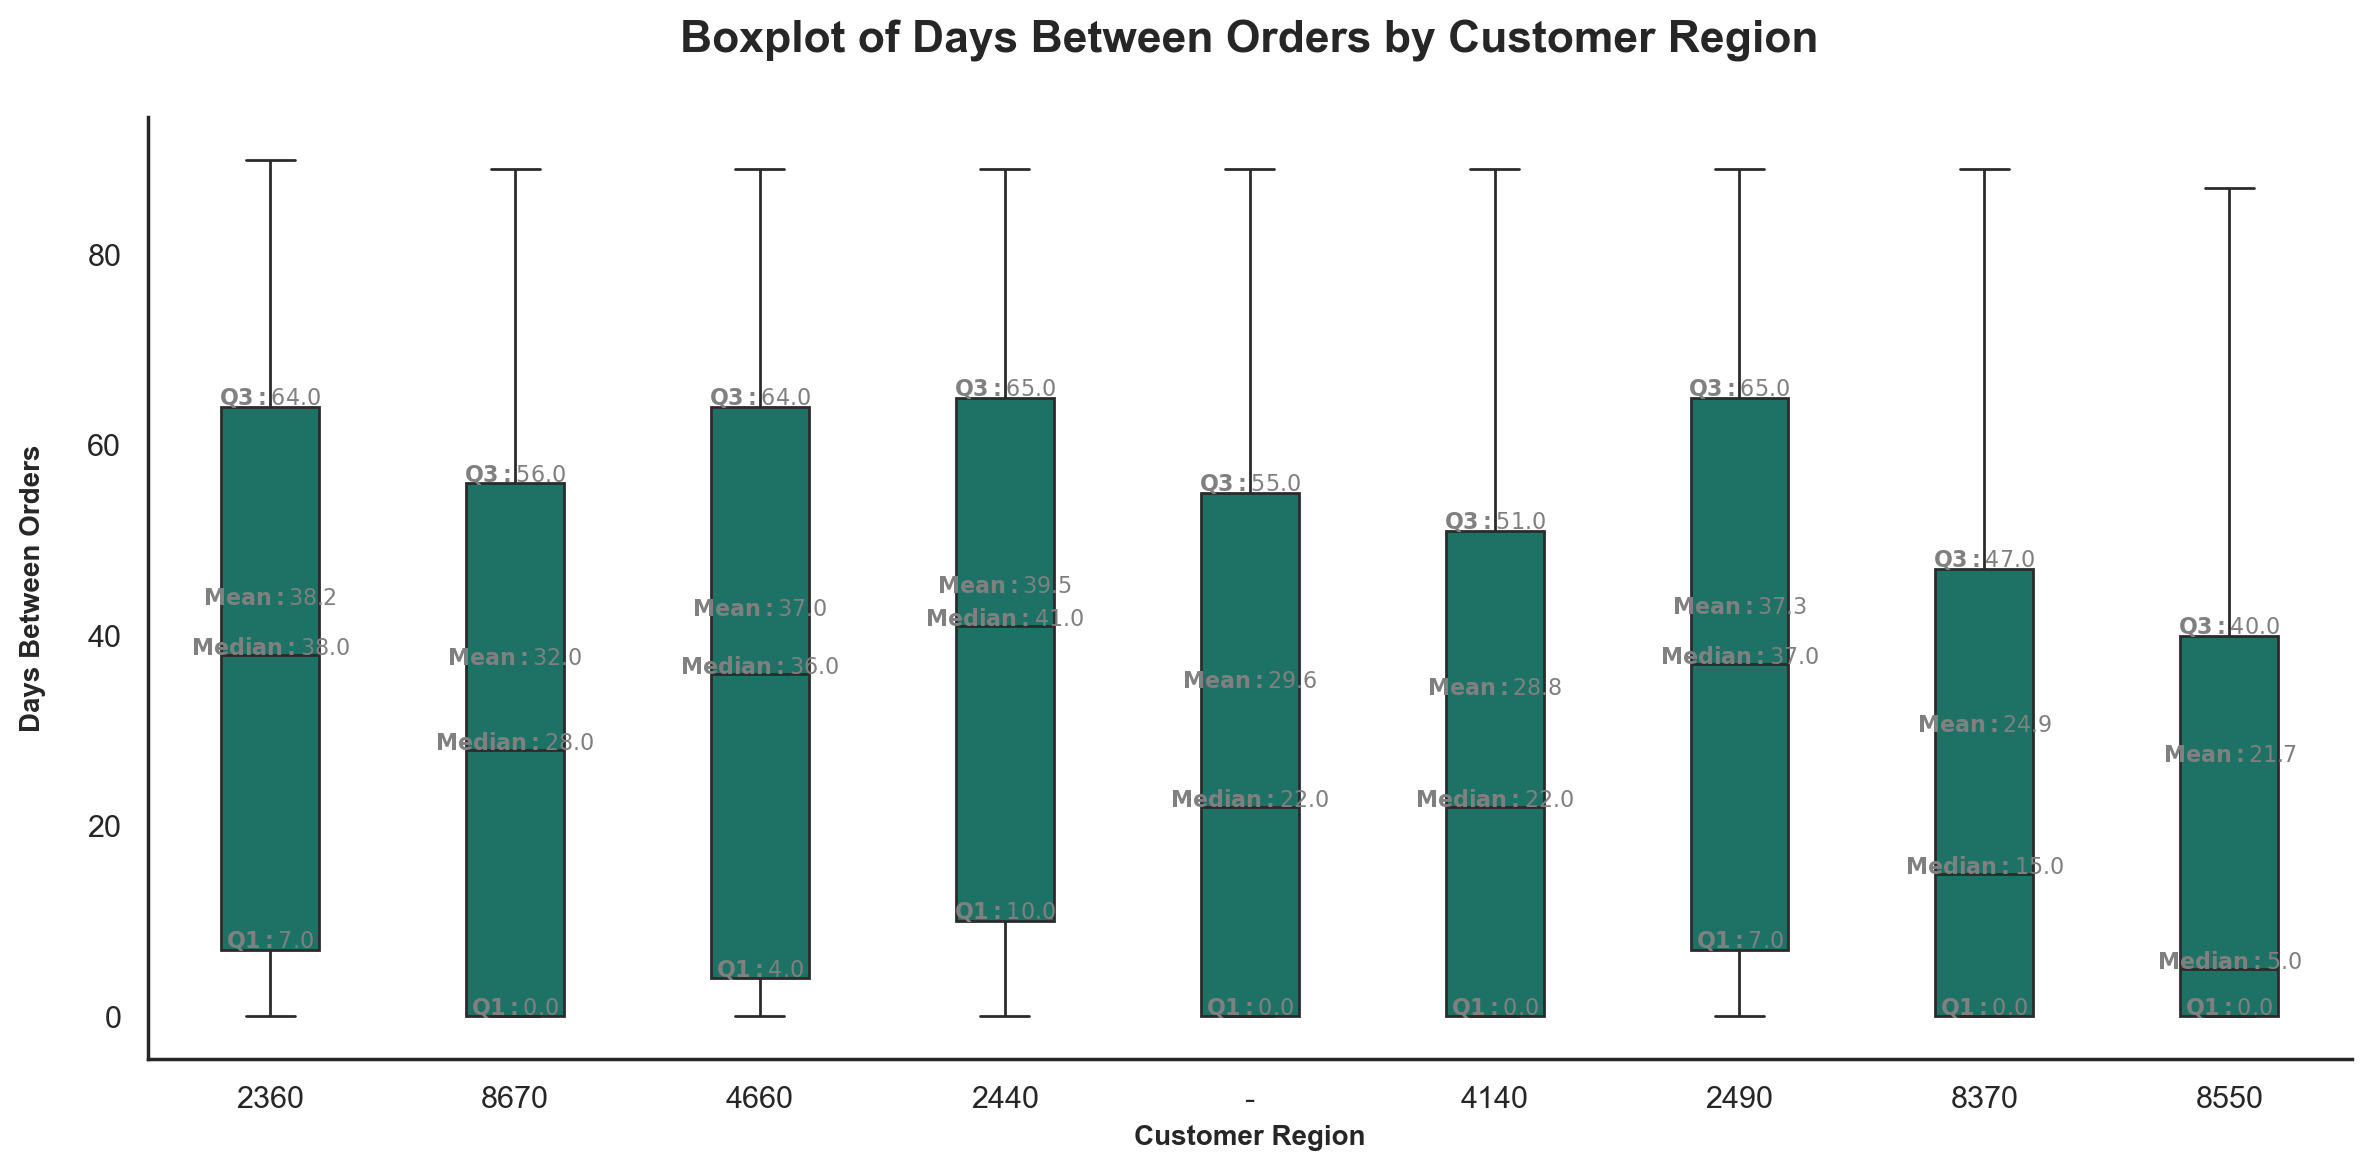

In [194]:
# BoxPlot of the column 'days_between_orders' by 'customer_region'
plt.figure(figsize=(12, 6))
sns.boxplot(data=ABCDEats, x='customer_region', y='days_between_orders', color='#0F806F', width=0.4)
plt.title('Boxplot of Days Between Orders by Customer Region\n', fontweight='bold', fontsize=16)
plt.xlabel('Customer Region', fontweight='bold', fontsize=10)
plt.ylabel('Days Between Orders\n', fontweight='bold', fontsize=10)

# Add mean, median and percentiles to the plot
for region in ABCDEats['customer_region'].unique():
    region_data = ABCDEats[ABCDEats['customer_region'] == region]['days_between_orders']
    
    mean_val = region_data.mean()
    median_val = region_data.median()
    q1_val = region_data.quantile(0.25)
    q3_val = region_data.quantile(0.75)
    
    plt.text(region, mean_val+5, rf'$\mathbf{{Mean:}} {mean_val:.1f}$', color='grey', fontsize=8, ha='center')
    plt.text(region, median_val, rf'$\mathbf{{Median:}} {median_val:.1f}$', color='grey', fontsize=8, ha='center')
    plt.text(region, q1_val+.2, rf'$\mathbf{{Q1:}} {q1_val:.1f}$', color='grey', fontsize=8, ha='center')
    plt.text(region, q3_val+.2, rf'$\mathbf{{Q3:}} {q3_val:.1f}$', color='grey', fontsize=8, ha='center')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


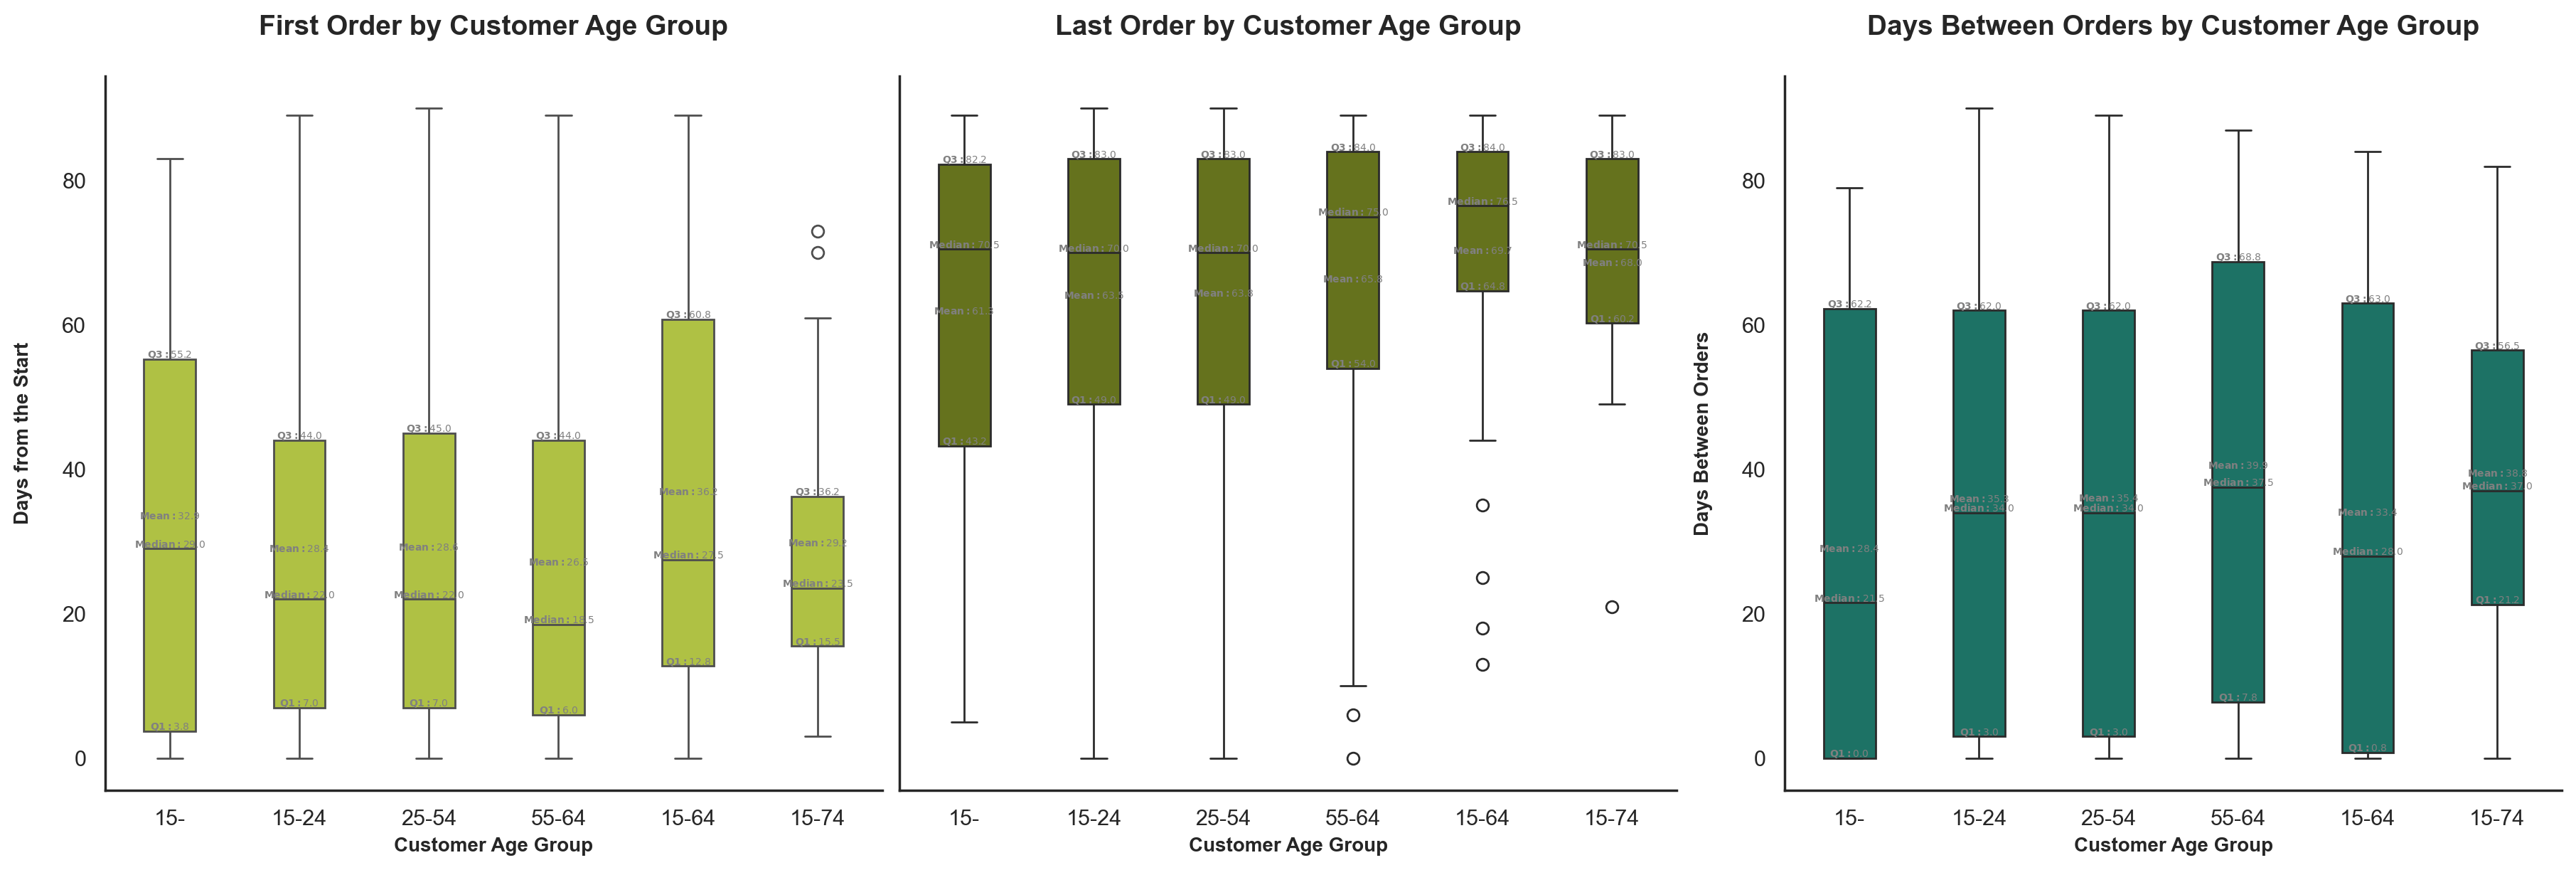

In [196]:
# 3 BoxPlots of the column 'first_order', 'last_order' and 'days_between_orders' by 'customer_age'

# Assumption: Divide the 'customer_age' into 6 groups 15+, 15-24, 25-54, 55-64, 15-64 and 15-74
# Source: (OECD, 2022) https://www.oecd.org/en/data/indicators/employment-rate-by-age-group.html
# Create a new column 'customer_age_group' with the age groups
ABCDEats['customer_age_group'] = pd.cut(ABCDEats['customer_age'], bins=[0, 15, 25, 55, 65, 75, 100],
                                        labels=['15-', '15-24', '25-54', '55-64', '15-64', '15-74'])

# Create subplots for side-by-side boxplots of first_order, last_order and days_between_orders by customer_age_group
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

# Boxplot of 'first_order' by 'customer_age_group'
sns.boxplot(data=ABCDEats, x='customer_age_group', y='first_order', color='#bEd62f', width=0.4, ax=axes[0])
axes[0].set_title('First Order by Customer Age Group\n', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Customer Age Group', fontweight='bold', fontsize=10)
axes[0].set_ylabel('Days from the Start\n', fontweight='bold', fontsize=10)

# Boxplot of 'last_order' by 'customer_age_group'
sns.boxplot(data=ABCDEats, x='customer_age_group', y='last_order', color='#6f800f', width=0.4, ax=axes[1])
axes[1].set_title('Last Order by Customer Age Group\n', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Customer Age Group', fontweight='bold', fontsize=10)
axes[1].set_ylabel('')  # Remove y-axis label to avoid repetition
axes[1].yaxis.set_visible(False)  # Hide y-axis on the second plot for clarity

# Boxplot of 'days_between_orders' by 'customer_age_group'
sns.boxplot(data=ABCDEats, x='customer_age_group', y='days_between_orders', color='#0F806F', width=0.4, ax=axes[2])
axes[2].set_title('Days Between Orders by Customer Age Group\n', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Customer Age Group', fontweight='bold', fontsize=10)
axes[2].set_ylabel('Days Between Orders\n', fontweight='bold', fontsize=10)

# Calculate and annotate statistics (mean, median, Q1, Q3) on each plot
for i, col in enumerate(['first_order', 'last_order', 'days_between_orders']):
    for age_group in ABCDEats['customer_age_group'].unique():
        age_group_data = ABCDEats[ABCDEats['customer_age_group'] == age_group][col]
        
        # Calculate statistics
        mean_val = age_group_data.mean()
        median_val = age_group_data.median()
        q1_val = age_group_data.quantile(0.25)
        q3_val = age_group_data.quantile(0.75)

        # Position text annotations at appropriate spots
        axes[i].text(x=age_group, y=mean_val+.2, s=rf'$\mathbf{{Mean:}} {mean_val:.1f}$', color='grey', fontsize=5, ha='center')
        axes[i].text(x=age_group, y=median_val+.2, s=rf'$\mathbf{{Median:}} {median_val:.1f}$', color='grey', fontsize=5, ha='center')
        axes[i].text(x=age_group, y=q1_val+.2, s=rf'$\mathbf{{Q1:}} {q1_val:.1f}$', color='grey', fontsize=5, ha='center')
        axes[i].text(x=age_group, y=q3_val+.2, s=rf'$\mathbf{{Q3:}} {q3_val:.1f}$', color='grey', fontsize=5, ha='center')
        
sns.despine(top=True, right=True)
plt.show()

In [197]:
# Check the variable 'customer_age_group'
ABCDEats['customer_age_group'].value_counts()

customer_age_group
25-54    16304
15-24    14665
55-64      113
15-64       32
15-         20
15-74       14
Name: count, dtype: int64

<div class="alert alert-block alert-danger" style="font-size: 50px; font-weight: bold;">
    Queremos fazer isto já?
</div>

---

#### `last_promo`

In [199]:
# Unique values of the column 'last_promo'
print(ABCDEats['last_promo'].unique())

['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']


> The column `last_promo` has a value represented by `-` which is a 'NO PROMO'! (Assumption)

In [200]:
# Absolute and Relative Frequency Table of the column 'last_promo'
last_promo_n_freq = ABCDEats['last_promo'].value_counts().reset_index()
last_promo_n_freq.columns = ['last_promo', 'n']
last_promo_n_freq['%'] = round(last_promo_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
last_promo_n_freq.set_index('last_promo', inplace=True)
pd.DataFrame(last_promo_n_freq.sort_values(by='n', ascending=False))

n     %
last_promo             
-           16744 52.53
DELIVERY     6282 19.71
DISCOUNT     4496 14.11
FREEBIE      4353 13.66

In [201]:
# Replace the value '-' by 'NO PROMO'
ABCDEats['last_promo'] = ABCDEats['last_promo'].replace('-', 'NO PROMO')  ################################# QUEREM JÁ FAZER AQUI?

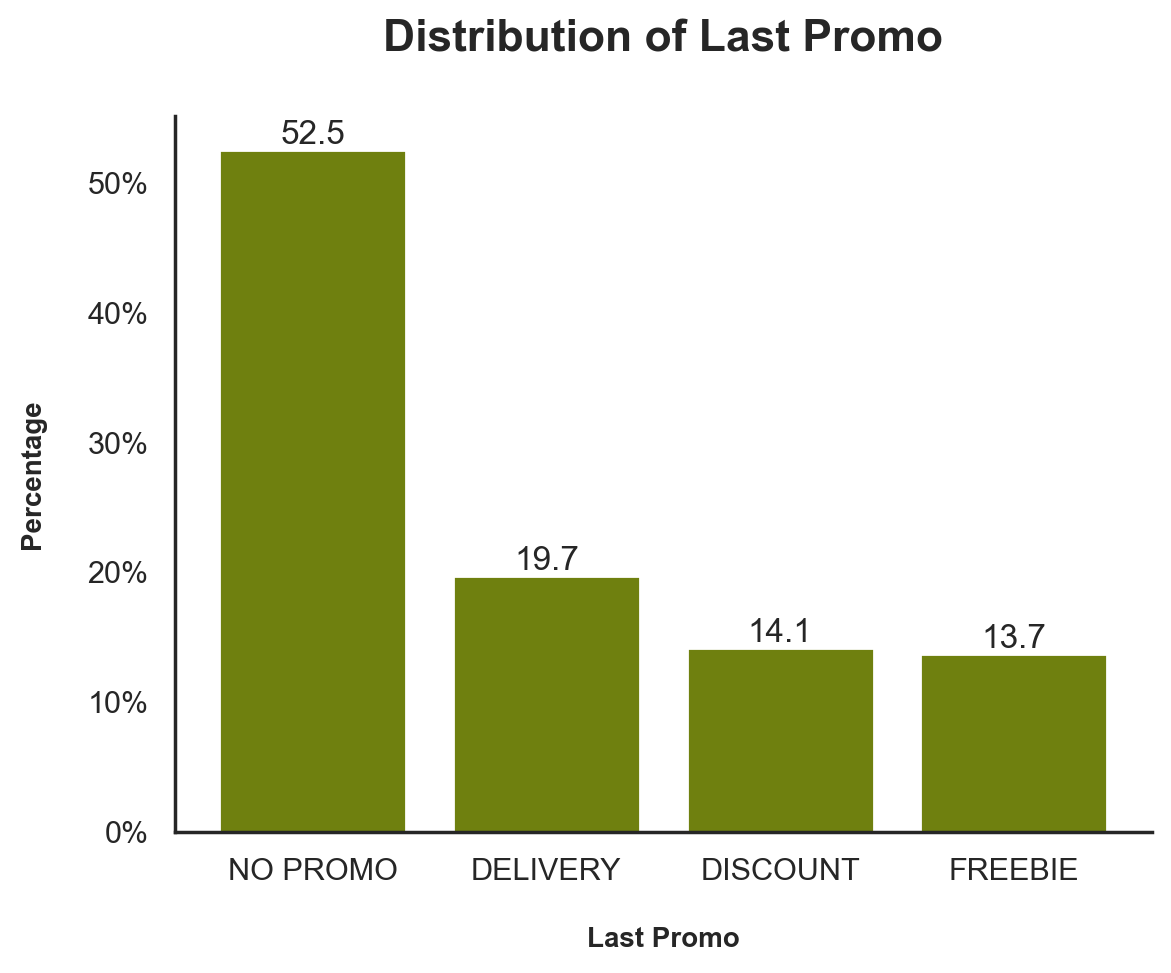

In [205]:
# Barplot representing the distribution of the 'last_promo'
plt.figure(figsize=(6, 5))
plt.bar(ABCDEats['last_promo'].value_counts(normalize=True).index,
        ABCDEats['last_promo'].value_counts(normalize=True),
        color='#6f800f')
plt.title('Distribution of Last Promo\n', fontsize=16, fontweight='bold')
plt.xlabel('\nLast Promo', fontsize=10, fontweight='bold')
plt.ylabel('Percentage\n', fontsize=10, fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Display the percentage on the top of each bar
for i in range(len(ABCDEats['last_promo'].value_counts(normalize=True))):
    value = ABCDEats['last_promo'].value_counts(normalize=True).iloc[i]
    plt.text(i, value+0.005, f'{value*100:.1f}', ha='center', fontsize=12)
    
sns.despine(top=True, right=True)
plt.tight_layout()

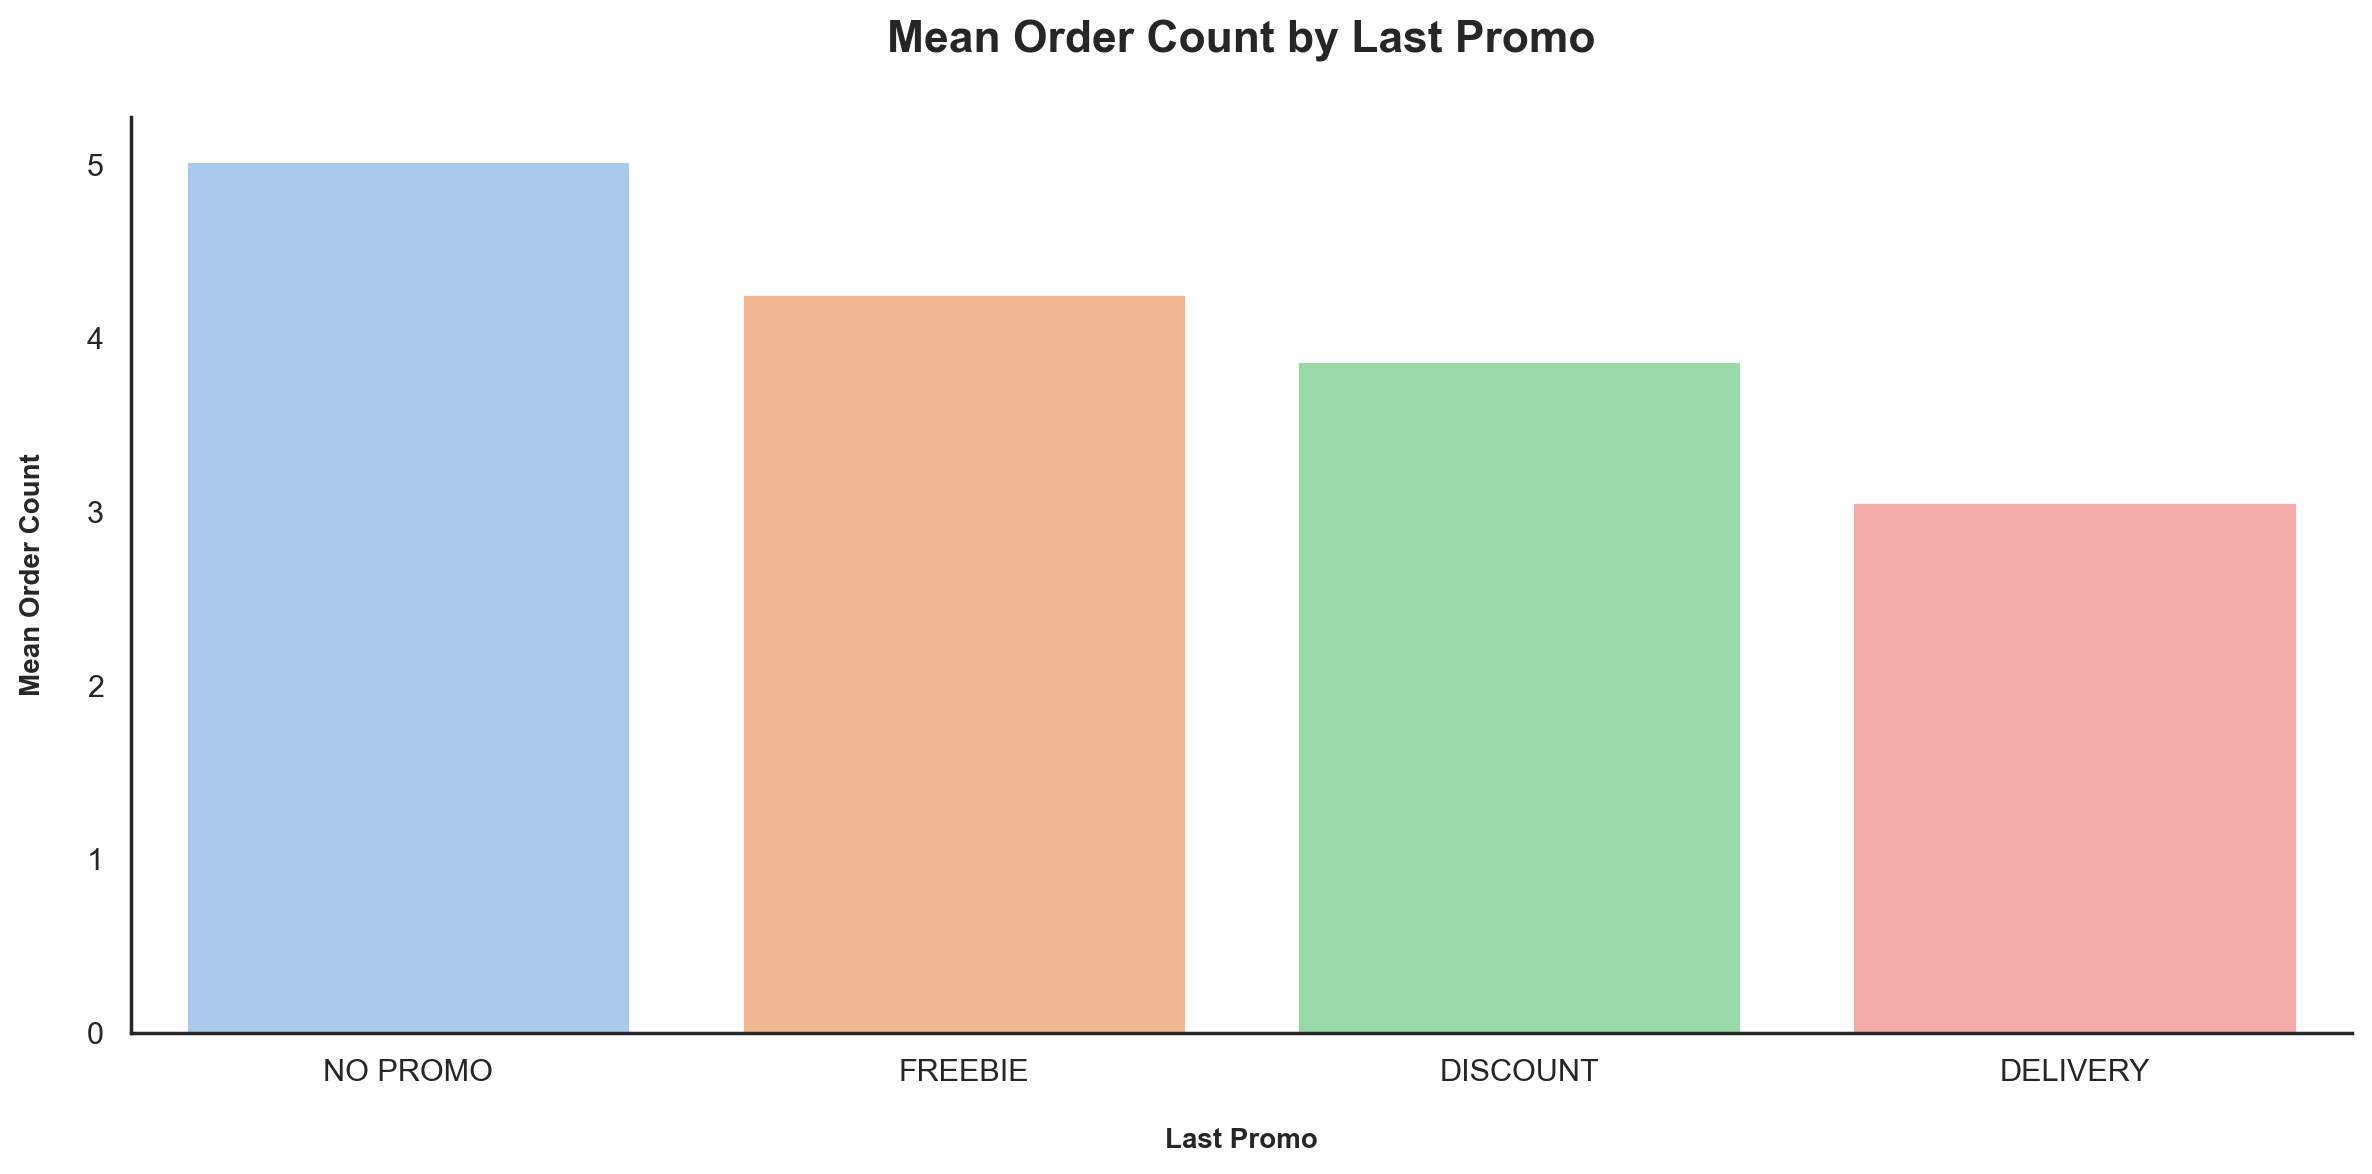

In [222]:
# BarPlot of mean the 'order_count' by 'last_promo'
plt.figure(figsize=(12, 6))

# Mean of 'order_count' by 'last_promo'
mean_order_count = ABCDEats.groupby('last_promo')['order_count'].mean().sort_values(ascending=False)
sns.barplot(data=mean_order_count.reset_index(), x='last_promo', y='order_count', hue='last_promo', palette='pastel')
plt.title('Mean Order Count by Last Promo\n', fontweight='bold', fontsize=16)
plt.xlabel('\nLast Promo', fontweight='bold', fontsize=10)
plt.ylabel('Mean Order Count\n', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()

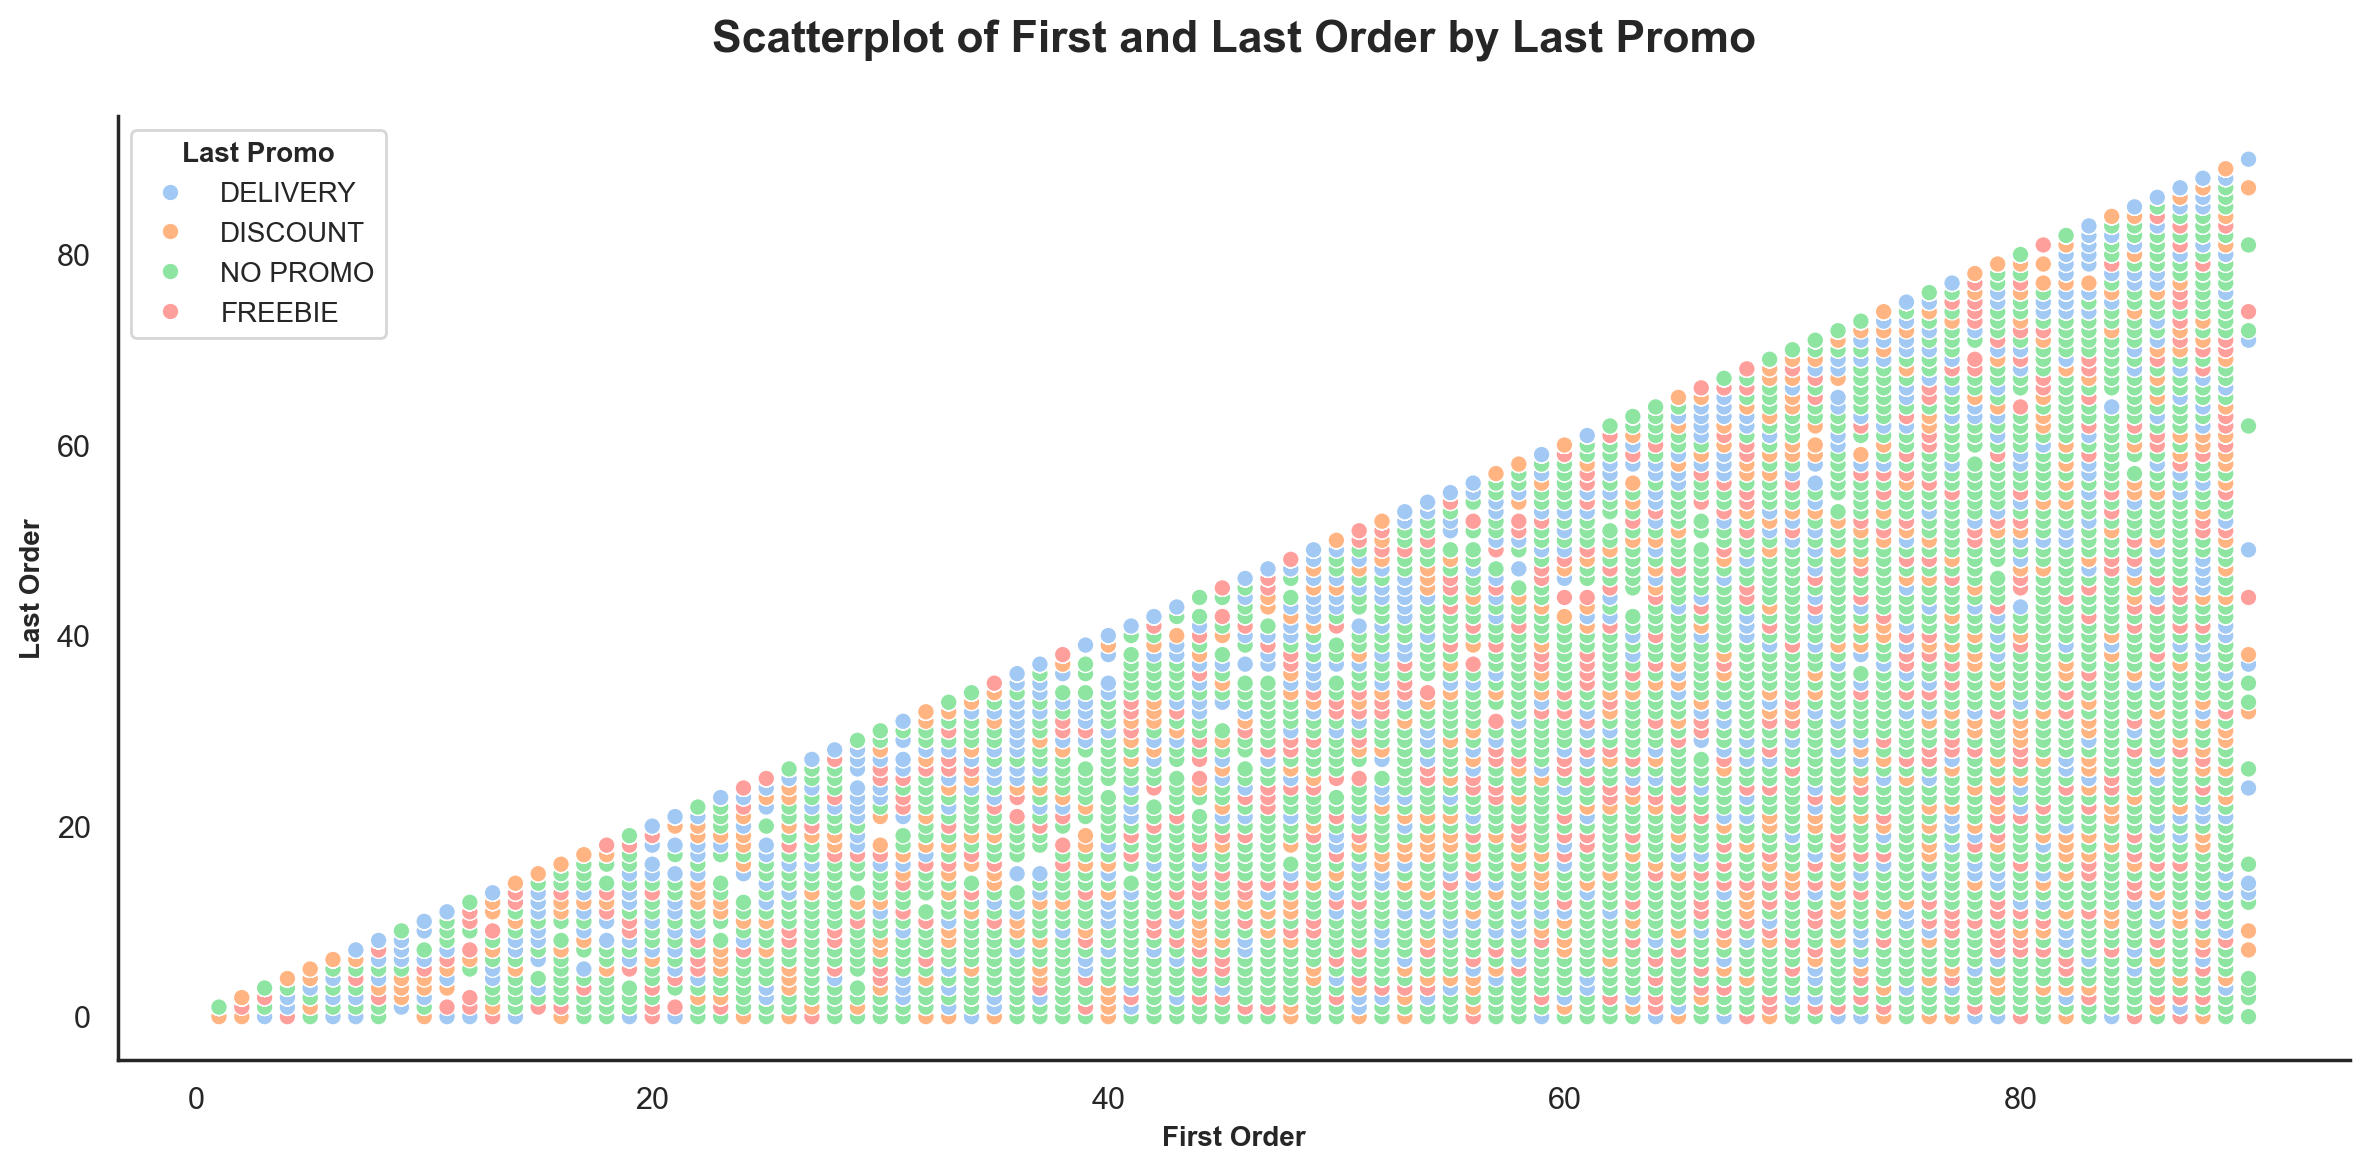

In [209]:
# Scatterplot of 'first_order' and 'last_order' by 'last_promo'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ABCDEats, x='last_order', y='first_order', hue='last_promo', palette='pastel')
plt.title('Scatterplot of First and Last Order by Last Promo\n', fontweight='bold', fontsize=16)
plt.xlabel('First Order', fontweight='bold', fontsize=10)
plt.ylabel('Last Order', fontweight='bold', fontsize=10)
plt.legend(title='Last Promo', fontsize=10, loc='upper left', title_fontproperties={'size':10,'weight':'bold'})
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

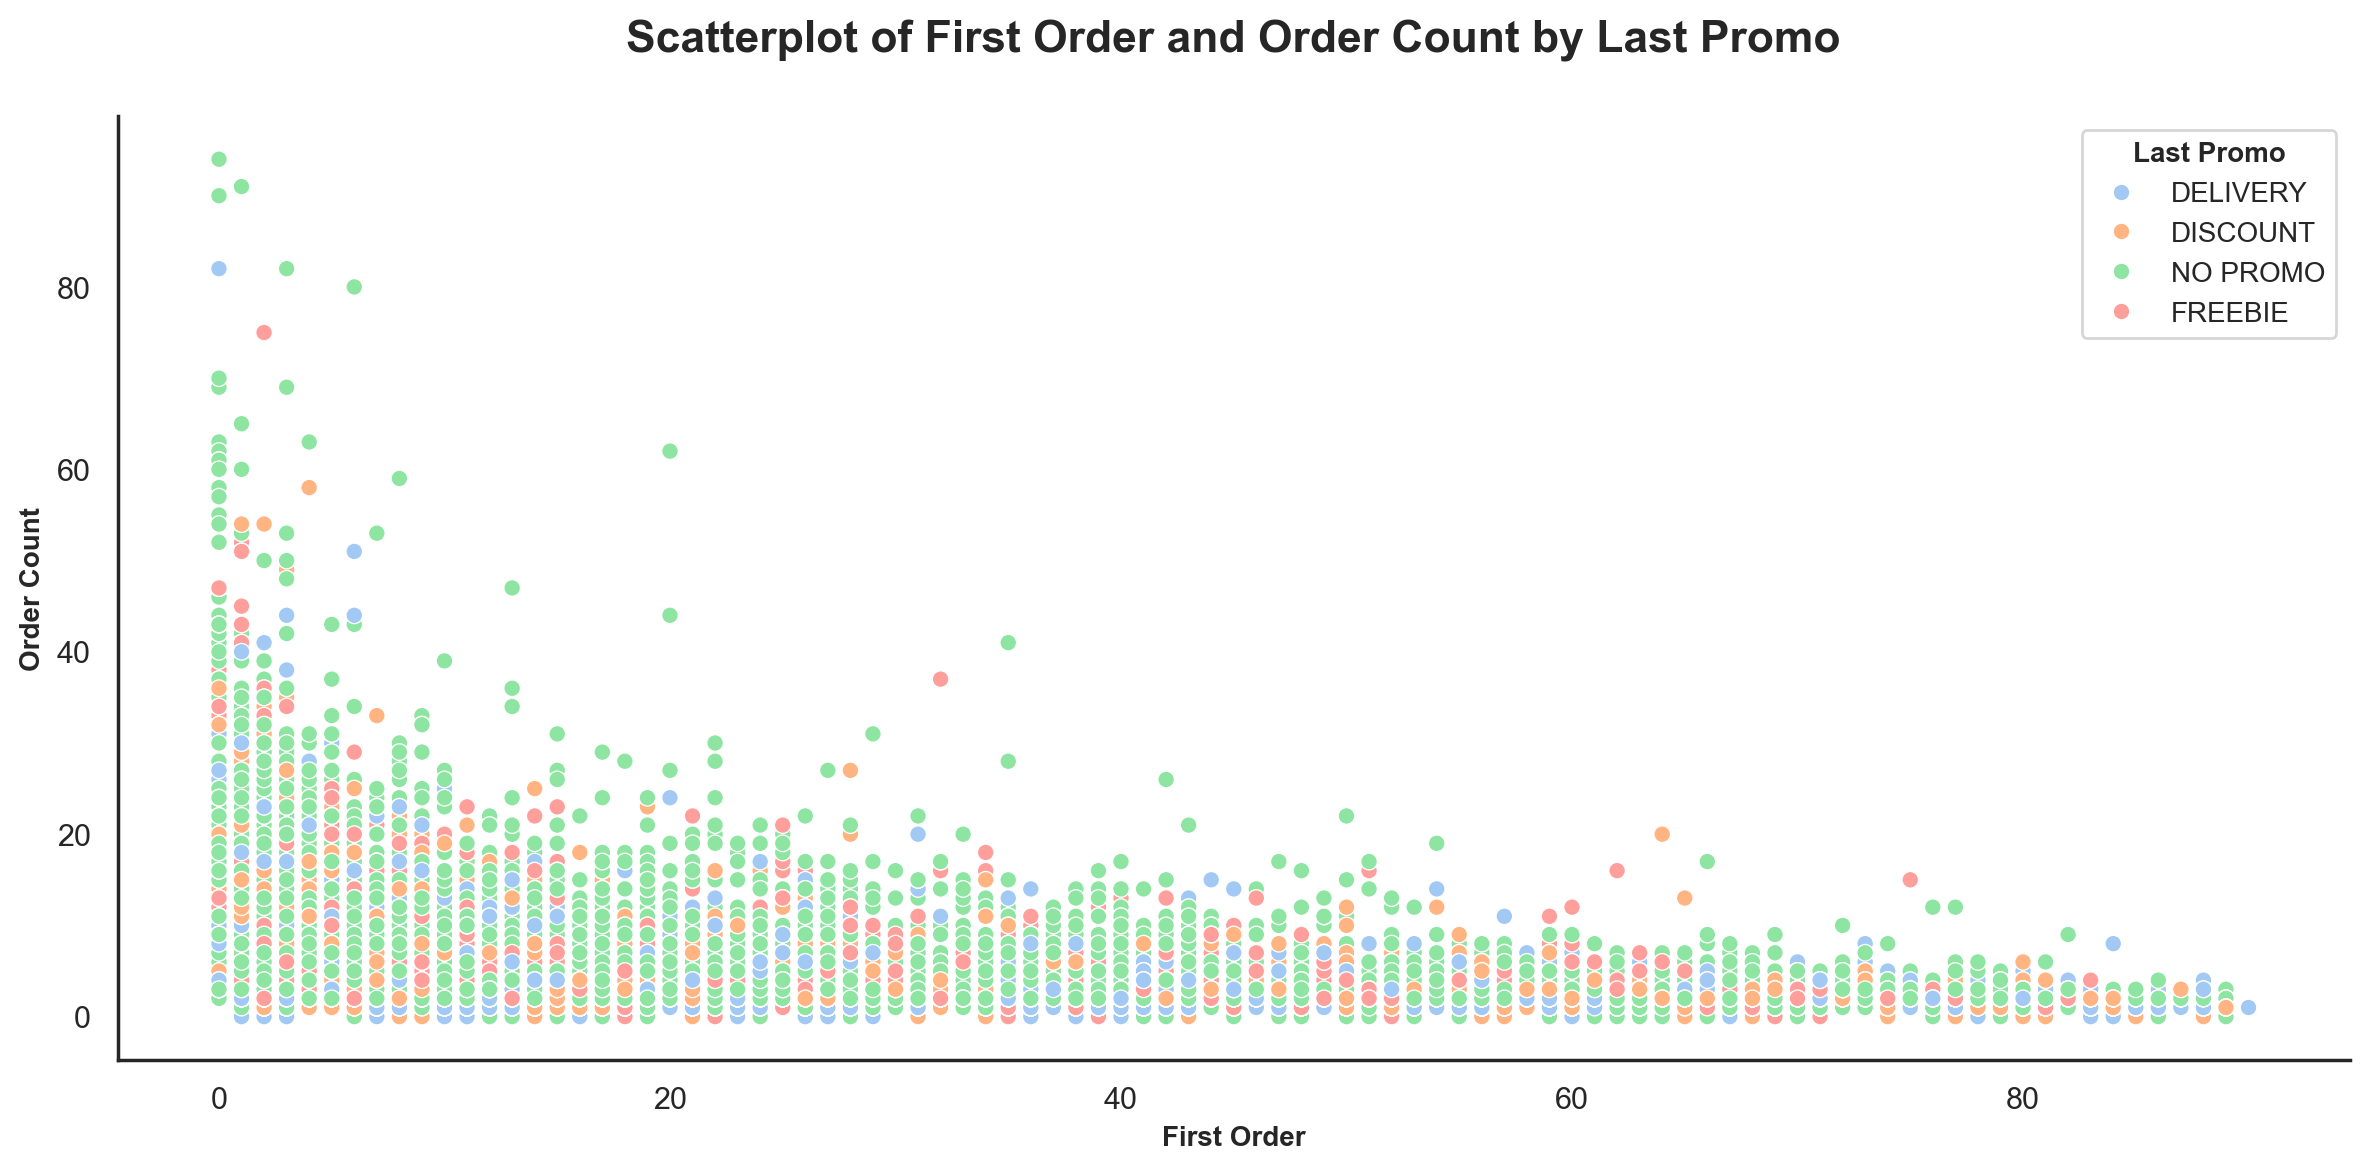

In [211]:
# Scatterplot of 'first_order' and 'order_count' by 'last_promo'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ABCDEats, x='first_order', y='order_count', hue='last_promo', palette='pastel')
plt.title('Scatterplot of First Order and Order Count by Last Promo\n', fontweight='bold', fontsize=16)
plt.xlabel('First Order', fontweight='bold', fontsize=10)
plt.ylabel('Order Count', fontweight='bold', fontsize=10)
plt.legend(title='Last Promo', fontsize=10, loc='upper right', title_fontproperties={'size':10,'weight':'bold'})
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

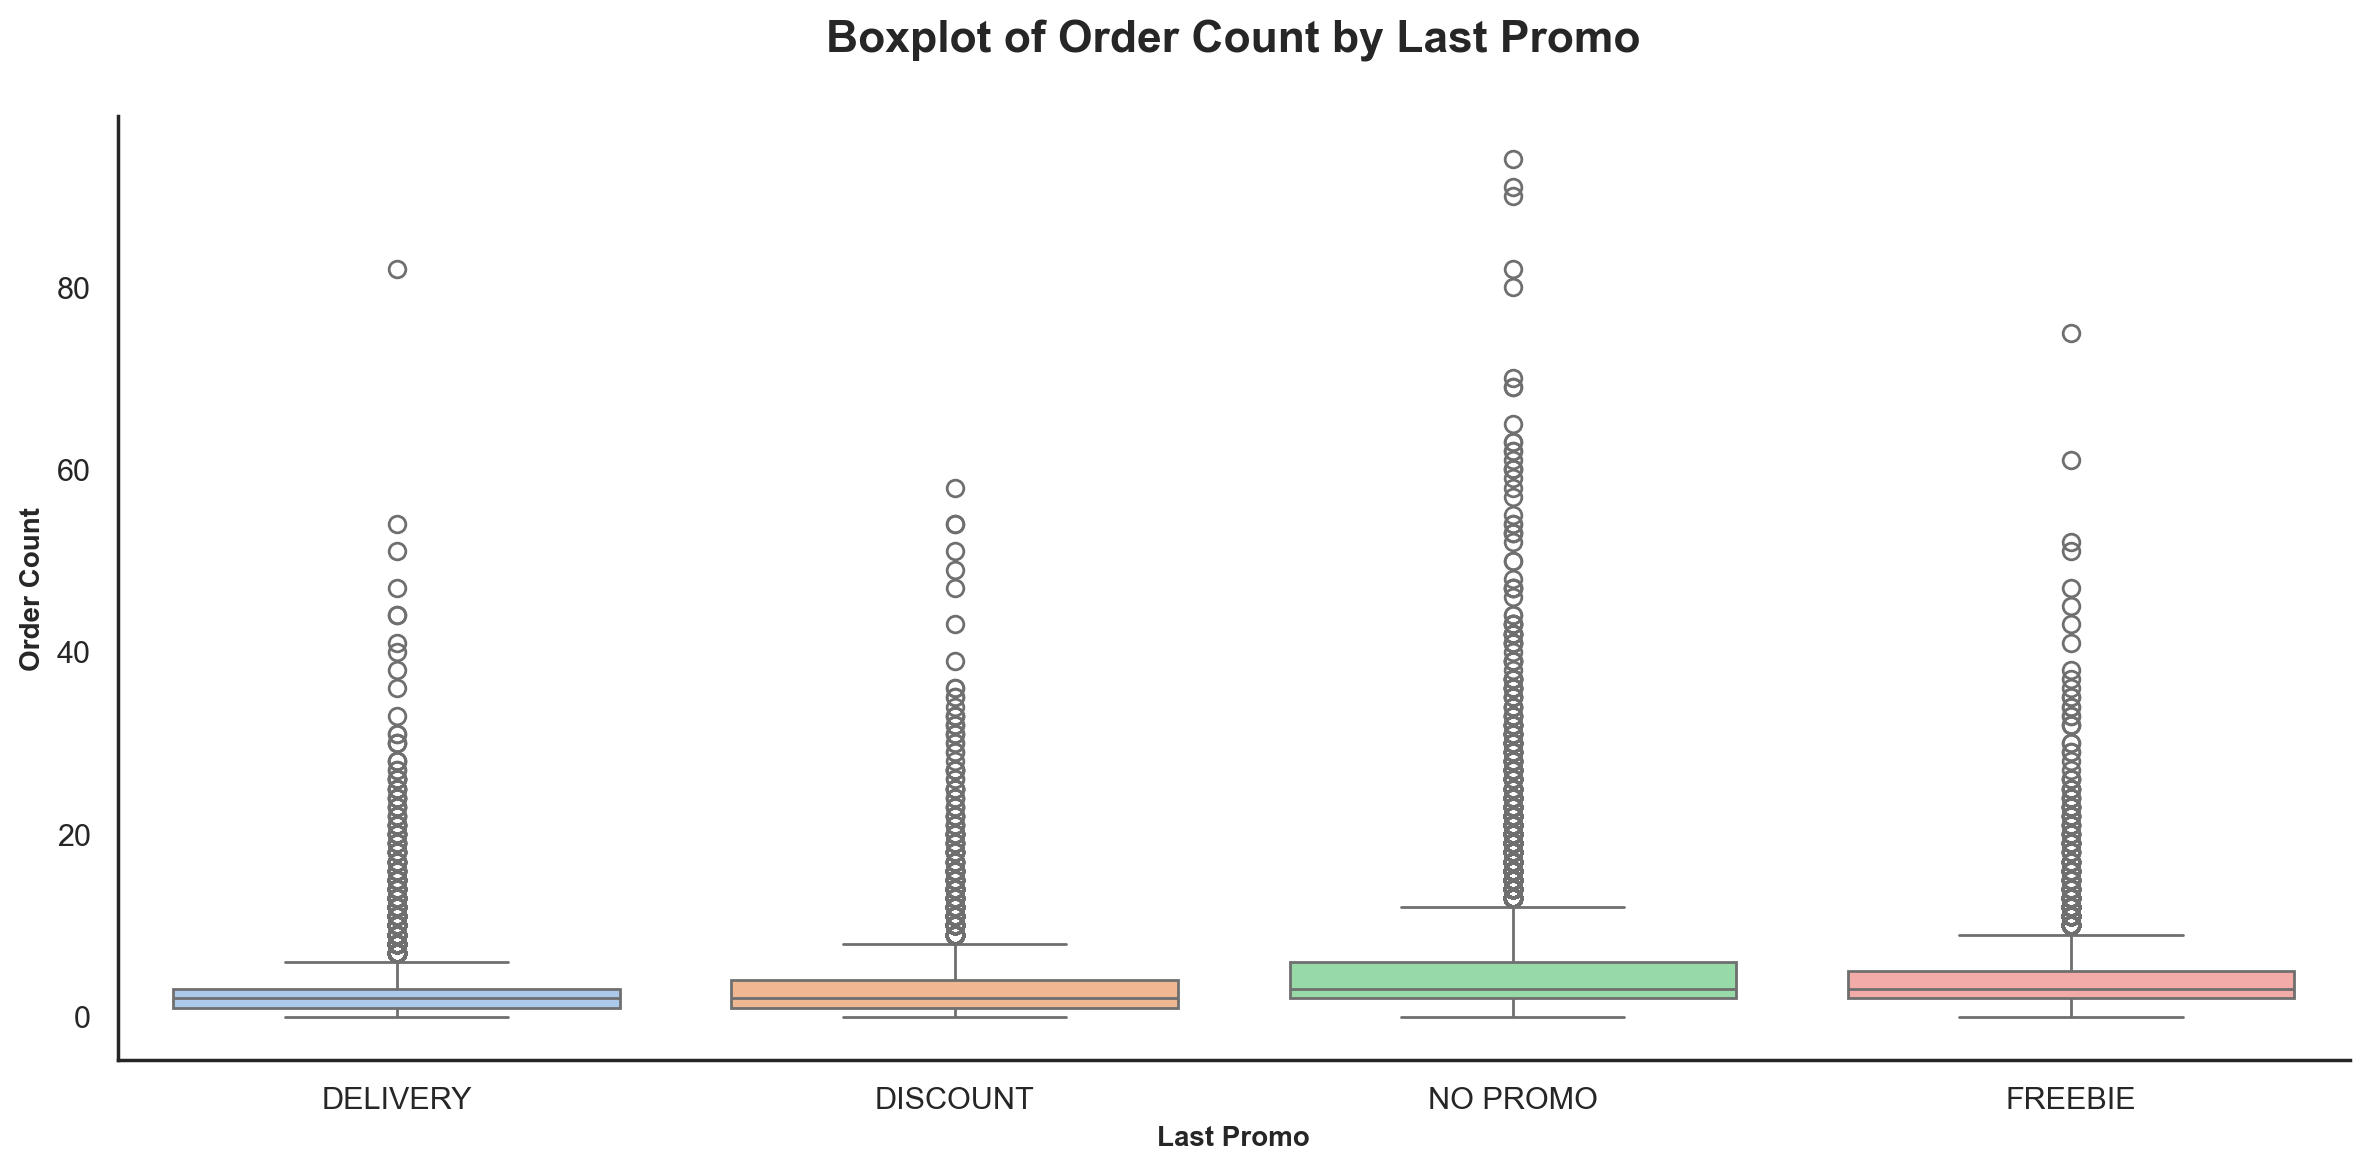

In [215]:
# Boxplot of 'order_count' by 'last_promo'
plt.figure(figsize=(12, 6))
sns.boxplot(data=ABCDEats, x='last_promo', y='order_count', hue= 'last_promo', palette='pastel')
plt.title('Boxplot of Order Count by Last Promo\n', fontweight='bold', fontsize=16)
plt.xlabel('Last Promo', fontweight='bold', fontsize=10)
plt.ylabel('Order Count', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

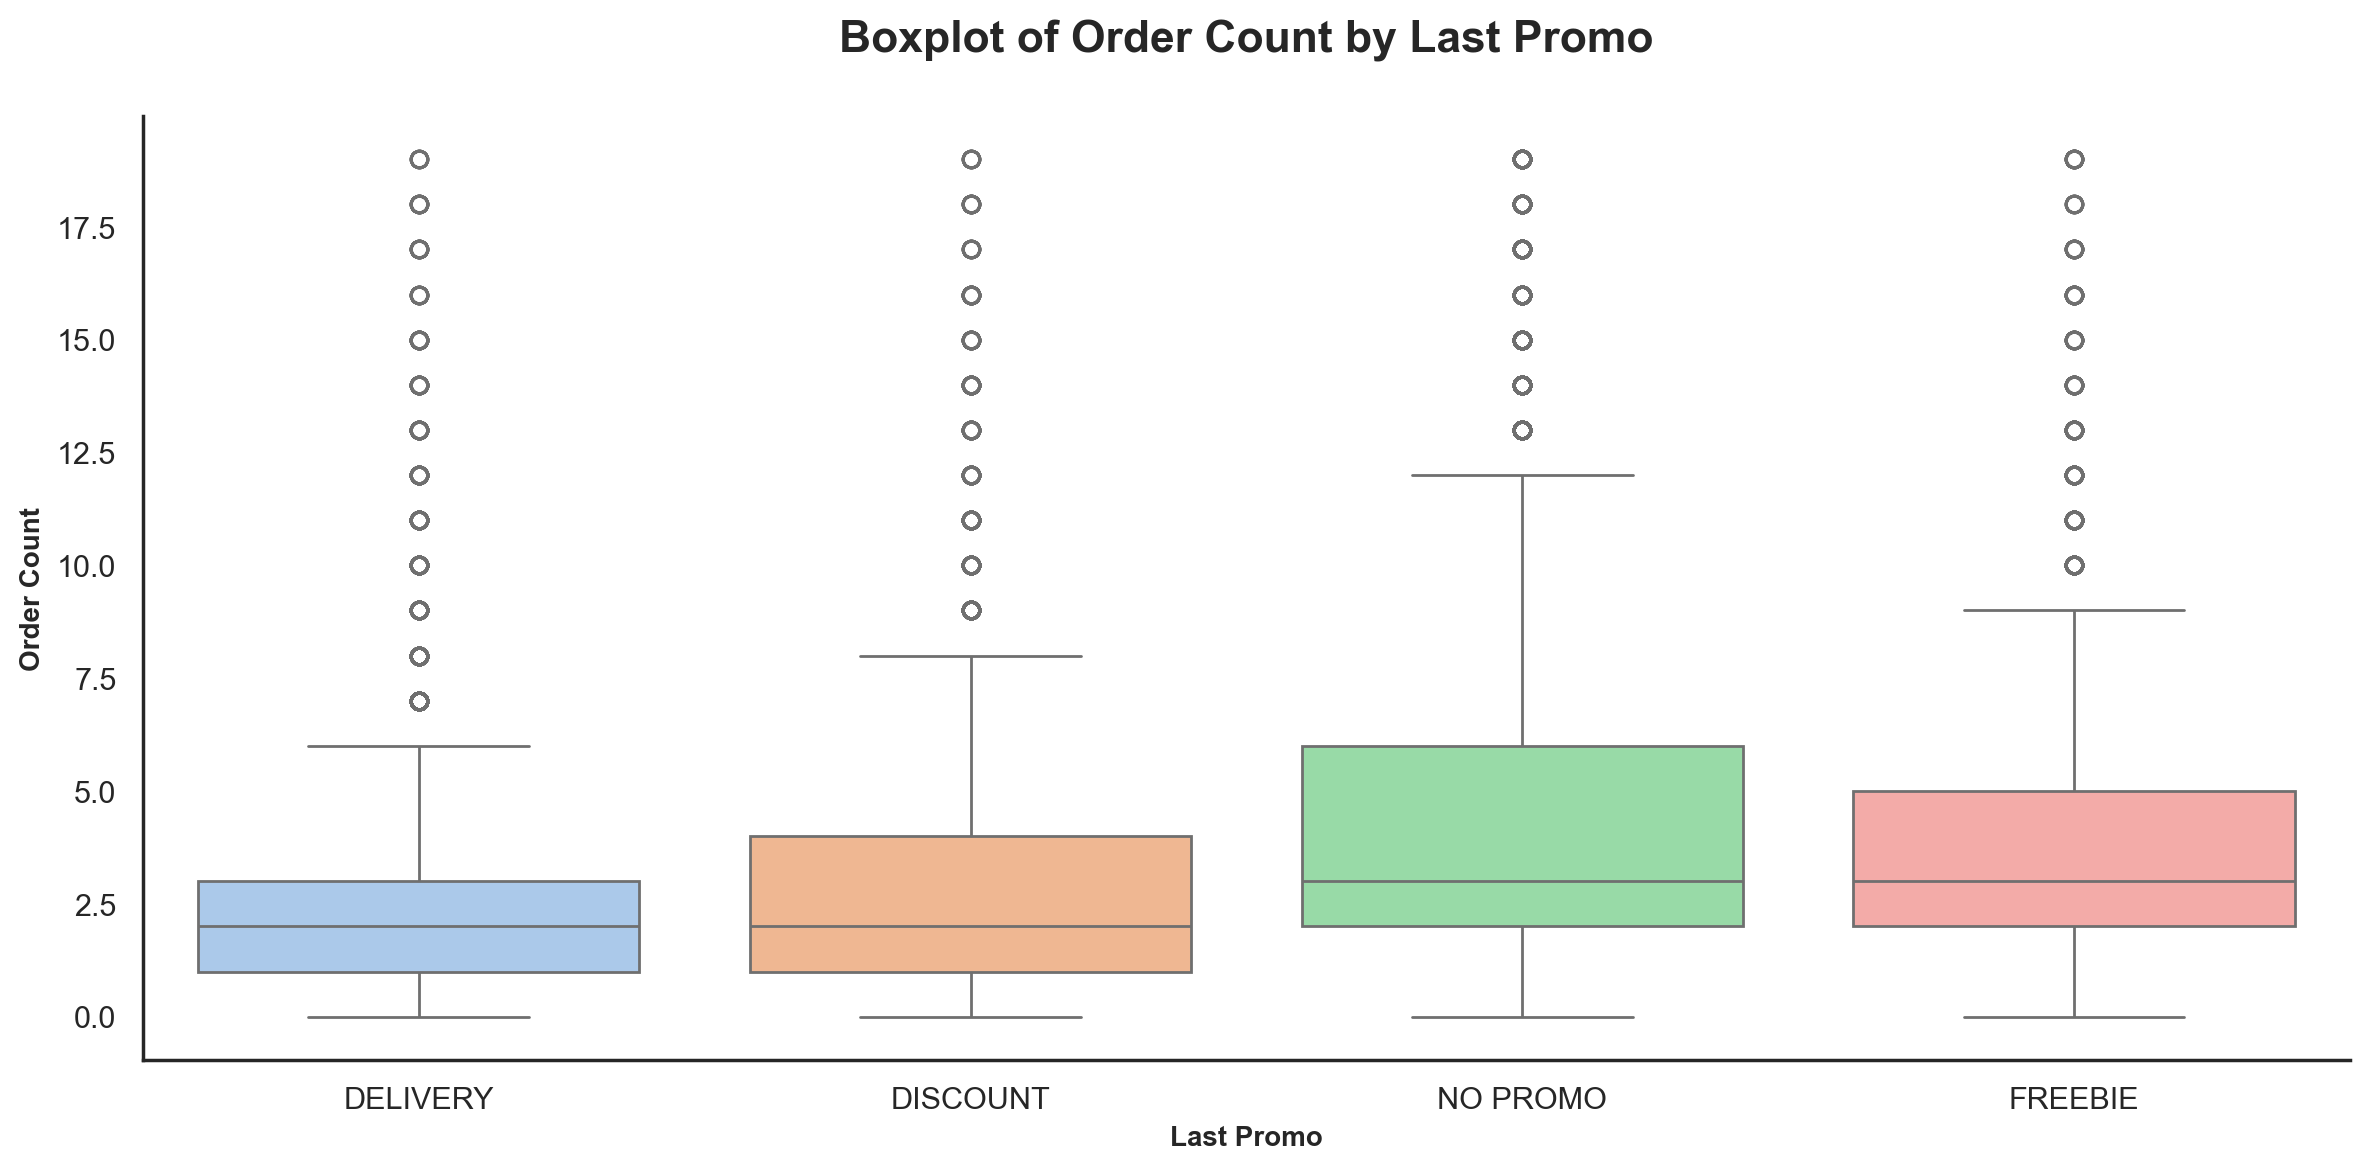

In [216]:
# Boxplot of 'order_count' by 'last_promo' with 'order_count' < 20
plt.figure(figsize=(12, 6))
sns.boxplot(data=ABCDEats[ABCDEats['order_count'] < 20], 
            x='last_promo', y='order_count', hue= 'last_promo', palette='pastel')
plt.title('Boxplot of Order Count by Last Promo\n', fontweight='bold', fontsize=16)
plt.xlabel('Last Promo', fontweight='bold', fontsize=10)
plt.ylabel('Order Count', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

---

#### `payment_method`

In [62]:
# Unique values of the column 'payment_method'
ABCDEats['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

In [63]:
# Absolute and Relative Frequency Table of the column 'payment_method'
payment_method_n_freq = ABCDEats['payment_method'].value_counts().reset_index()
payment_method_n_freq.columns = ['payment_method', 'n']
payment_method_n_freq['%'] = round(payment_method_n_freq['n'] / ABCDEats.shape[0] * 100, 2)
payment_method_n_freq.set_index('payment_method', inplace=True)
pd.DataFrame(payment_method_n_freq.sort_values(by='n', ascending=False))

n     %
payment_method             
CARD            20153 63.23
DIGI             6098 19.13
CASH             5624 17.64

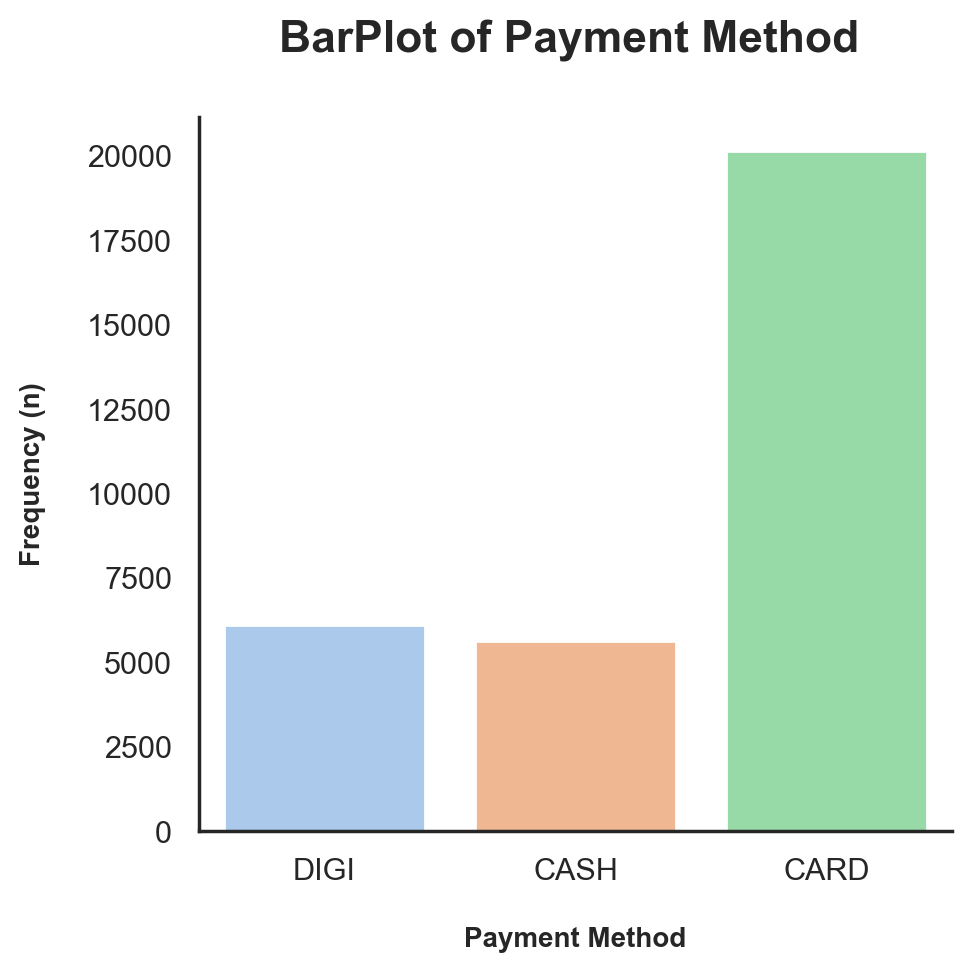

In [64]:
# Plot the absolute frequency of the column 'payment_method'
plt.figure(figsize=(5, 5))
sns.countplot(data=ABCDEats, x='payment_method', hue='payment_method', palette='pastel')
plt.title('BarPlot of Payment Method \n', fontweight='bold', fontsize=16)
plt.xlabel('\nPayment Method', fontweight='bold', fontsize=10)
plt.ylabel('Frequency (n)\n', fontweight='bold', fontsize=10)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

#### `CUI_American`, `CUI_Asian`, `CUI_Chinese`, `CUI_Italian`, etc.

In [65]:
# Unique values of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc.
cuisines = [col for col in ABCDEats.columns if 'CUI_' in col]
cuisines

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai']

In [66]:
# Statistics of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc. with Monetary Units > 0
round(ABCDEats[cuisines][ABCDEats[cuisines] > 0].describe().T, 2)

count  mean   std  min  25%   50%   75%    max
CUI_American             10791.00 14.41 16.23 0.41 5.45  9.31 18.21 280.21
CUI_Asian                11896.00 26.67 32.27 0.44 8.18 17.98 31.32 896.71
CUI_Beverages             5431.00 13.49 16.45 0.32 4.80  7.69 17.58 229.22
CUI_Cafe                  1366.00 18.70 25.10 0.66 6.69 11.36 20.36 326.10
CUI_Chicken Dishes        3248.00  7.54  8.96 0.34 2.80  5.28  9.32 219.66
CUI_Chinese               3522.00 12.96 21.41 0.44 4.29  7.46 15.56 739.73
CUI_Desserts              2016.00 13.99 15.95 0.41 5.68 11.30 18.30 230.07
CUI_Healthy               2169.00 13.97 17.83 0.43 5.26  8.56 16.88 255.81
CUI_Indian                3448.00 15.09 17.59 0.46 5.58 10.18 17.72 309.07
CUI_Italian               6448.00 15.99 20.54 0.34 4.98 10.26 19.28 468.33
CUI_Japanese              6300.00 15.16 18.45 0.43 5.90 11.15 18.46 706.14
CUI_Noodle Dishes         2226.00 10.19 14.08 0.37 3.08  6.04 11.80 275.11
CUI_OTHER                 7041.00 13.59 16.98 0.36 4.72  8.67 16.05 366.08
CUI_Street Food / Snacks  4244.00 29.37 32.68 0.44 8.75 18.94 37.15 454.45
CUI_Thai                  2378.00 11.29 12.07 0.50 4.80  7.68 13.49 136.38

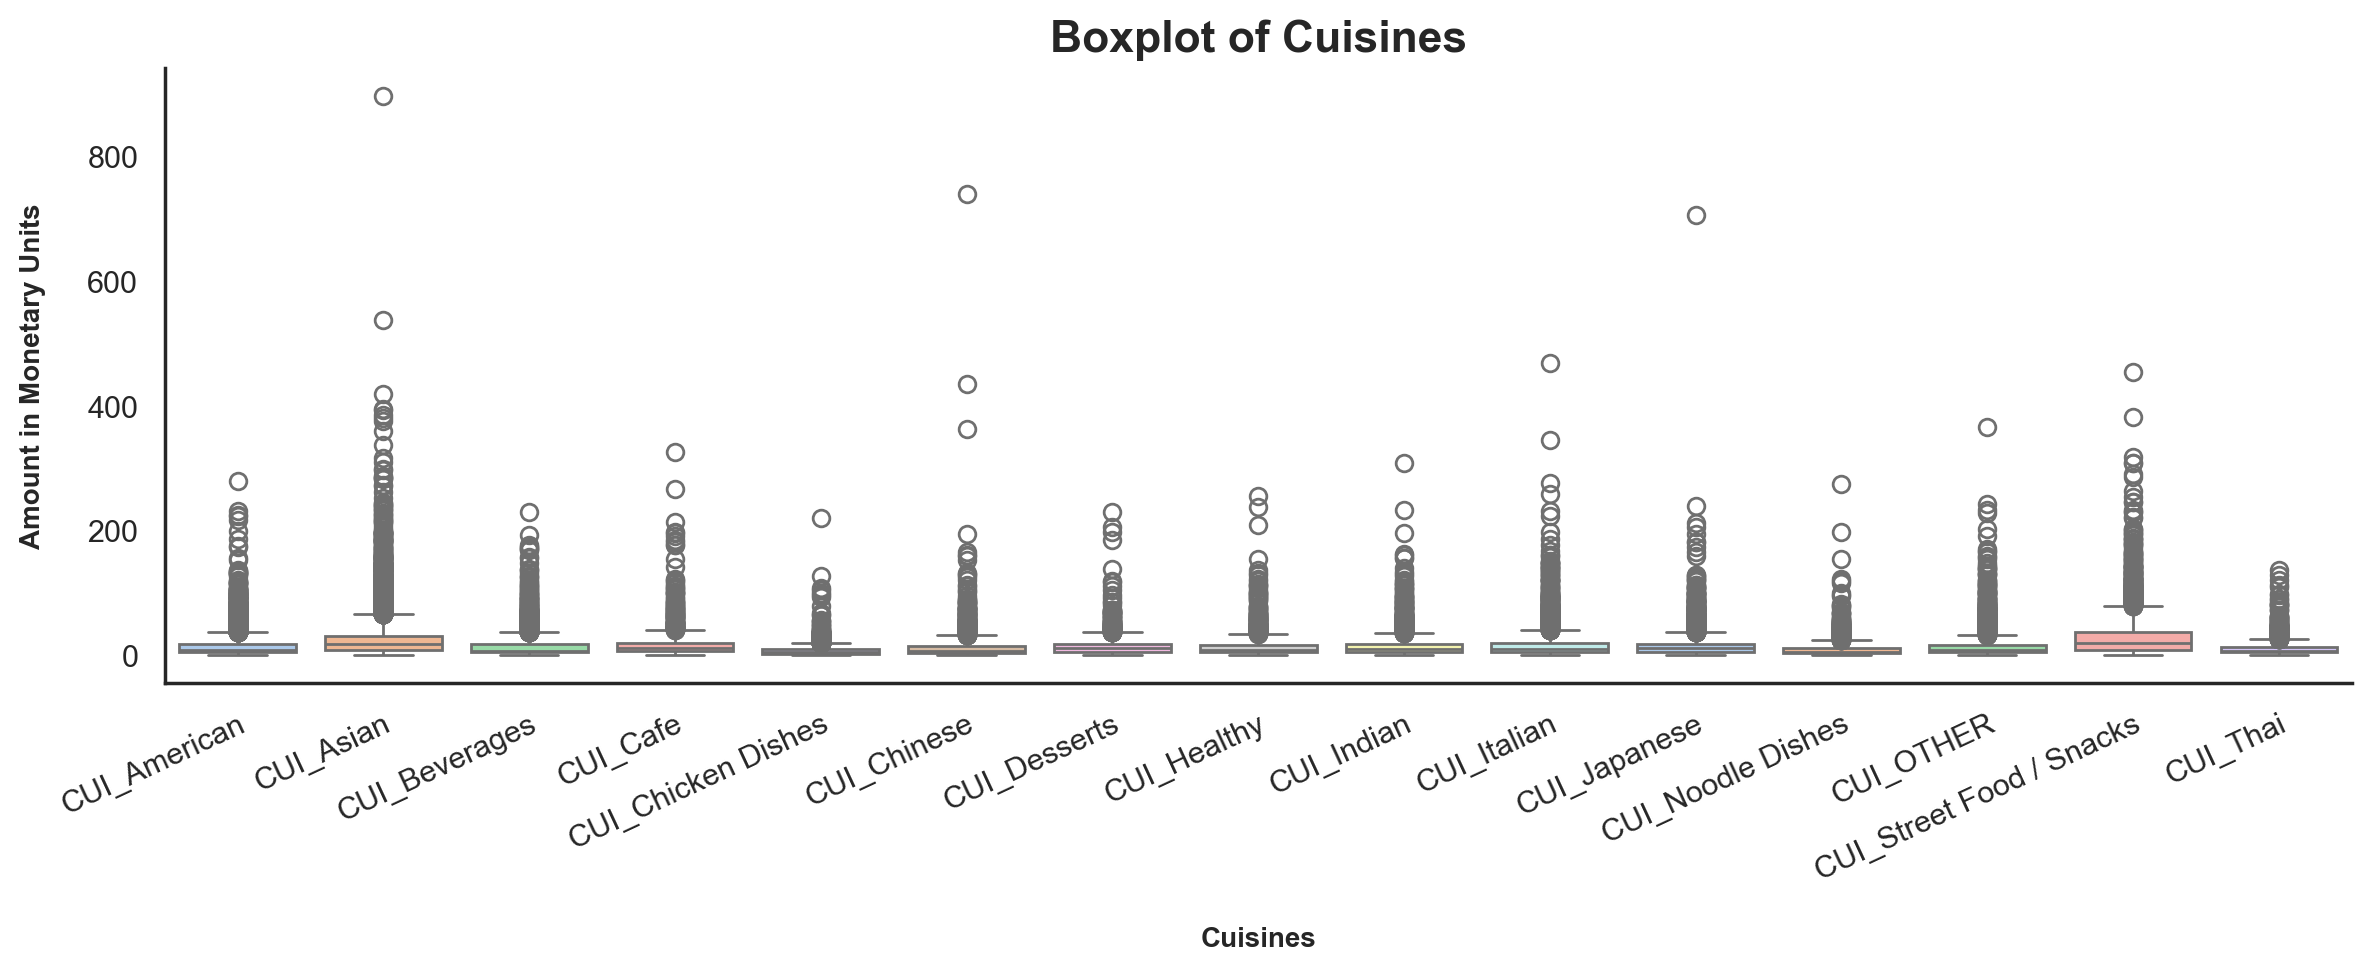

In [67]:
# Boxplot of the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc. with values > 0
plt.figure(figsize=(12, 5))
sns.boxplot(data=ABCDEats[cuisines][ABCDEats[cuisines] > 0], palette='pastel')
plt.title('Boxplot of Cuisines', fontweight='bold', fontsize=16)
plt.xlabel('\nCuisines', fontweight='bold', fontsize=10)
plt.ylabel('Amount in Monetary Units\n', fontweight='bold', fontsize=10)
plt.xticks(rotation=25, ha='right', rotation_mode='anchor')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

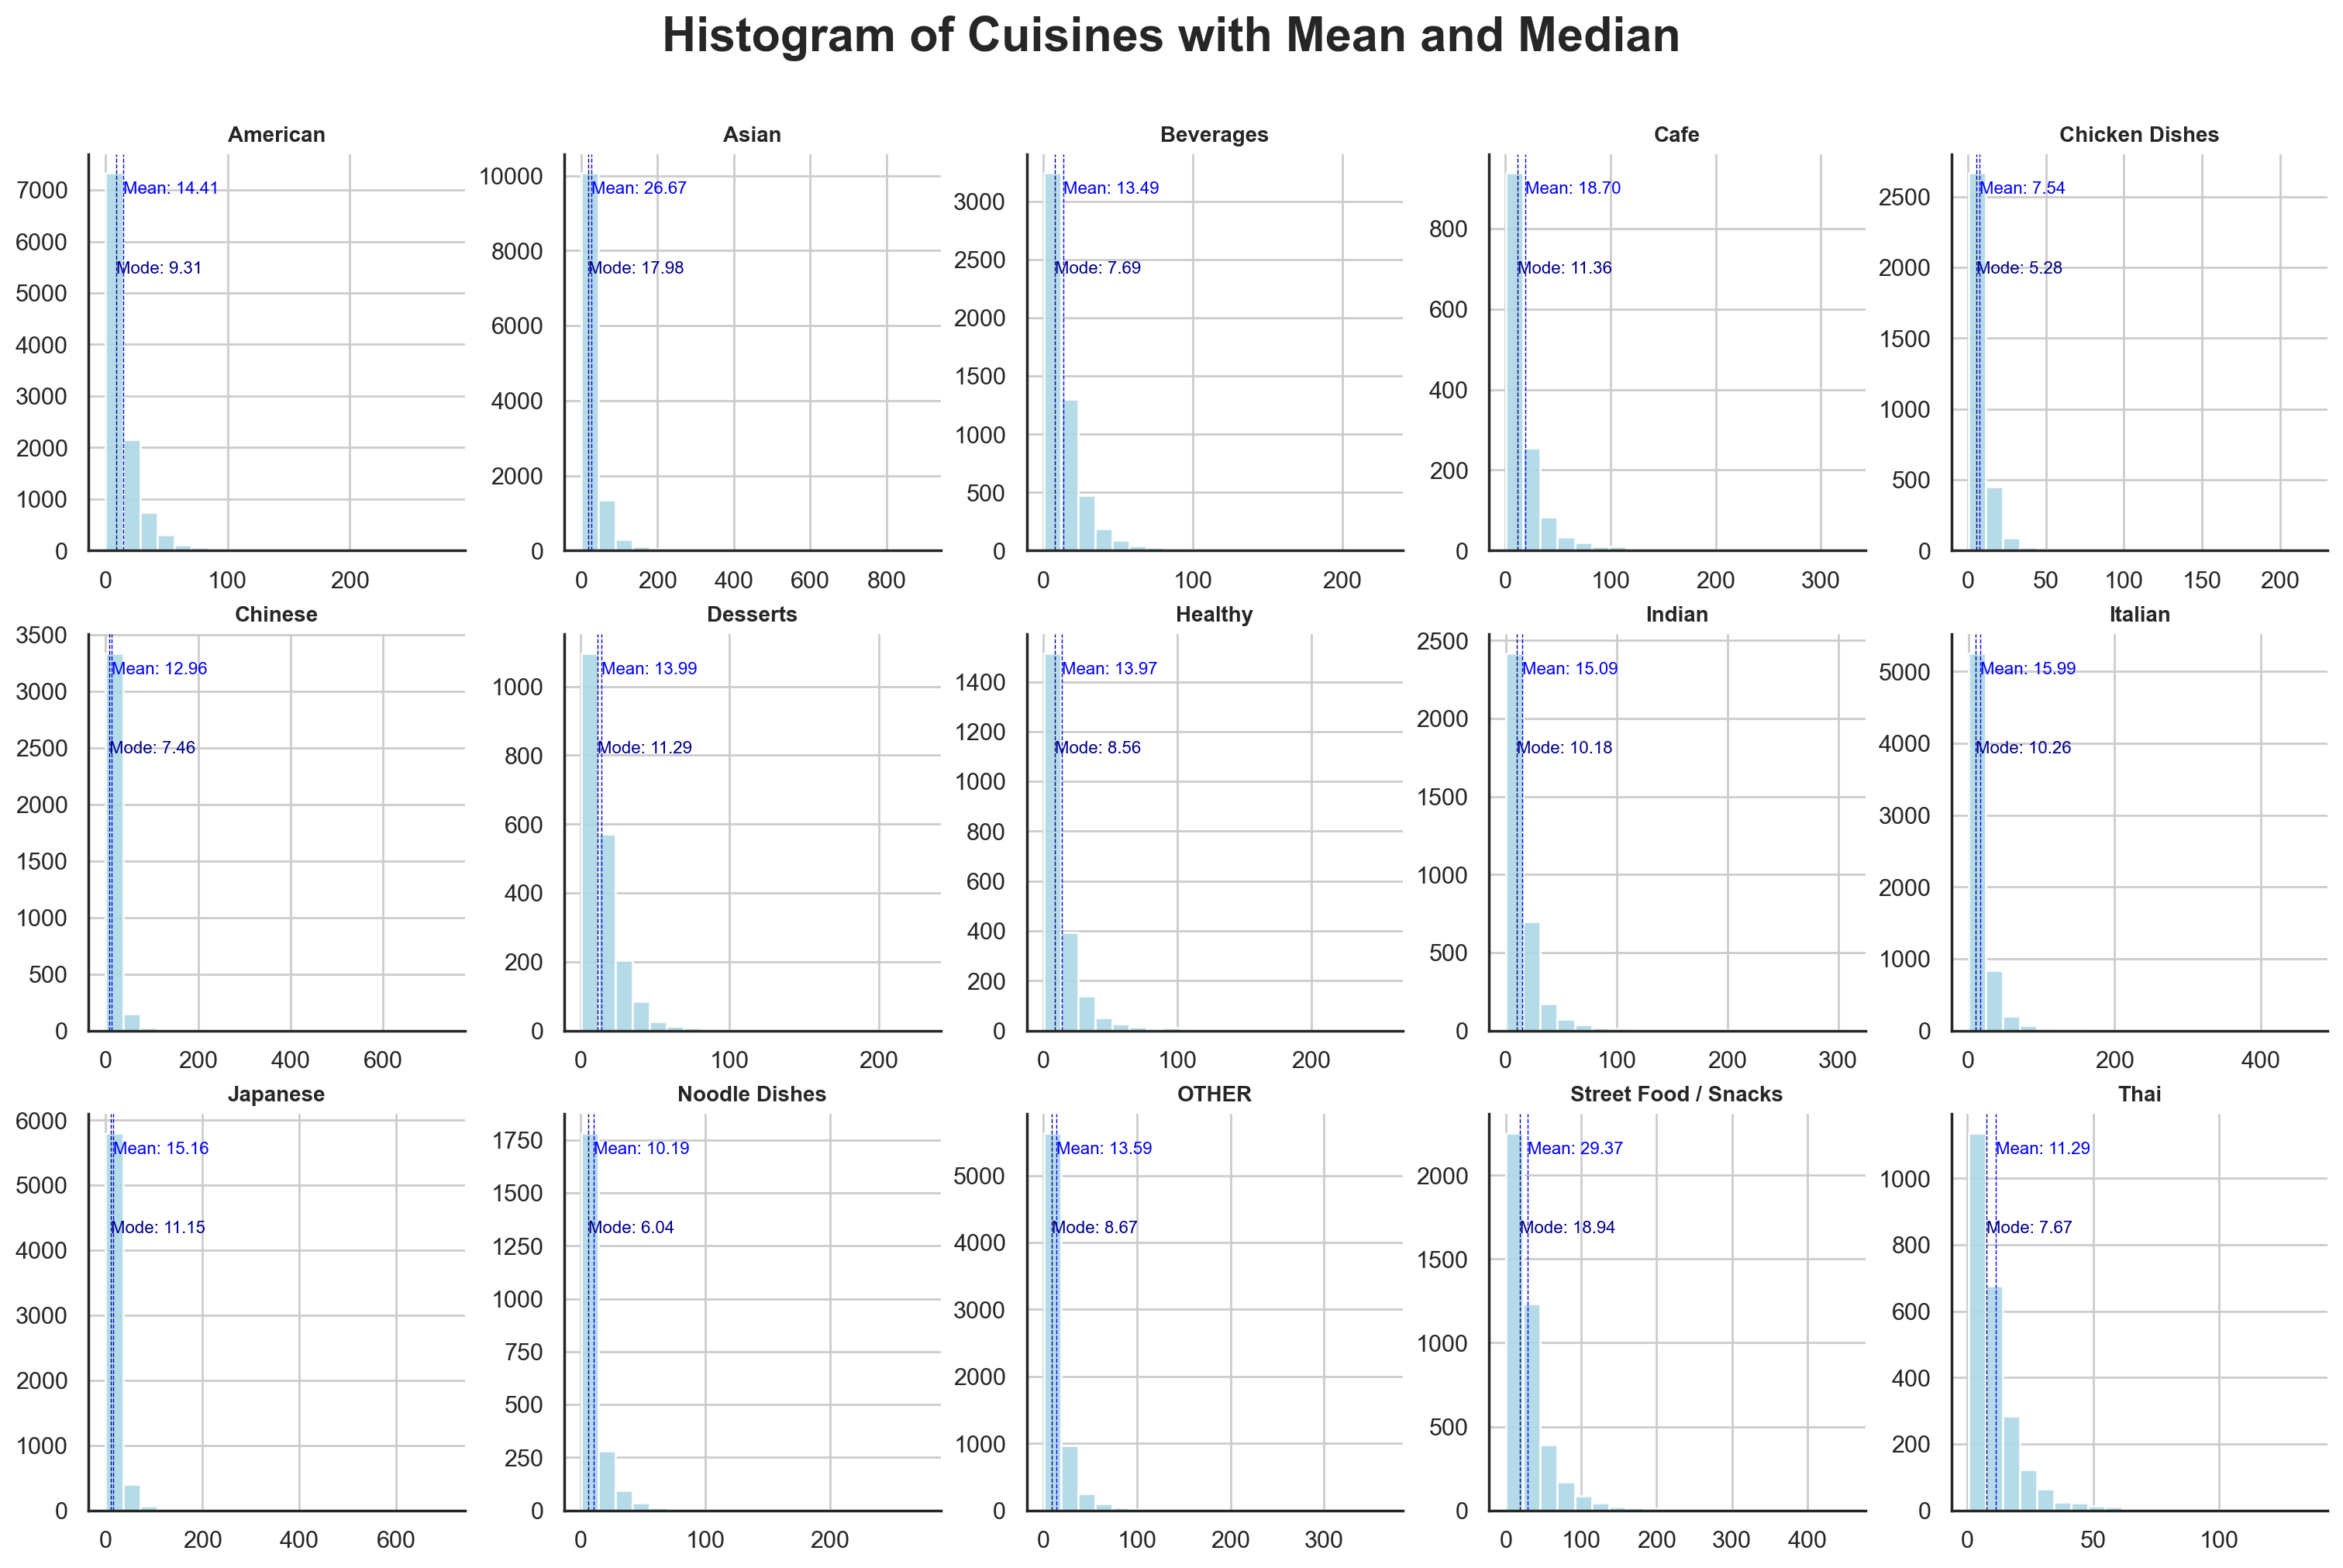

In [68]:
# Histogram with mean and mode lines for the columns 'CUI_American', 'CUI_Asian', 'CUI_Chinese', 'CUI_Italian', etc. with Monetary Units > 0
fig, axes = plt.subplots(nrows=3 , ncols=5, figsize=(15, 10), constrained_layout=True)

for i, col in enumerate(cuisines):
    ax = axes[int(i / 5), i % 5] if 3 > 1 else axes[i]
    ABCDEats[col][ABCDEats[col] > 0].hist(bins=20, ax=ax, color='lightblue', alpha=0.9)

    # Calculate mean and median
    mean_val = ABCDEats[col][ABCDEats[col] > 0].mean()
    median_val = ABCDEats[col][ABCDEats[col] > 0].median()
    
    # Plot mean line
    ax.axvline(mean_val, color='blue', linestyle='dashed', linewidth=.5)
    ax.text(mean_val, ax.get_ylim()[1] * 0.9, f'Mean: {mean_val:.2f}', color='blue', fontsize=8)
    
    # Plot median line
    ax.axvline(median_val, color='darkblue', linestyle='dashed', linewidth=.5)
    ax.text(median_val, ax.get_ylim()[1] * 0.7, f'Mode: {median_val:.2f}', color='darkblue', fontsize=8)
    
    ax.set_title(col.replace('CUI_', ''), fontweight='bold', fontsize=10)

fig.suptitle('Histogram of Cuisines with Mean and Median\n', fontweight='bold', fontsize=22)
sns.despine(top=True, right=True)
plt.show()

> Maybe we can create a new column with the total amount spent by the customer in all types of cuisine and other with the most spent cuisine by the customer (possibly the most frequent cuisine that the customer orders).

In [69]:
# Create a new column with the total amount spent by the customer in all types of cuisine
ABCDEats['CUI_Total_Amount_Spent'] = ABCDEats[cuisines].sum(axis=1)        # Average price per order
pd.DataFrame(ABCDEats['CUI_Total_Amount_Spent'].describe())

CUI_Total_Amount_Spent
count                31875.00
mean                    38.30
std                     46.41
min                      0.00
25%                     12.88
50%                     24.14
75%                     44.97
max                   1418.33

In [70]:
# Create a new column with the most spent cuisine by the customer
ABCDEats['CUI_Most_Spent_Cuisine'] = ABCDEats[cuisines].idxmax(axis=1).str.replace('CUI_', '')

# Replace the value of the column 'CUI_Most_Spent_Cuisine' by NaN when the total amount spent is equal to 0
ABCDEats['CUI_Most_Spent_Cuisine'] = np.where(ABCDEats['CUI_Total_Amount_Spent'] == 0, np.nan, ABCDEats['CUI_Most_Spent_Cuisine'])

# Absolute and Relative Frequency Table of the column 'CUI_Most_Spent_Cuisine'
CUI_Most_Spent_Cuisine = pd.DataFrame({
    'n': ABCDEats['CUI_Most_Spent_Cuisine'].value_counts(),
    '%': round(ABCDEats['CUI_Most_Spent_Cuisine'].value_counts() / ABCDEats.shape[0] * 100, 2)
}).sort_values(by='n', ascending=False)
CUI_Most_Spent_Cuisine.index.name = 'CUI_Most_Spent_Cuisine'
CUI_Most_Spent_Cuisine

n     %
CUI_Most_Spent_Cuisine            
Asian                   7021 22.03
American                4170 13.08
OTHER                   3134  9.83
Italian                 3059  9.60
Japanese                2384  7.48
Street Food / Snacks    2289  7.18
Beverages               2058  6.46
Indian                  1689  5.30
Chinese                 1330  4.17
Chicken Dishes          1132  3.55
Noodle Dishes            886  2.78
Thai                     754  2.37
Healthy                  723  2.27
Desserts                 621  1.95
Cafe                     487  1.53

In [71]:
# How many different types of food were purchased
pd.DataFrame({
    'n': ABCDEats[cuisines].gt(0).sum(axis=1).value_counts(),
    '%': round(ABCDEats[cuisines].gt(0).sum(axis=1) / ABCDEats.shape[1] * 100, 2)
}).sort_values(by='n', ascending=False)

n    %
1     11587.00 3.39
2      9804.00 1.69
3      5177.00 3.39
4      2564.00 3.39
5      1266.00 1.69
...        ...  ...
31883      NaN 1.69
31884      NaN 1.69
31885      NaN 1.69
31886      NaN 1.69
31887      NaN 1.69

[31875 rows x 2 columns]

In [72]:
# There are customers who have not purchased any type of food -> Analyze these customers
ABCDEats[ABCDEats[cuisines].gt(0).sum(axis=1) == 0]

customer_id customer_region  customer_age  vendor_count  product_count  \
1449   4903041977            8670         22.00             0              0   
1476   c94b288475            8670         26.00             0              0   
1488   f687717dc1            8670         21.00             0              0   
2486   c6cf0b76fb            8670         38.00             0              0   
3391   1b7c34738e            8670         24.00             0              0   
...           ...             ...           ...           ...            ...   
31377  177ede2420            8670         30.00             0              0   
31553  0039059c9c            8670         22.00             0              0   
31667  0e60632fe2            8670         23.00             0              0   
31680  28ed1f1e3f            8670         20.00             0              0   
31695  4c06e104de            8670         25.00             0              0   

       is_chain  first_order  last_order last_promo payment_method  \
1449          1         1.00           1   DELIVERY           DIGI   
1476          0         1.00           1   DELIVERY           CASH   
1488          1         1.00           1   DELIVERY           DIGI   
2486          0         2.00           2   DELIVERY           CASH   
3391          0         3.00           3          -           CASH   
...         ...          ...         ...        ...            ...   
31377         1        86.00          86          -           DIGI   
31553         1        88.00          88   DISCOUNT           CARD   
31667         0        89.00          89   DISCOUNT           CARD   
31680         0        89.00          89   DELIVERY           DIGI   
31695         1        89.00          89          -           CASH   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
1449           0.00       0.00           0.00      0.00                0.00   
1476           0.00       0.00           0.00      0.00                0.00   
1488           0.00       0.00           0.00      0.00                0.00   
2486           0.00       0.00           0.00      0.00                0.00   
3391           0.00       0.00           0.00      0.00                0.00   
...             ...        ...            ...       ...                 ...   
31377          0.00       0.00           0.00      0.00                0.00   
31553          0.00       0.00           0.00      0.00                0.00   
31667          0.00       0.00           0.00      0.00                0.00   
31680          0.00       0.00           0.00      0.00                0.00   
31695          0.00       0.00           0.00      0.00                0.00   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
1449          0.00          0.00         0.00        0.00         0.00   
1476          0.00          0.00         0.00        0.00         0.00   
1488          0.00          0.00         0.00        0.00         0.00   
2486          0.00          0.00         0.00        0.00         0.00   
3391          0.00          0.00         0.00        0.00         0.00   
...            ...           ...          ...         ...          ...   
31377         0.00          0.00         0.00        0.00         0.00   
31553         0.00          0.00         0.00        0.00         0.00   
31667         0.00          0.00         0.00        0.00         0.00   
31680         0.00          0.00         0.00        0.00         0.00   
31695         0.00          0.00         0.00        0.00         0.00   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
1449           0.00               0.00       0.00                      0.00   
1476           0.00               0.00       0.00                      0.00   
1488           0.00               0.00       0.00                      0.00   
2486           0.00               0.00       0.00 

In [73]:
# Cases where first_order and last_order are equal and where we have values of CUI_Total_Amount_Spent = 0
ABCDEats[(ABCDEats['first_order'] == ABCDEats['last_order']) & (ABCDEats['CUI_Total_Amount_Spent'] > 0)]

customer_id customer_region  customer_age  vendor_count  product_count  \
1436   0d18e5416b            8670         42.00             1              1   
1437   10e5701adb            8670         29.00             1              1   
1438   1415578e02            8370         23.00             1              1   
1439   1d02e614b4            2360         19.00             1              1   
1440   237e4e7aaf            2360         22.00             1              1   
...           ...             ...           ...           ...            ...   
31777  eb13c834e7            2360         74.00             1              1   
31778  f7be3a1a84            2440         26.00             1              1   
31779  fc924e1758            4660         20.00             1              2   
31780  fcdbf7468b            4660         22.00             1              3   
31781  d7c7face7e            2440         26.00             1              1   

       is_chain  first_order  last_order last_promo payment_method  \
1436          1         1.00           1          -           DIGI   
1437          0         1.00           1   DELIVERY           CARD   
1438          0         1.00           1   DELIVERY           CARD   
1439          1         1.00           1   DISCOUNT           CASH   
1440          1         1.00           1   DISCOUNT           CASH   
...         ...          ...         ...        ...            ...   
31777         1        89.00          89   DELIVERY           CARD   
31778         1        89.00          89          -           CASH   
31779         0        89.00          89   DELIVERY           CASH   
31780         1        89.00          89   DISCOUNT           CARD   
31781         1        90.00          90   DELIVERY           CASH   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
1436           0.00      18.42           0.00      0.00                0.00   
1437           0.00       0.00           0.00      0.00                0.00   
1438           0.00       0.00           0.00      0.00                0.00   
1439           0.00       0.00           1.55      0.00                0.00   
1440           0.00       5.23           0.00      0.00                0.00   
...             ...        ...            ...       ...                 ...   
31777          0.00       0.00           0.00      0.00                1.75   
31778          0.00       0.00           0.00      0.00                0.00   
31779          0.00       0.00           0.00      0.00                0.00   
31780          0.00       0.00           0.00      0.00                0.00   
31781          2.61       0.00           0.00      0.00                0.00   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
1436          0.00          0.00         0.00        0.00         0.00   
1437          0.00          0.00         0.00        0.00         0.00   
1438          0.00          0.00         0.00        0.00         0.00   
1439          0.00          0.00         0.00        0.00         0.00   
1440          0.00          0.00         0.00        0.00         0.00   
...            ...           ...          ...         ...          ...   
31777         0.00          0.00         0.00        0.00         0.00   
31778         0.00          0.00         0.00        0.00         1.86   
31779         0.00          0.00         0.00        0.00         0.00   
31780         0.00          0.00         0.00        0.00         0.00   
31781         0.00          0.00         0.00        0.00         0.00   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
1436           0.00               0.00       0.00                      0.00   
1437          19.34               0.00       0.00                      0.00   
1438           5.91               0.00       0.00                      0.00   
1439           0.00               0.00       0.00 

In [74]:
# A possible usefull information that we can extract is the average amount spent by the customer in total orders
ABCDEats['CUI_Avg_Amount_Spent'] = ABCDEats['CUI_Total_Amount_Spent'] / ABCDEats['order_count']

# Descriptive statistics of the column 'CUI_Avg_Amount_Spent'
pd.DataFrame(ABCDEats['CUI_Avg_Amount_Spent'].describe())

CUI_Avg_Amount_Spent
count              31737.00
mean                  10.31
std                    7.86
min                    0.37
25%                    5.07
50%                    8.22
75%                   12.93
max                  104.32

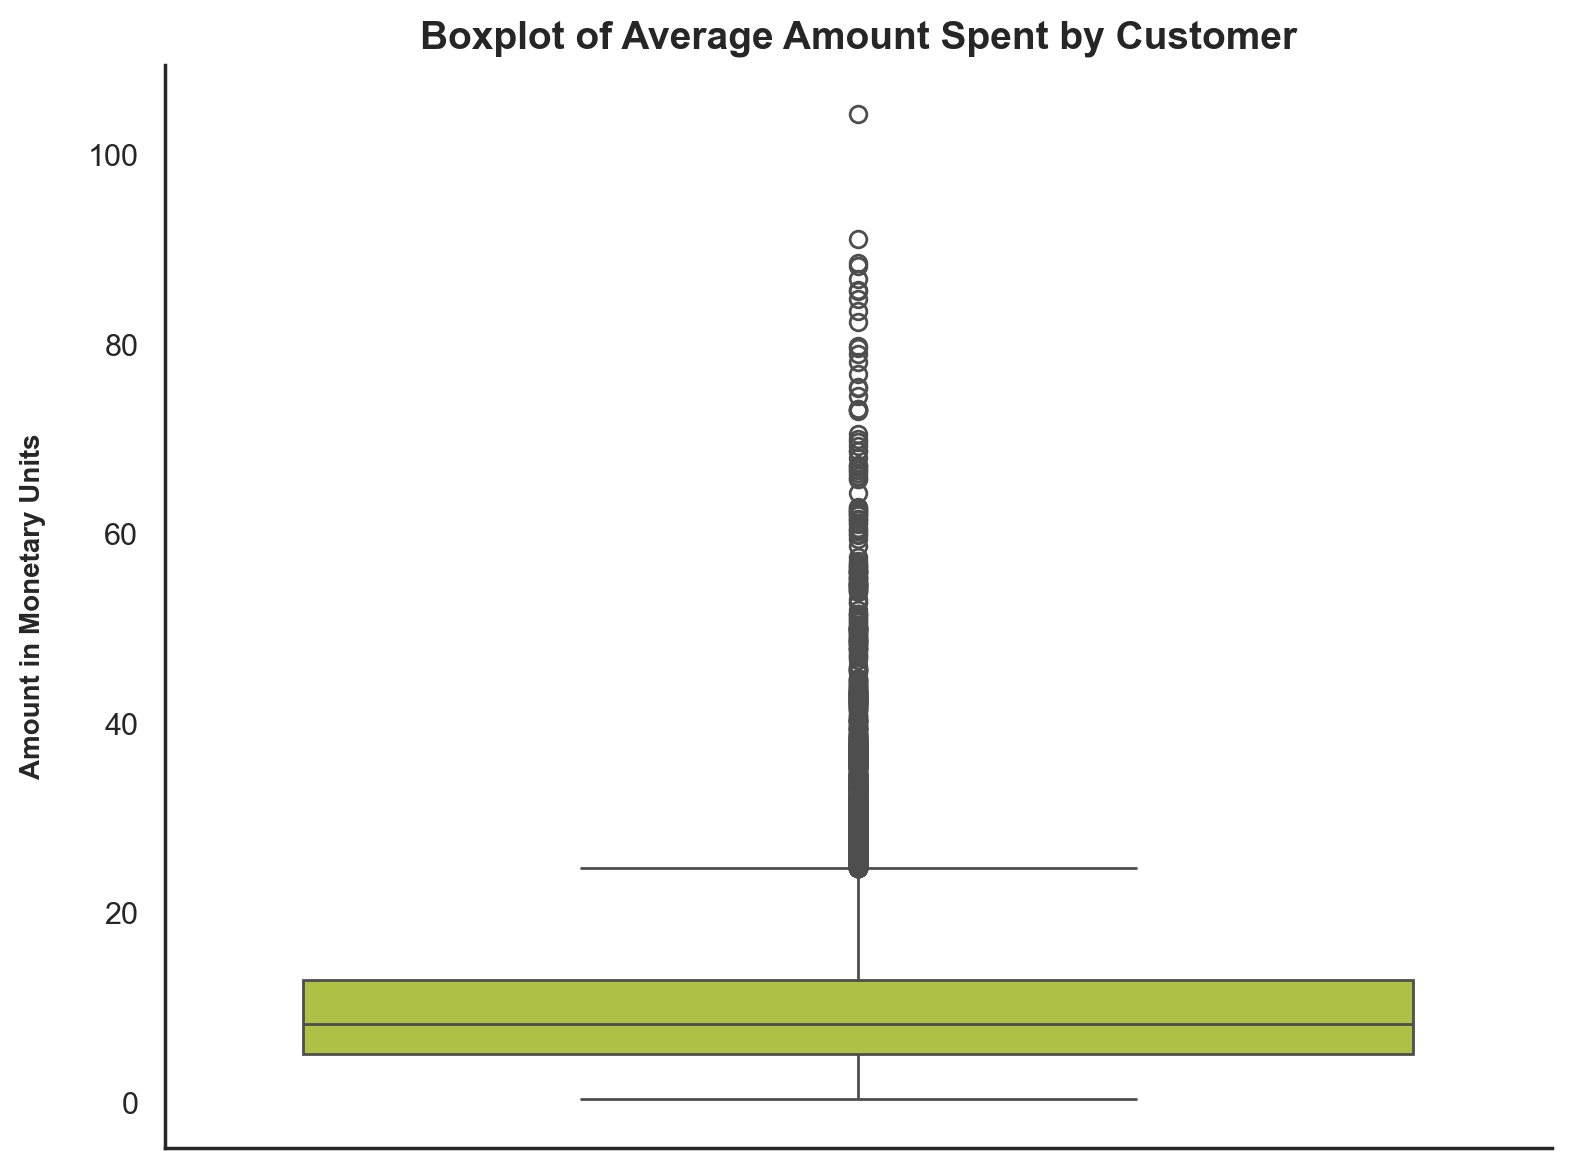

In [75]:
# Boxplot of the column 'CUI_Avg_Amount_Spent'
plt.figure(figsize=(8, 6))
sns.boxplot(data=ABCDEats['CUI_Avg_Amount_Spent'], color='#bEd62f')
plt.title('Boxplot of Average Amount Spent by Customer', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Amount in Monetary Units\n', fontsize=10, fontweight='bold')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

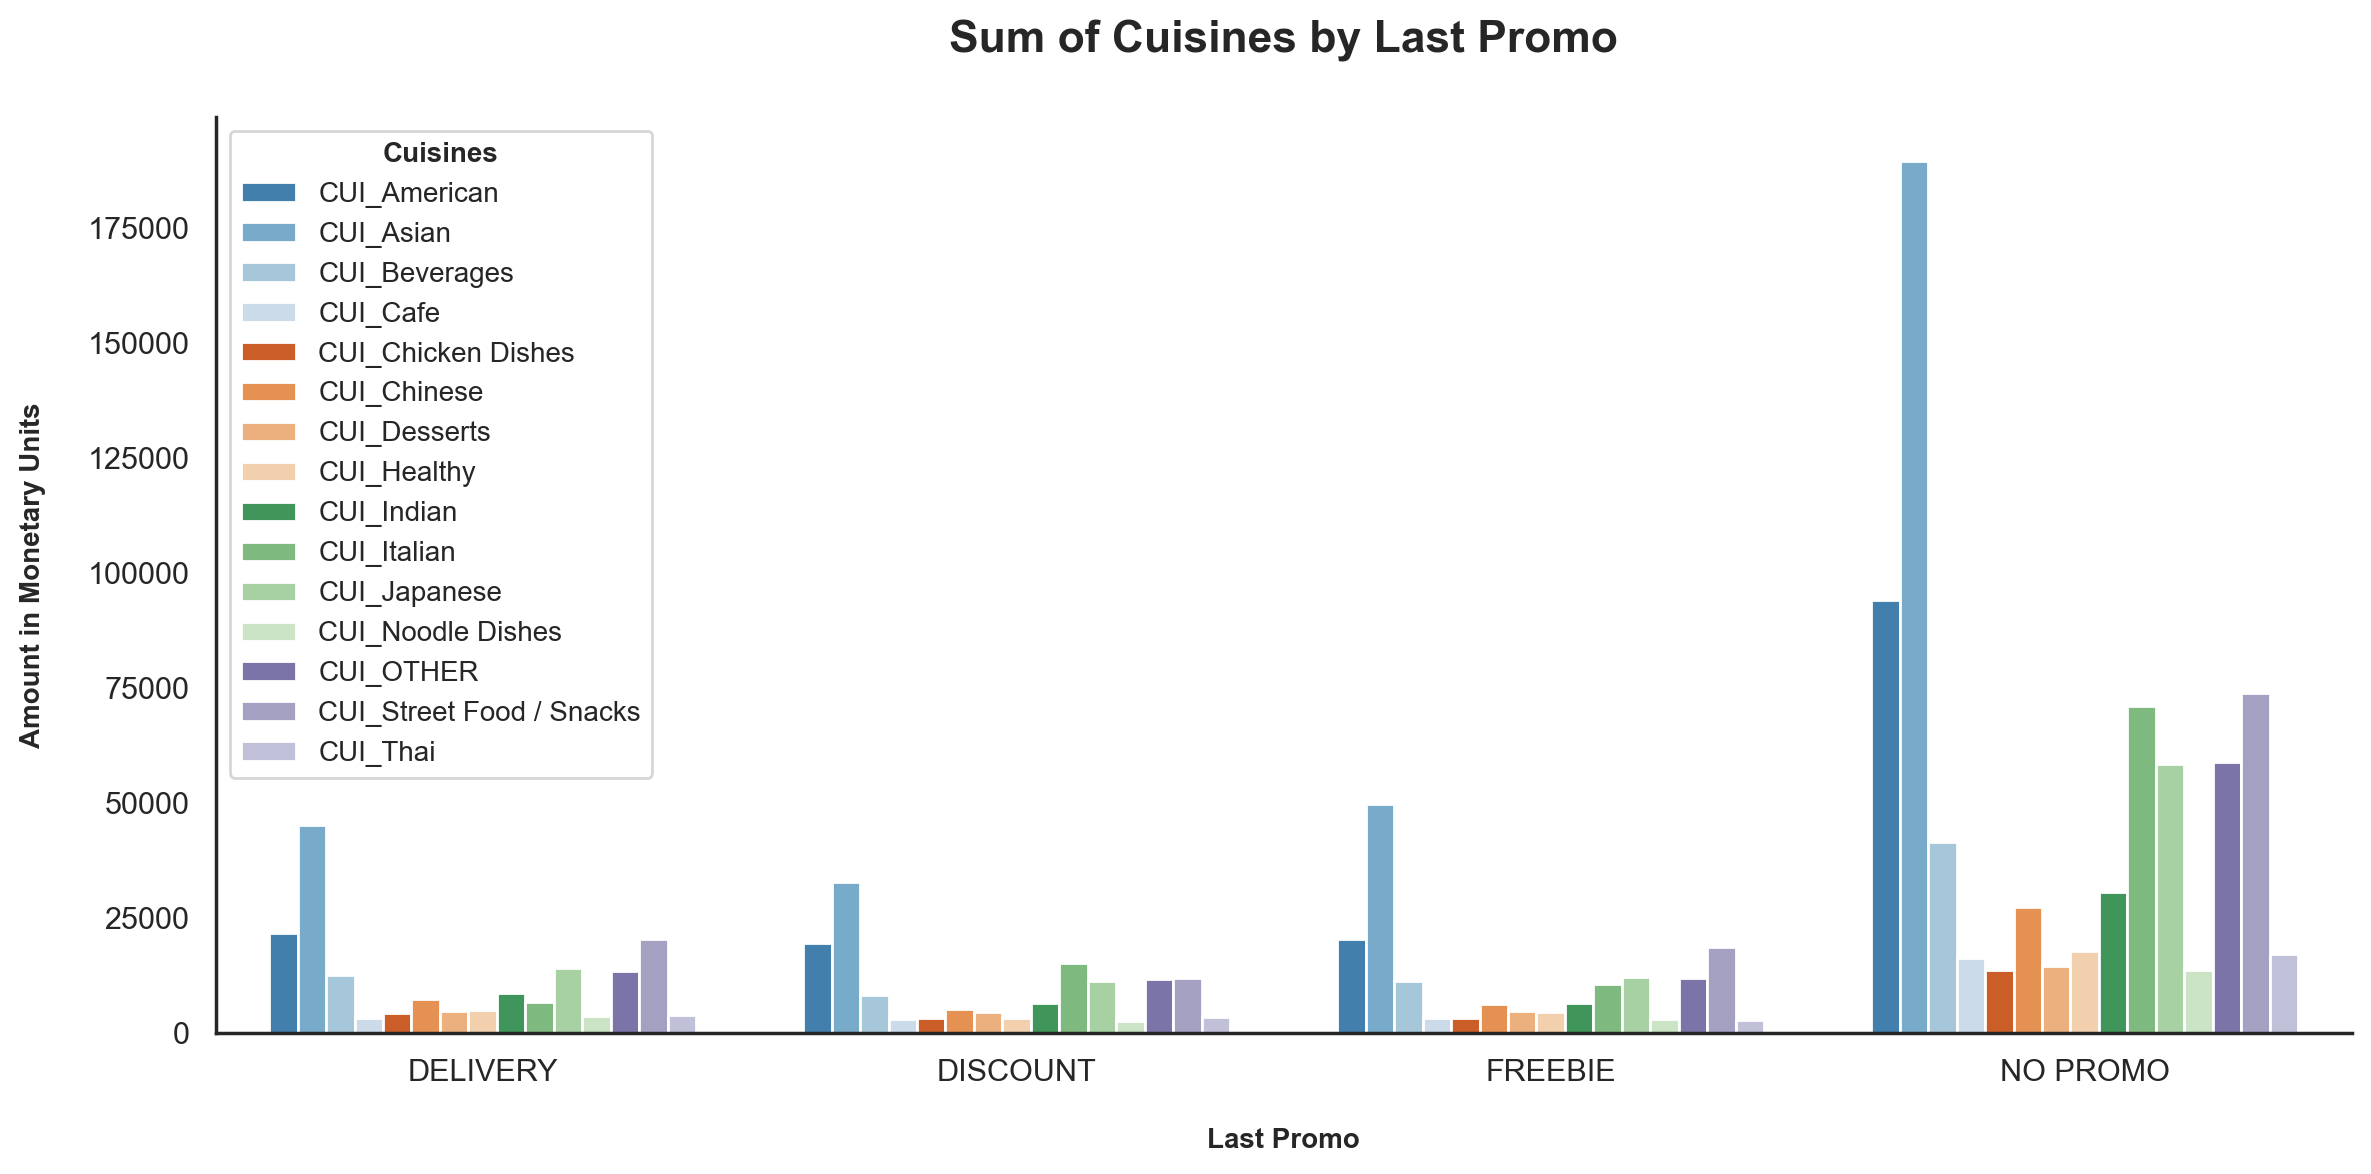

In [251]:
# Bar Chart - Sum de 'CUI_' by 'last_promo'
# Sum of 'CUI_' columns by 'last_promo'
sum_cuisines_last_promo = ABCDEats.groupby('last_promo')[cuisines].sum()

# Melt the DataFrame to long format for easier plotting
sum_cuisines_last_promo_melted = sum_cuisines_last_promo.reset_index().melt(id_vars='last_promo', var_name='Cuisine', value_name='Amount')

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=sum_cuisines_last_promo_melted, 
            x='last_promo', 
            y='Amount', 
            hue='Cuisine', 
            palette=sns.color_palette("tab20c", 15))

plt.title('Sum of Cuisines by Last Promo\n', fontweight='bold', fontsize=16)
plt.xlabel('\nLast Promo', fontweight='bold', fontsize=10)
plt.ylabel('Amount in Monetary Units\n', fontweight='bold', fontsize=10)
plt.legend(title='Cuisines', fontsize=10, title_fontproperties={'size':10,'weight':'bold'})
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

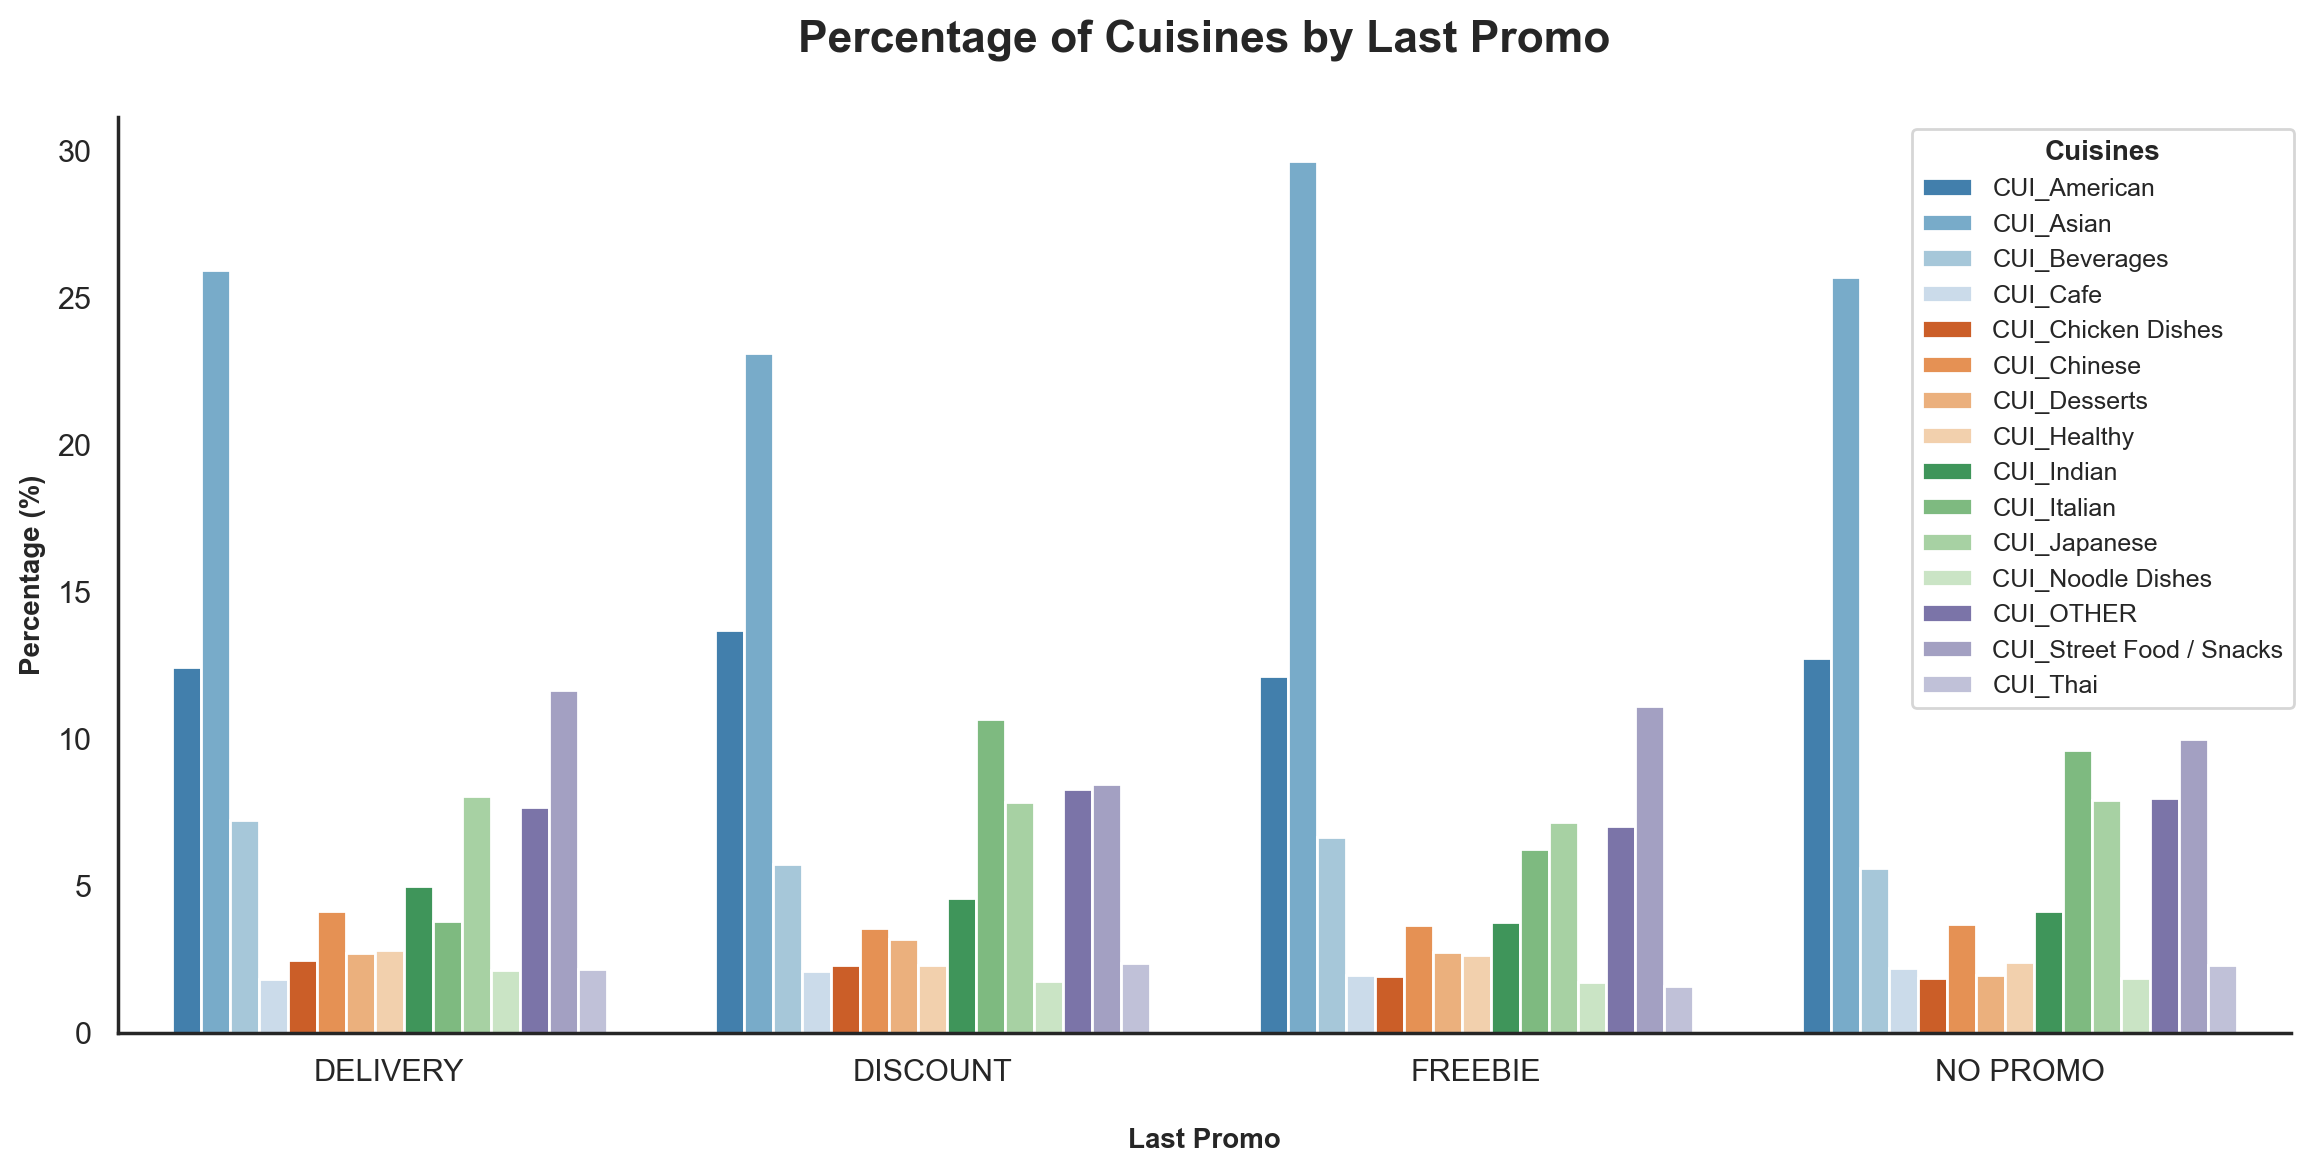

In [259]:
# Bar Chart - % de 'CUI_' by 'last_promo'
# Calculate the percentage of each cuisine by 'last_promo'
sum_cuisines_last_promo_p = sum_cuisines_last_promo.div(sum_cuisines_last_promo.sum(axis=1), axis=0) * 100

# Melt the DataFrame to long format for easier plotting
sum_cuisines_last_promo_p_melted = sum_cuisines_last_promo_p.reset_index().melt(id_vars='last_promo', var_name='Cuisine', value_name='Amount')

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=sum_cuisines_last_promo_p_melted, 
            x='last_promo', 
            y='Amount', 
            hue='Cuisine', 
            palette=sns.color_palette("tab20c", 15))

plt.title('Percentage of Cuisines by Last Promo\n', fontweight='bold', fontsize=16)
plt.xlabel('\nLast Promo', fontweight='bold', fontsize=10)
plt.ylabel('Percentage (%)', fontweight='bold', fontsize=10)
plt.legend(title='Cuisines', fontsize=9, title_fontproperties={'size':10,'weight':'bold'},
           bbox_to_anchor=(.82, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

---

#### `DOW_0` to `DOW_6`

In [99]:
# List of weekdays (0 = Sunday, 6 = Saturday)
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekdays_dict = dict(enumerate(weekdays))
weekdays_dict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

In [100]:
# ------------------------ Analyze the most common order days ------------------------
# Create a DataFrame with the sum of orders by day
orders_by_day = ABCDEats.loc[:, 'DOW_0':'DOW_6'].sum().reset_index()
orders_by_day.columns = ['Day', 'Orders']
orders_by_day['Day'] = orders_by_day['Day'].str.replace('DOW_', '')
orders_by_day = orders_by_day.astype(int)
orders_by_day['%'] = round(orders_by_day['Orders'] / orders_by_day['Orders'].sum() * 100, 2)

# Replace the number of the day by the name of the day
orders_by_day['Day'] = orders_by_day['Day'].replace(weekdays_dict)

orders_by_day.set_index('Day')

Orders     %
Day                    
Sunday      17720 12.72
Monday      18091 12.99
Tuesday     18836 13.53
Wednesday   19743 14.18
Thursday    21607 15.52
Friday      20813 14.95
Saturday    22453 16.12

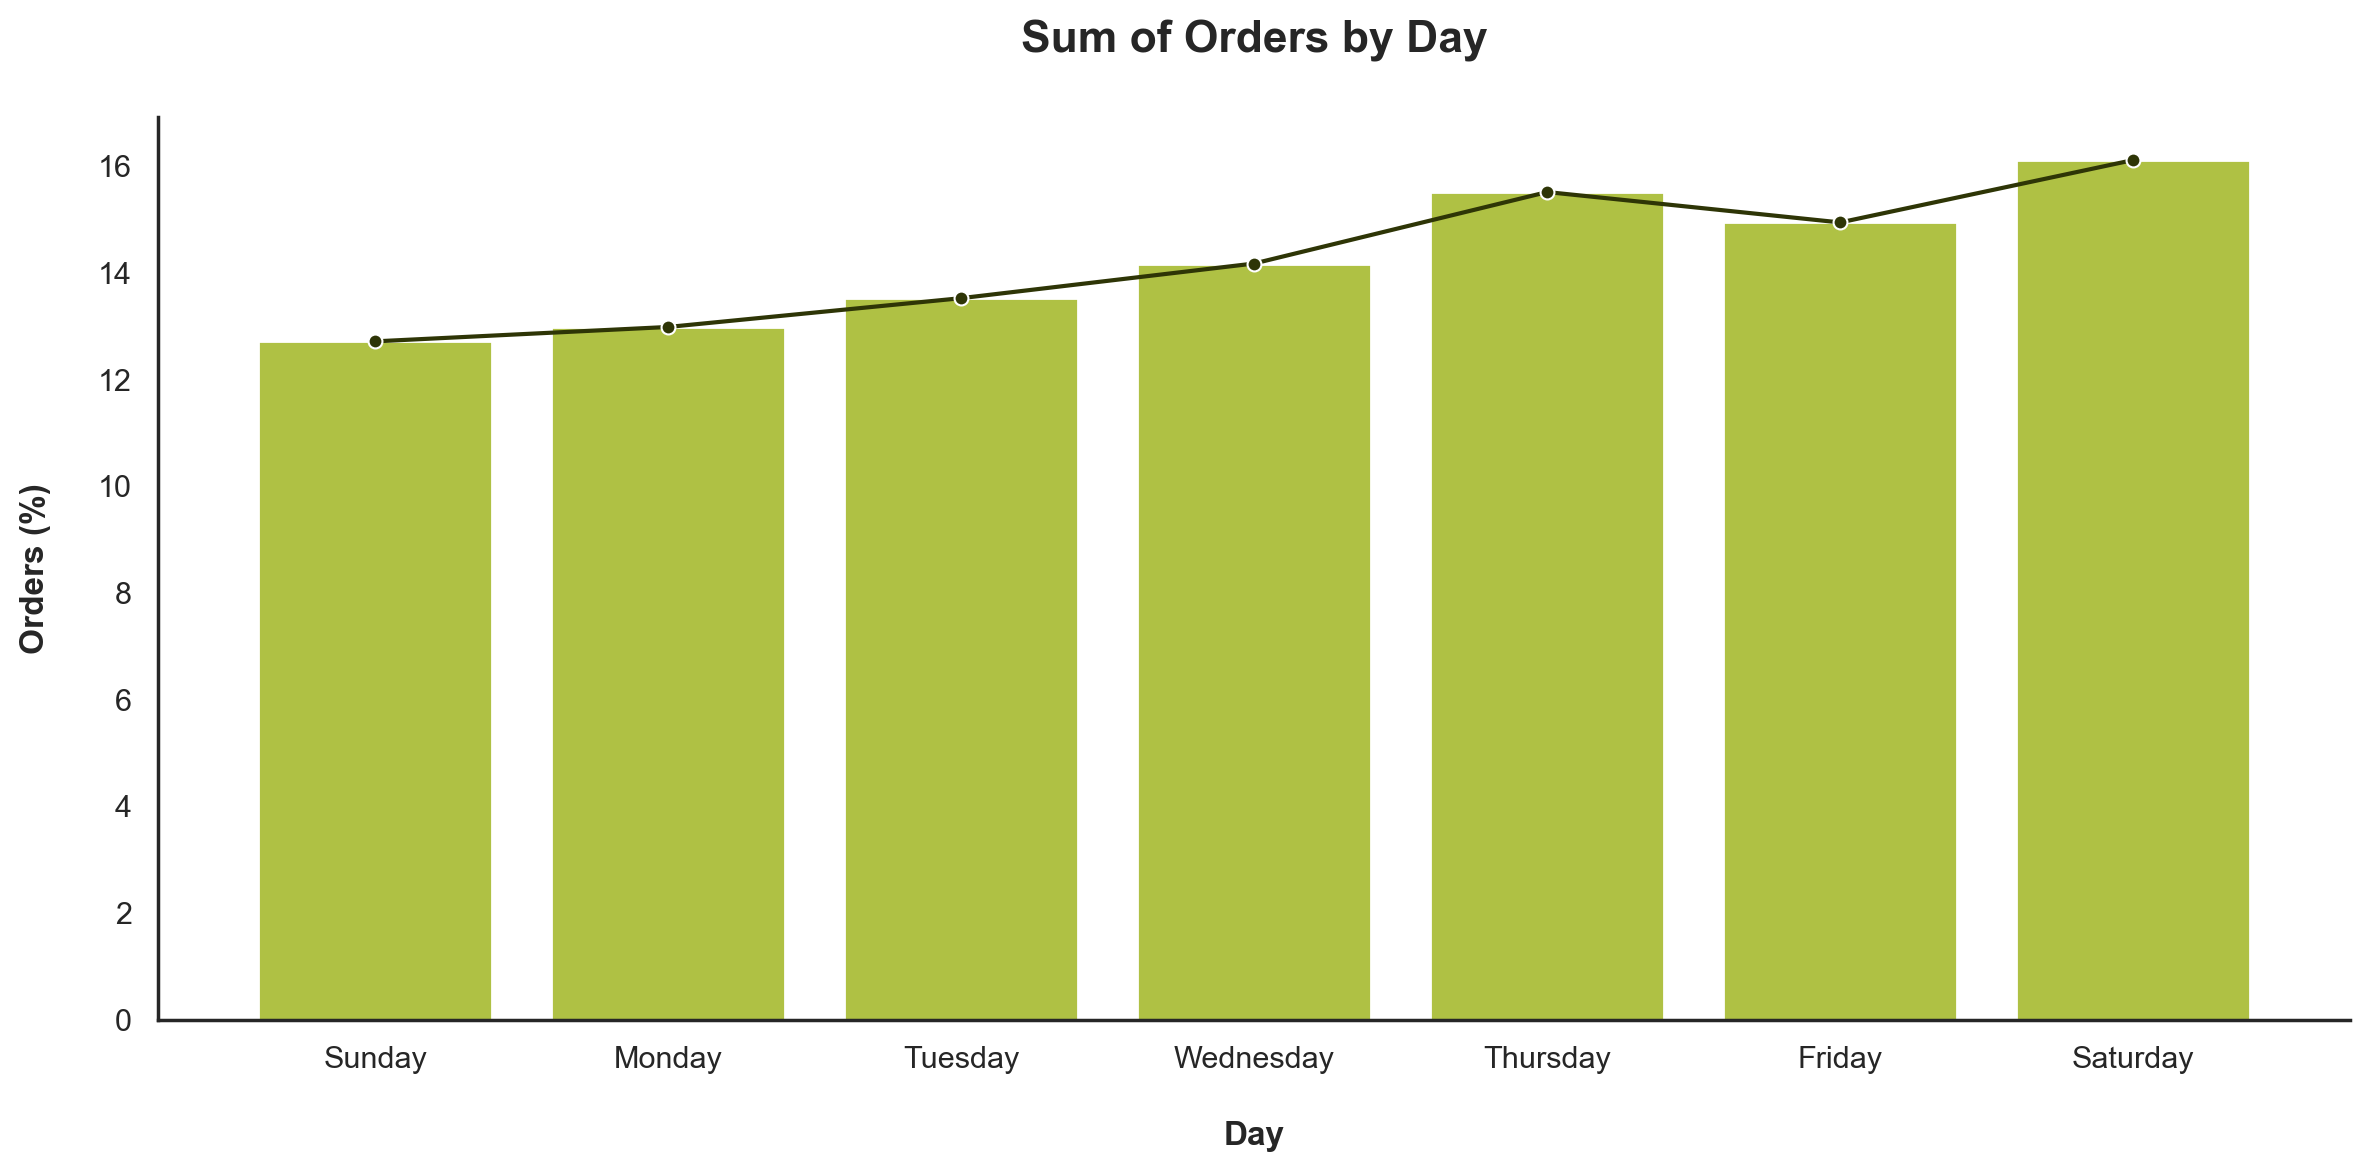

In [101]:
# Plot the sum of orders by day
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_day, x='Day', y='%', color='#bEd62f')
sns.lineplot(data=orders_by_day, x='Day', y='%', color='#2E3506', marker='o', markersize=5)
plt.title('Sum of Orders by Day\n', fontsize=16, fontweight='bold')
plt.xlabel('\nDay', fontsize=12, fontweight='bold')
plt.ylabel('Orders (%)\n', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

---

#### `HR_0` to `HR_23`

In [86]:
# ------------------------ Analyze the most common order times ------------------------
# Create a DataFrame with the sum of orders by hour
orders_by_hour = ABCDEats.loc[:, 'HR_0':'HR_23'].sum().reset_index()
orders_by_hour.columns = ['Hour', 'Orders']
orders_by_hour['Hour'] = orders_by_hour['Hour'].str.replace('HR_', '')
orders_by_hour = orders_by_hour.astype(int)
orders_by_hour['%'] = round(orders_by_hour['Orders'] / orders_by_hour['Orders'].sum() * 100, 2)
orders_by_hour.set_index('Hour')

Orders    %
Hour             
0          0 0.00
1       1716 1.25
2       2013 1.46
3       3771 2.74
4       3242 2.35
5       2611 1.90
6       2219 1.61
7       2444 1.77
8       4203 3.05
9       7457 5.41
10     10508 7.63
11     12057 8.76
12     10017 7.27
13      7536 5.47
14      6875 4.99
15      8833 6.41
16     11366 8.25
17     12465 9.05
18     10745 7.80
19      7831 5.69
20      4554 3.31
21      2269 1.65
22      1539 1.12
23      1440 1.05

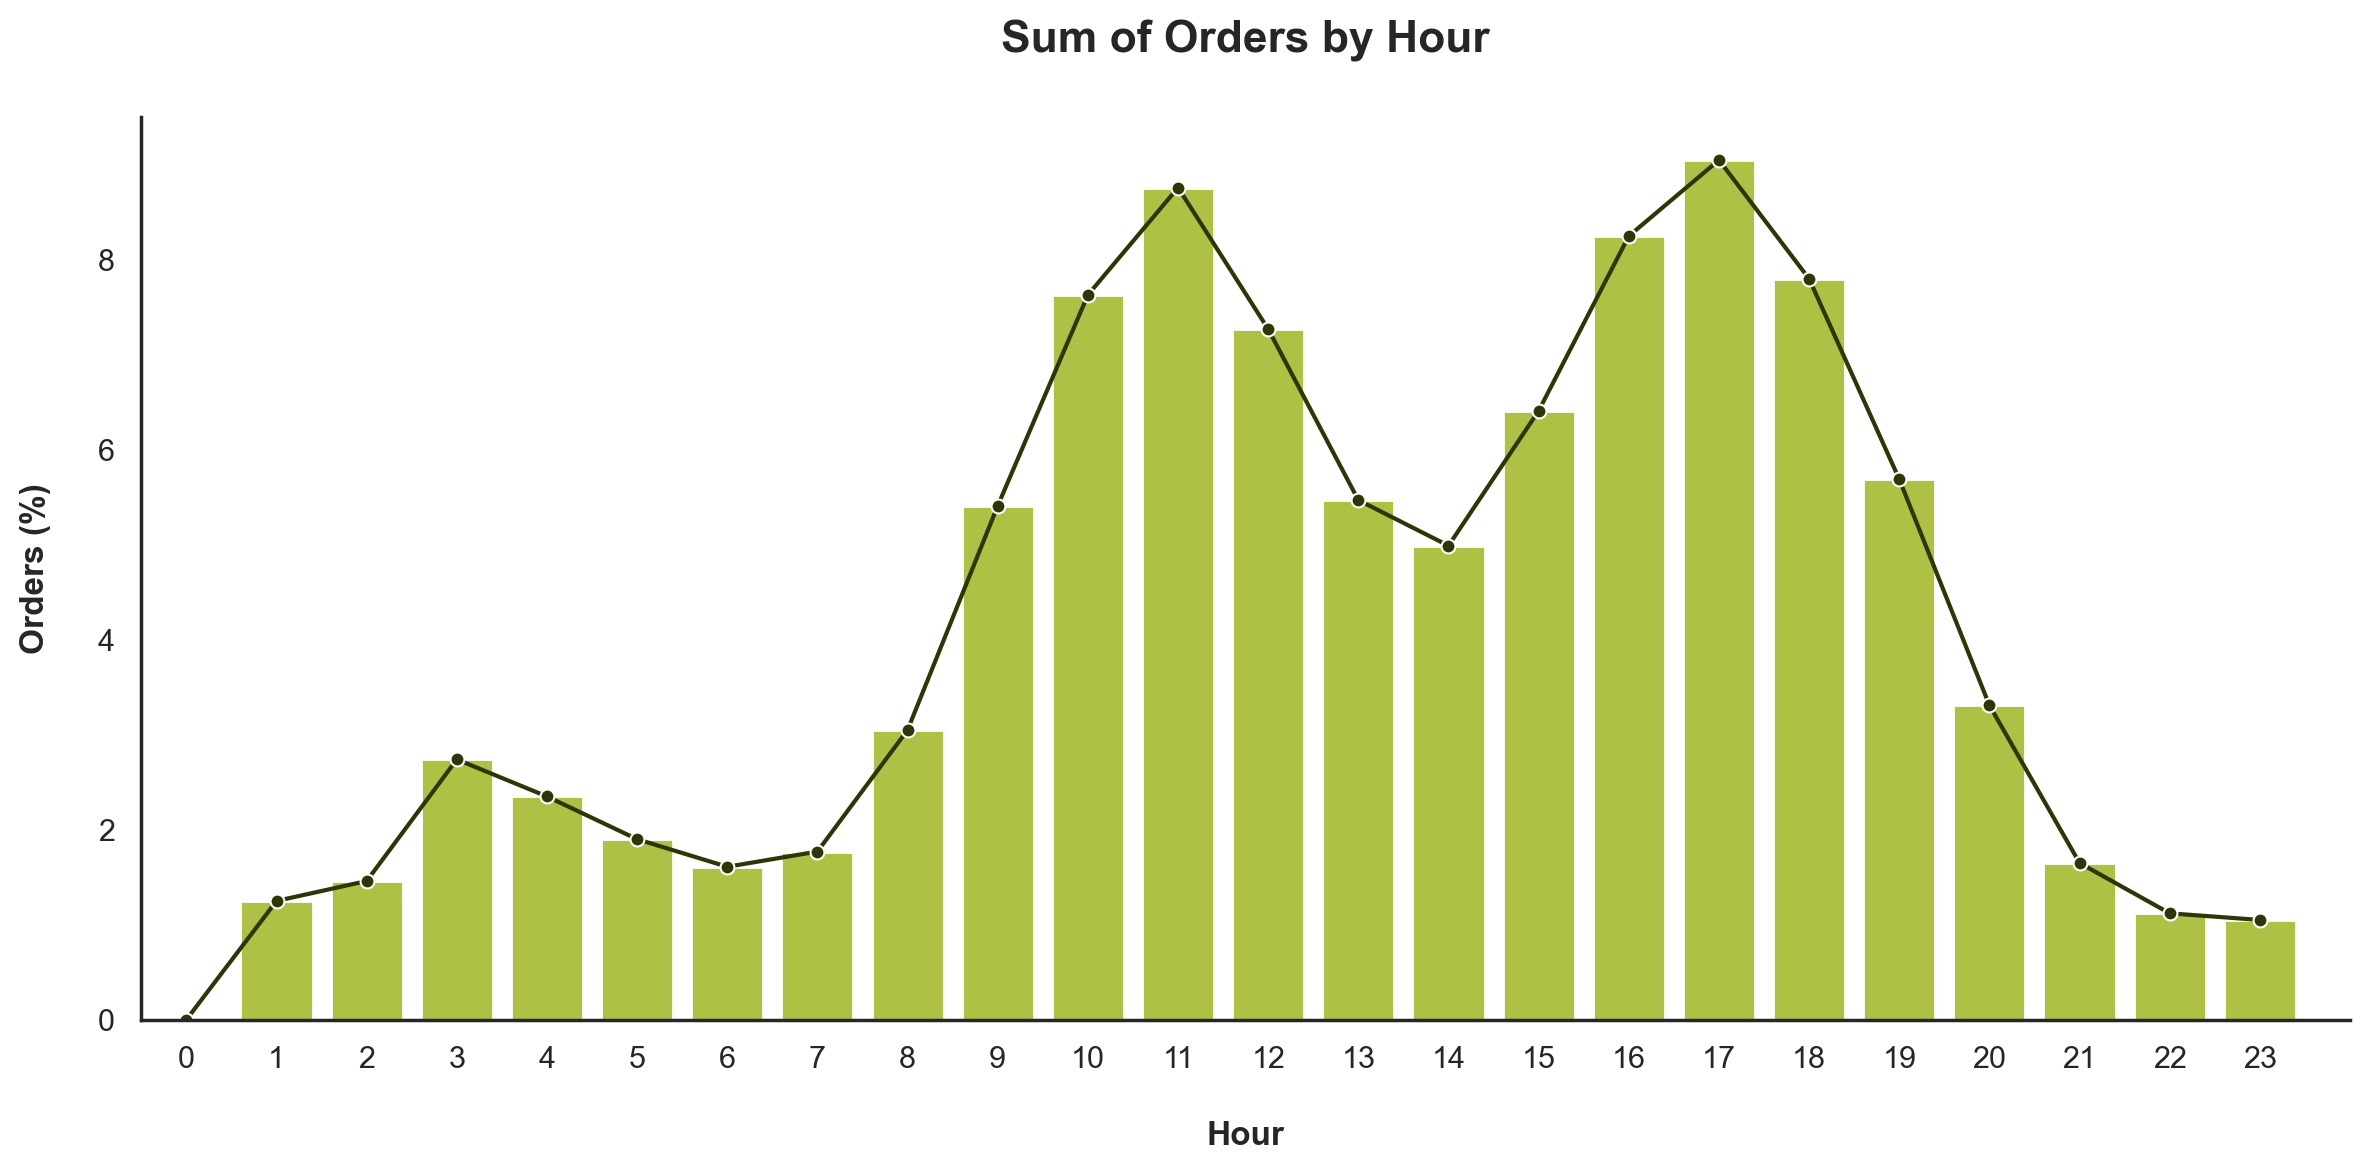

In [93]:
# Plot the sum of orders by hour
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_hour, x='Hour', y='%', color='#bEd62f')
sns.lineplot(data=orders_by_hour, x='Hour', y='%', color='#2E3506', marker='o', markersize=5)
plt.title('Sum of Orders by Hour\n', fontsize=16, fontweight='bold')
plt.xlabel('\nHour', fontsize=12, fontweight='bold')
plt.ylabel('Orders (%)\n', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.xlim(-.5, 24)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

# ########## E SE FIZER UMA MATRIZ DE CORRELAÇÃO ENTRE OS DIAS DA SEMANA E AS HORAS DO DIA??